In [1]:
# 참고한 캐글 사이트 : https://www.kaggle.com/emmaren/cold-calls-data-mining-and-model-selection/notebook
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from scipy.stats import mode
from scipy.stats import skew
from scipy import stats
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
# from sklearn.grid_search import GridSearchCV

In [2]:
# Read-in train and test datasets
train = pd.read_csv("carInsurance_train.csv")

In [3]:
# Data Exploration & Visualization

In [4]:
# Take a peak at the data

# EDA : Data Exploration & Visualization & Outlier

In [5]:
# 연속형 변수만
train.describe()

Id          Age      Default       Balance  HHInsurance  \
count  4000.000000  4000.000000  4000.000000   4000.000000   4000.00000   
mean   2000.500000    41.214750     0.014500   1532.937250      0.49275   
std    1154.844867    11.550194     0.119555   3511.452489      0.50001   
min       1.000000    18.000000     0.000000  -3058.000000      0.00000   
25%    1000.750000    32.000000     0.000000    111.000000      0.00000   
50%    2000.500000    39.000000     0.000000    551.500000      0.00000   
75%    3000.250000    49.000000     0.000000   1619.000000      1.00000   
max    4000.000000    95.000000     1.000000  98417.000000      1.00000   

           CarLoan  LastContactDay  NoOfContacts   DaysPassed  PrevAttempts  \
count  4000.000000     4000.000000   4000.000000  4000.000000   4000.000000   
mean      0.133000       15.721250      2.607250    48.706500      0.717500   
std       0.339617        8.425307      3.064204   106.685385      2.078647   
min       0.000000        1.000000      1.000000    -1.000000      0.000000   
25%       0.000000        8.000000      1.000000    -1.000000      0.000000   
50%       0.000000       16.000000      2.000000    -1.000000      0.000000   
75%       0.000000       22.000000      3.000000    -1.000000      0.000000   
max       1.000000       31.000000     43.000000   854.000000     58.000000   

       CarInsurance  
count   4000.000000  
mean       0.401000  
std        0.490162  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [6]:
# 총 열의 수
ls = list(train.columns)
len(ls)

19

In [7]:
train.describe(include=['O'])

Job  Marital  Education Communication LastContactMonth  \
count         3981     4000       3831          3098             4000   
unique          11        3          3             2               12   
top     management  married  secondary      cellular              may   
freq           893     2304       1988          2831             1049   

        Outcome CallStart   CallEnd  
count       958      4000      4000  
unique        3      3777      3764  
top     failure  17:11:04  10:22:30  
freq        437         3         3

In [8]:
train.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

## Corr Plot & Scatter Plot 

<AxesSubplot:title={'center':'Correlation Plot'}>

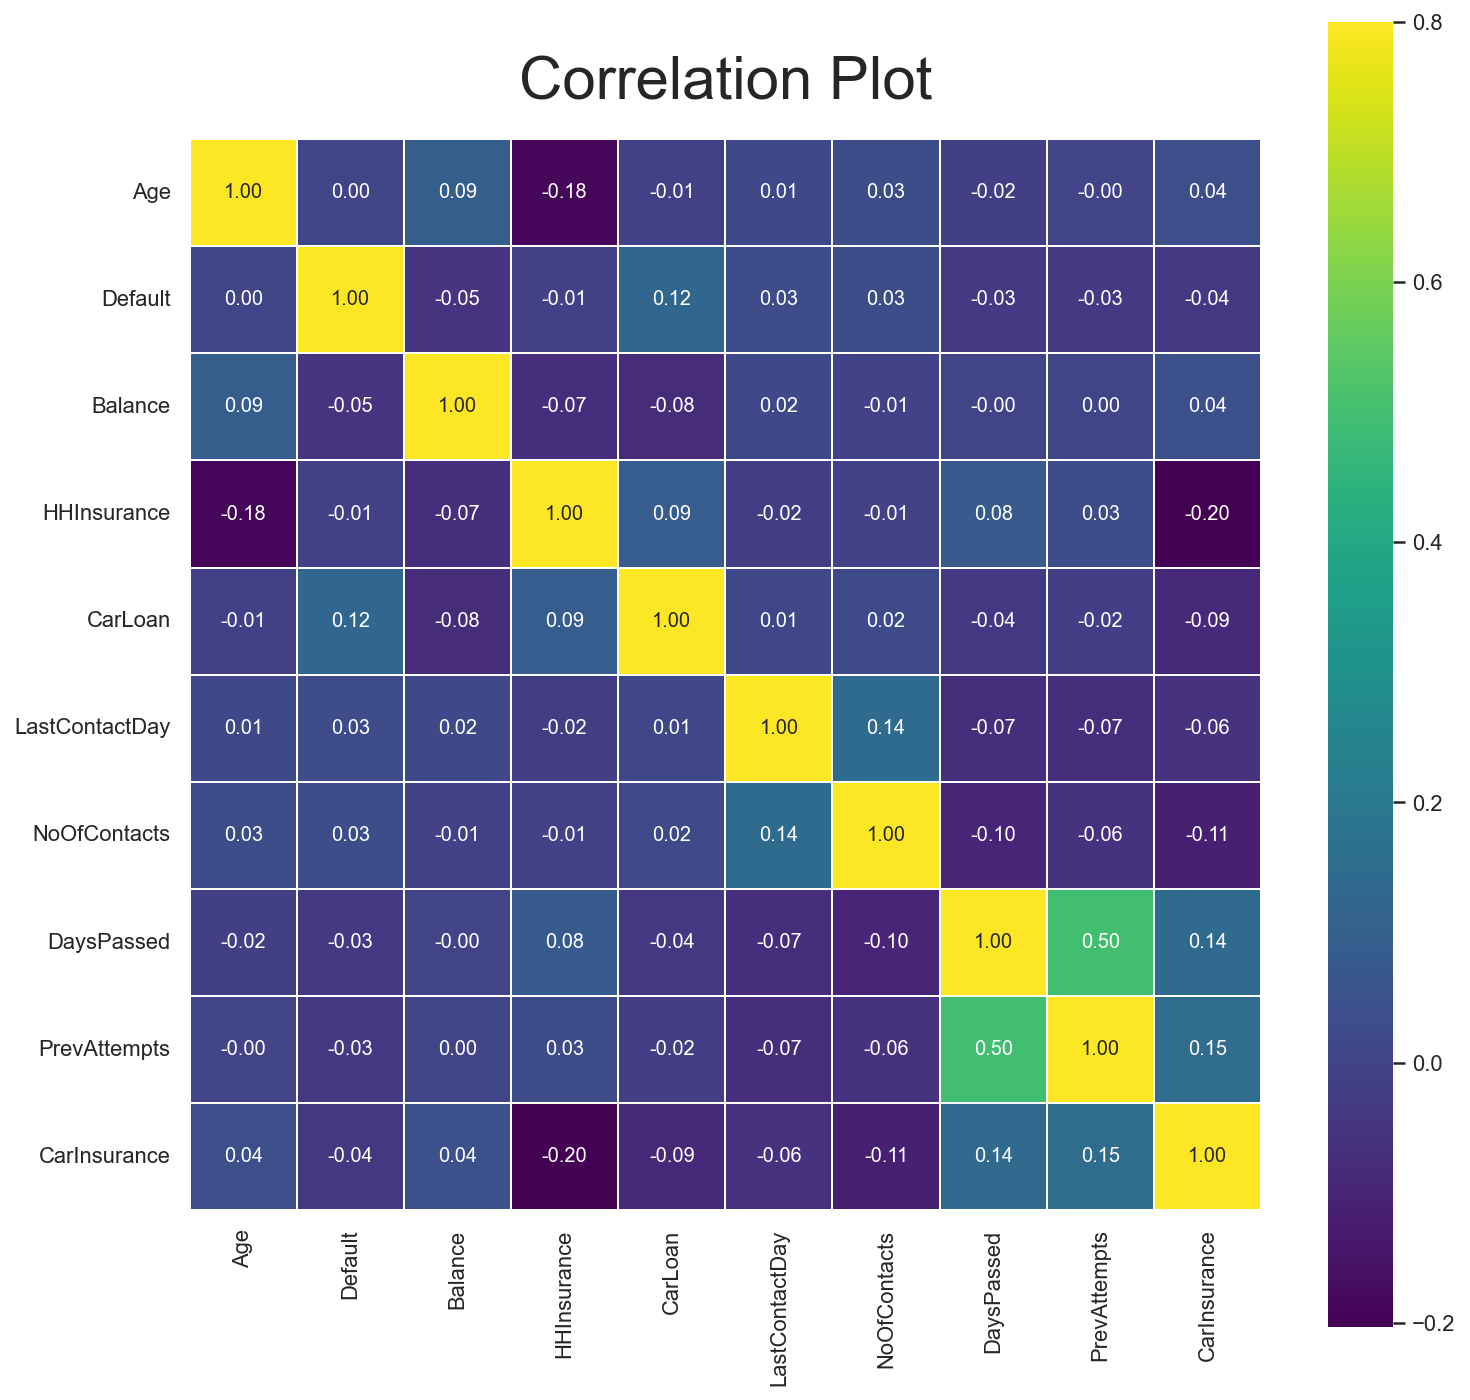

In [9]:
# First check out correlation among numeric features
# Heatmap is a useful tool to get a quick understanding of which variables are important
colormap = plt.cm.viridis
cor = train.corr()
cor = cor.drop(['Id'], axis = 1).drop(['Id'], axis = 0)
plt.figure(figsize=(12, 12))
plt.title('Correlation Plot', fontdict = {'fontsize' : 30}, pad = 20)
sns.heatmap(cor, vmax = 0.8, cmap = colormap, annot=True, fmt = '.2f', square = True, annot_kws={'size':10},
           linecolor='white', linewidths=0.1)

<Figure size 432x288 with 0 Axes>

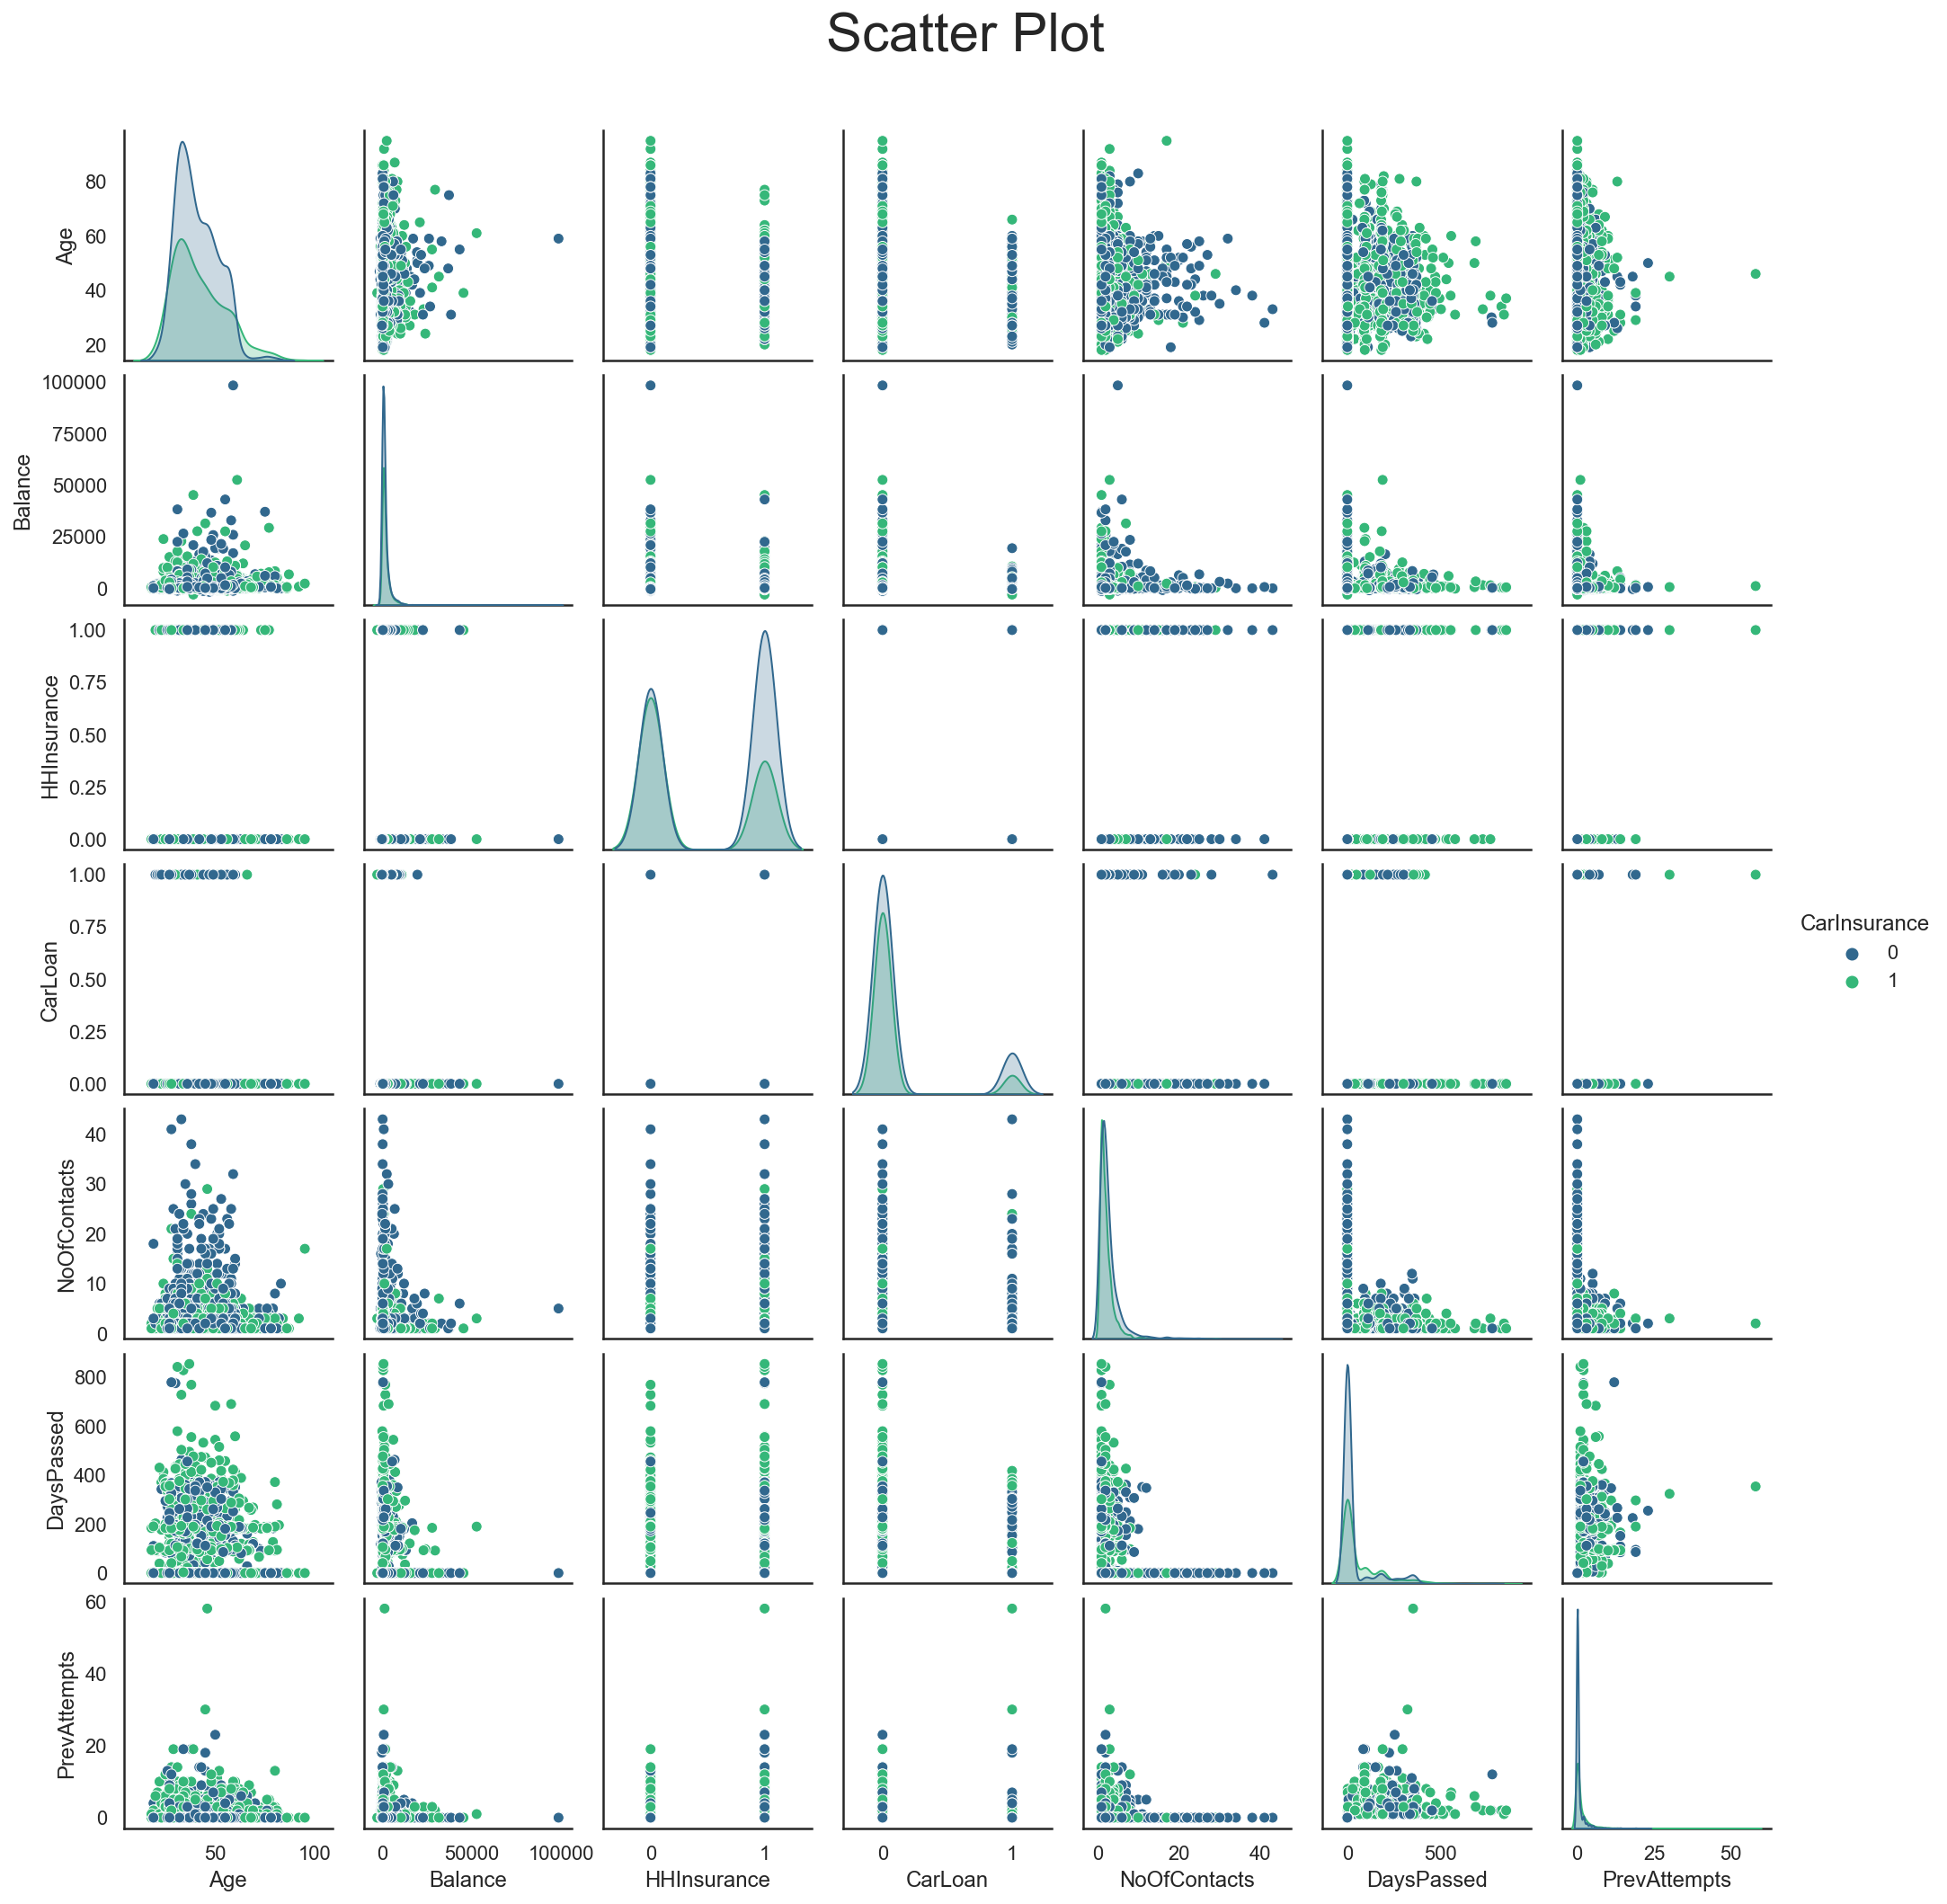

In [10]:
# Next, pair plot some important features
with sns.axes_style('white'):
    imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
    plt.suptitle('Scatter Plot')
    pp = sns.pairplot(train[imp_feats],hue='CarInsurance',palette='viridis',height= 2)
    pp.fig.suptitle("Scatter Plot", fontsize = 30, y=1.05)
    plt.show()

## Age Exploration 

In [11]:
# 개별 변수에 대해 분석
# Age에 대한 요약통계량
train.Age.describe()

count    4000.000000
mean       41.214750
std        11.550194
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

In [12]:
# Age와 CarInsurance의 관계는?
# 크게 차이가 없었음
train.groupby('CarInsurance')['Age'].agg(**{'mean_Age':'mean'}).reset_index()

CarInsurance   mean_Age
0             0  40.844741
1             1  41.767456

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


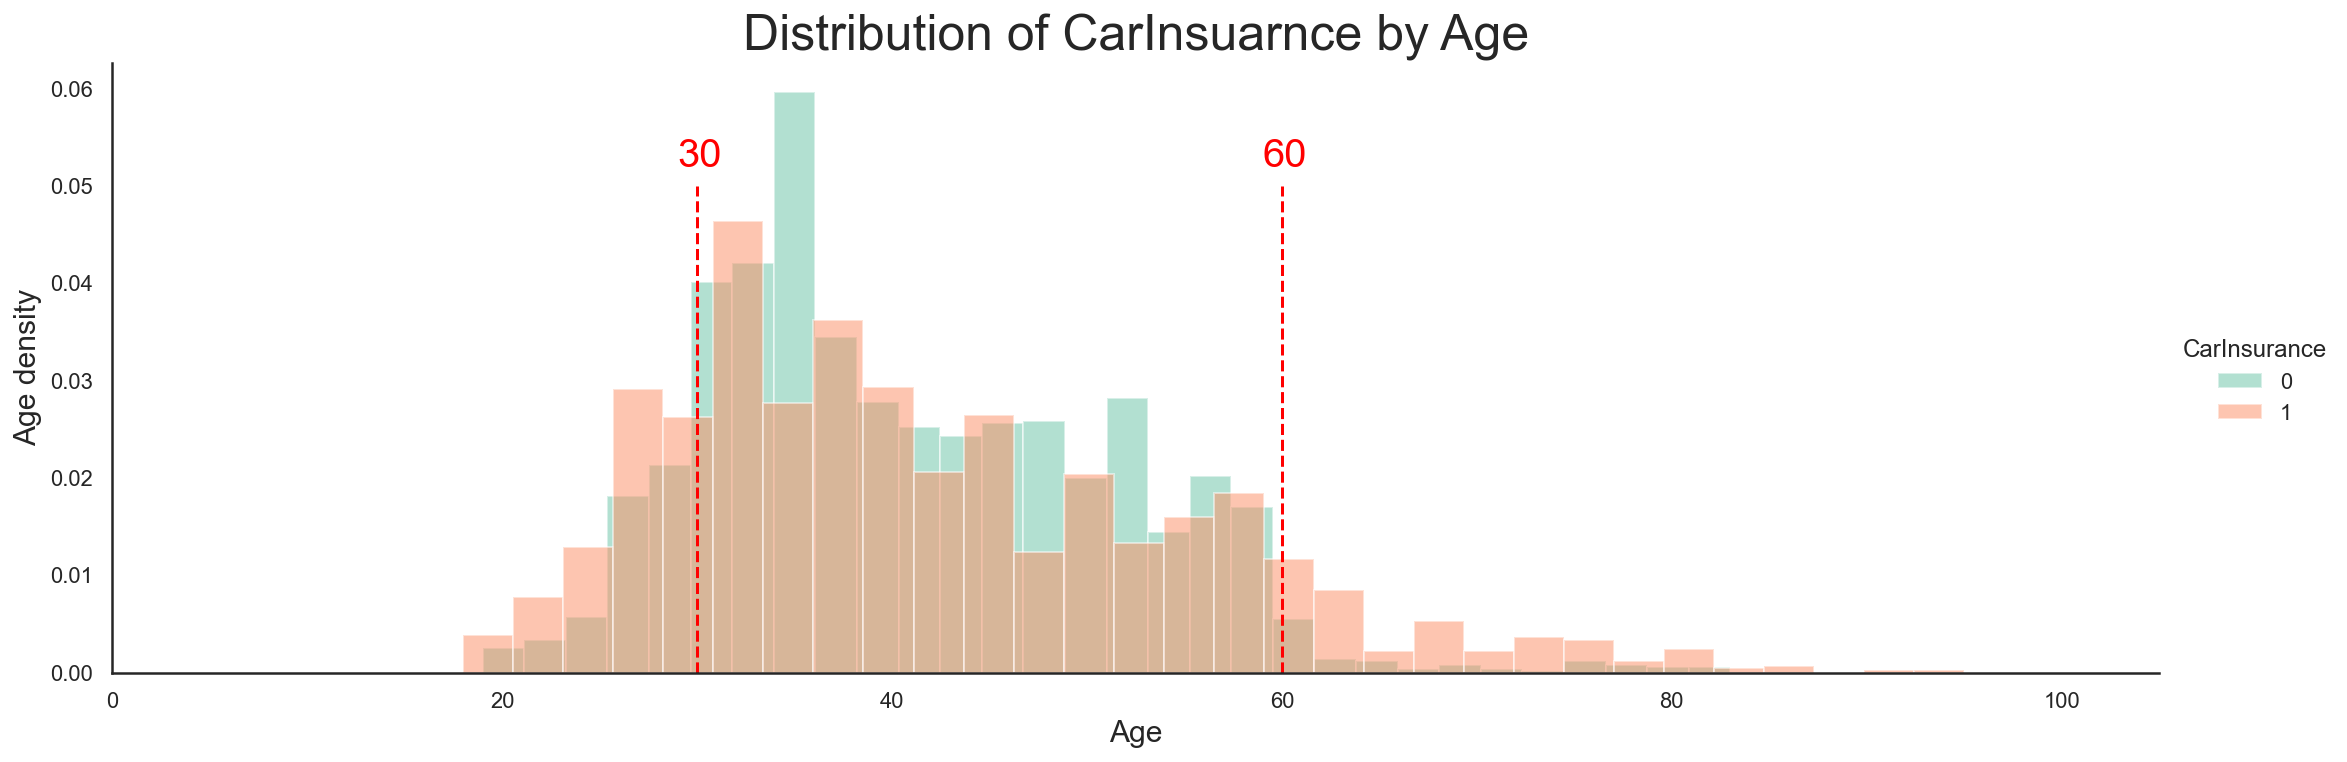

In [13]:
# Take a further look at Age
with sns.axes_style('white'):
    facet = sns.FacetGrid(train, hue='CarInsurance',size=5,aspect=3,palette='Set2')
    facet.map(plt.hist,'Age',bins=30,alpha=0.5, density = True)
    facet.set(xlim=(0,train.Age.max()+10))
    facet.add_legend()
    plt.title("Distribution of CarInsuarnce by Age", fontsize = 25)
    plt.ylabel('Age density', size = 15)
    plt.xlabel('Age', size = 15)
    plt.vlines(30, 0, 0.05, color = 'red', linestyle = '--')
    plt.text(29, 0.052,'30', fontdict = {'fontsize' : 20}, color = 'red')
    plt.vlines(60, 0, 0.05, color = 'red', linestyle = '--')
    plt.text(59, 0.052,'60', fontdict = {'fontsize' : 20}, color = 'red')

In [14]:
# 변수를 나누는 방법
# Age를 세 구간으로 나누는건 어떰? 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


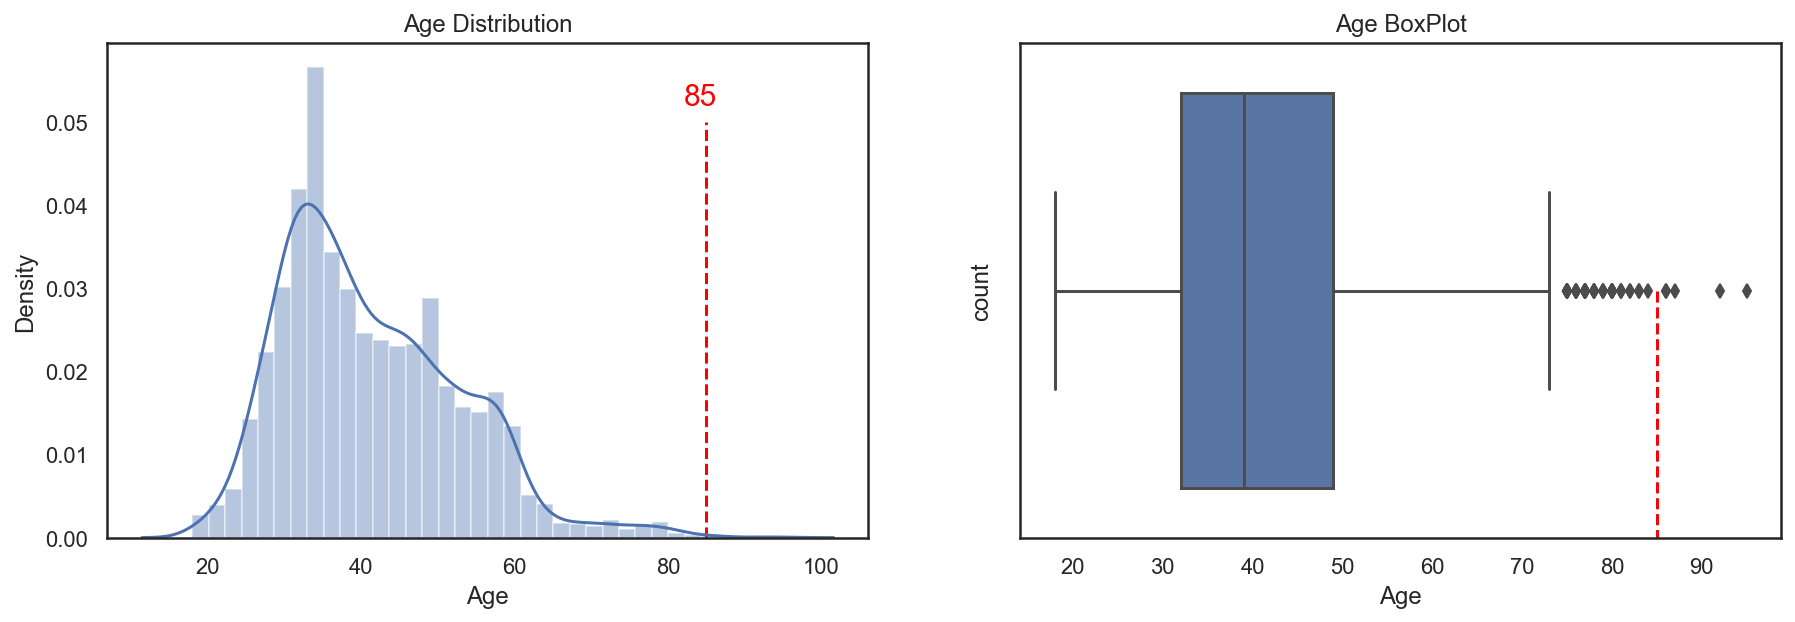

In [15]:
plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['Age'])
    plt.vlines(85, 0, 0.05, color = 'red', linestyle = '--')
    plt.text(82, 0.052,'85', fontdict = {'fontsize' : 15}, color = 'red')
    plt.title('Age Distribution')
    
    plt.subplot(2,2,2)    
    sns.boxplot(train['Age'])
    plt.vlines(85, 0, 0.5, color = 'red', linestyle = '--')
    plt.ylabel('count')
    plt.title('Age BoxPlot')

In [16]:
# 85세 초과 고객의 수
# 85세면 충분히 나이가 많으므로 굳이 보험전화를 할 필요가 없다고 고려됨
# 결측치 : 5개
idx = train[train['Age']>85].index
len(idx)

5

In [17]:
train = train.drop(idx)

In [18]:
# 나머지 결측치의 확인 및 데이터프레임은 추후 진행 현재 단계에서는 이상치에 대해서만 확인

## Job Exploration

<Figure size 1440x720 with 0 Axes>

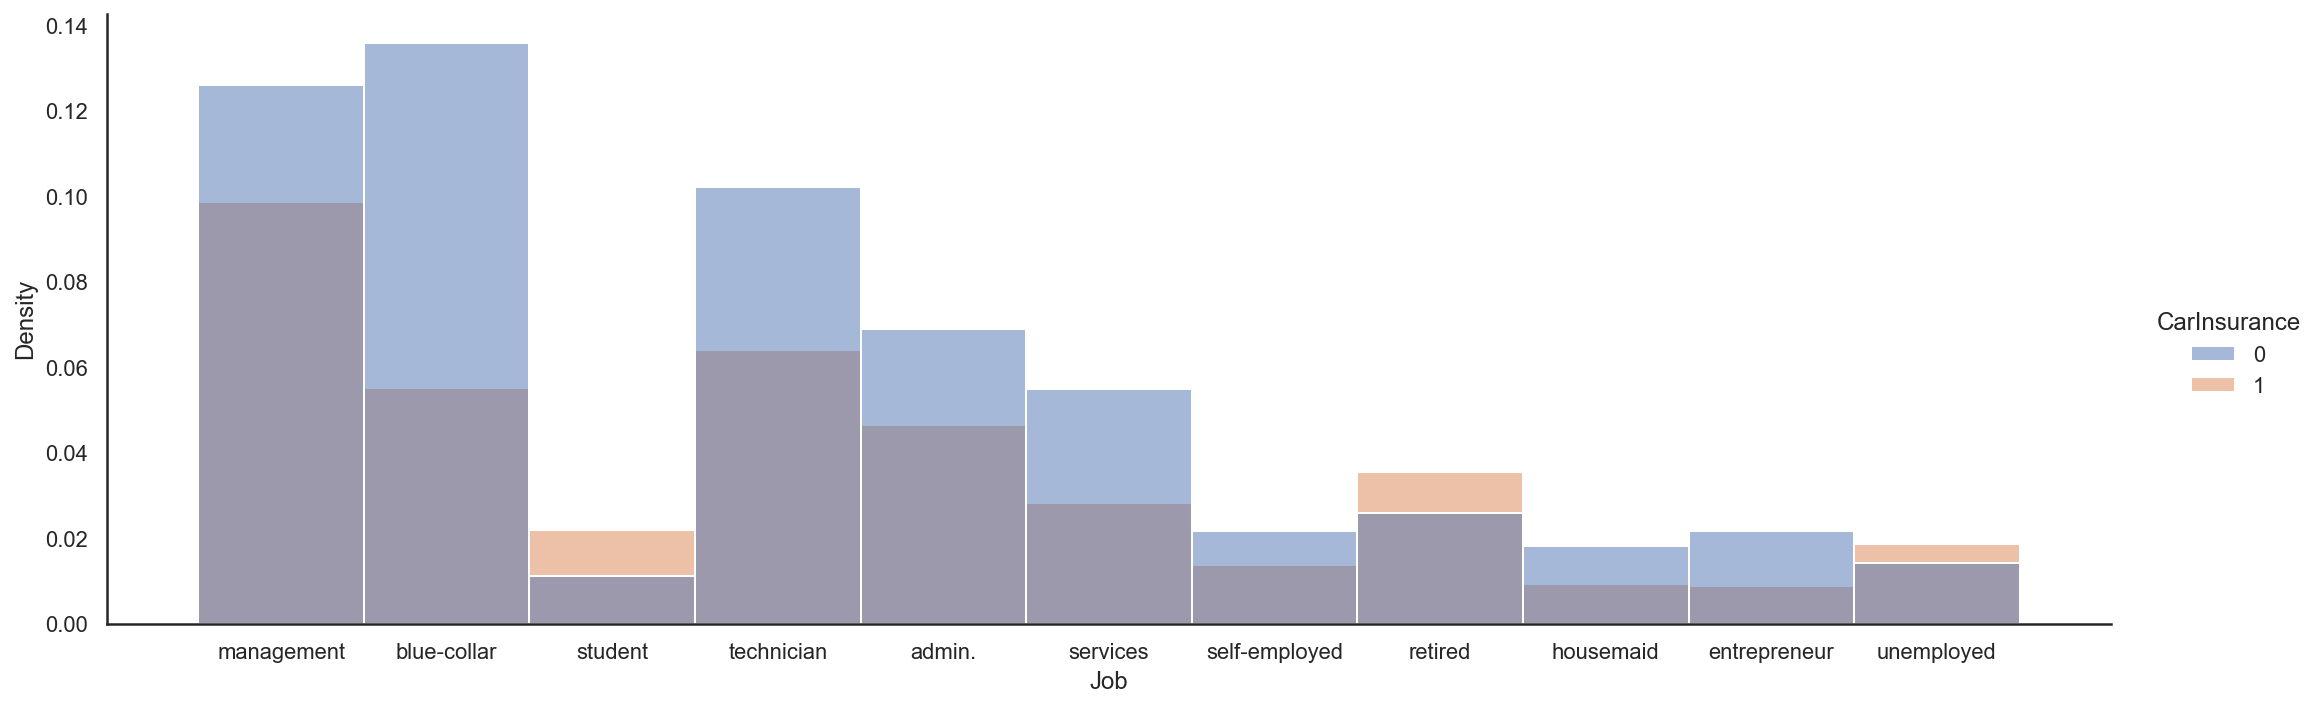

In [19]:
# 2. Job에 대한 계약 성사 여부
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    # sns.countplot(x = 'Job', hue = 'CarInsurance', data = train, palette='Set2')
    sns.displot(train, x="Job", hue="CarInsurance", stat="density", height = 5, aspect = 3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


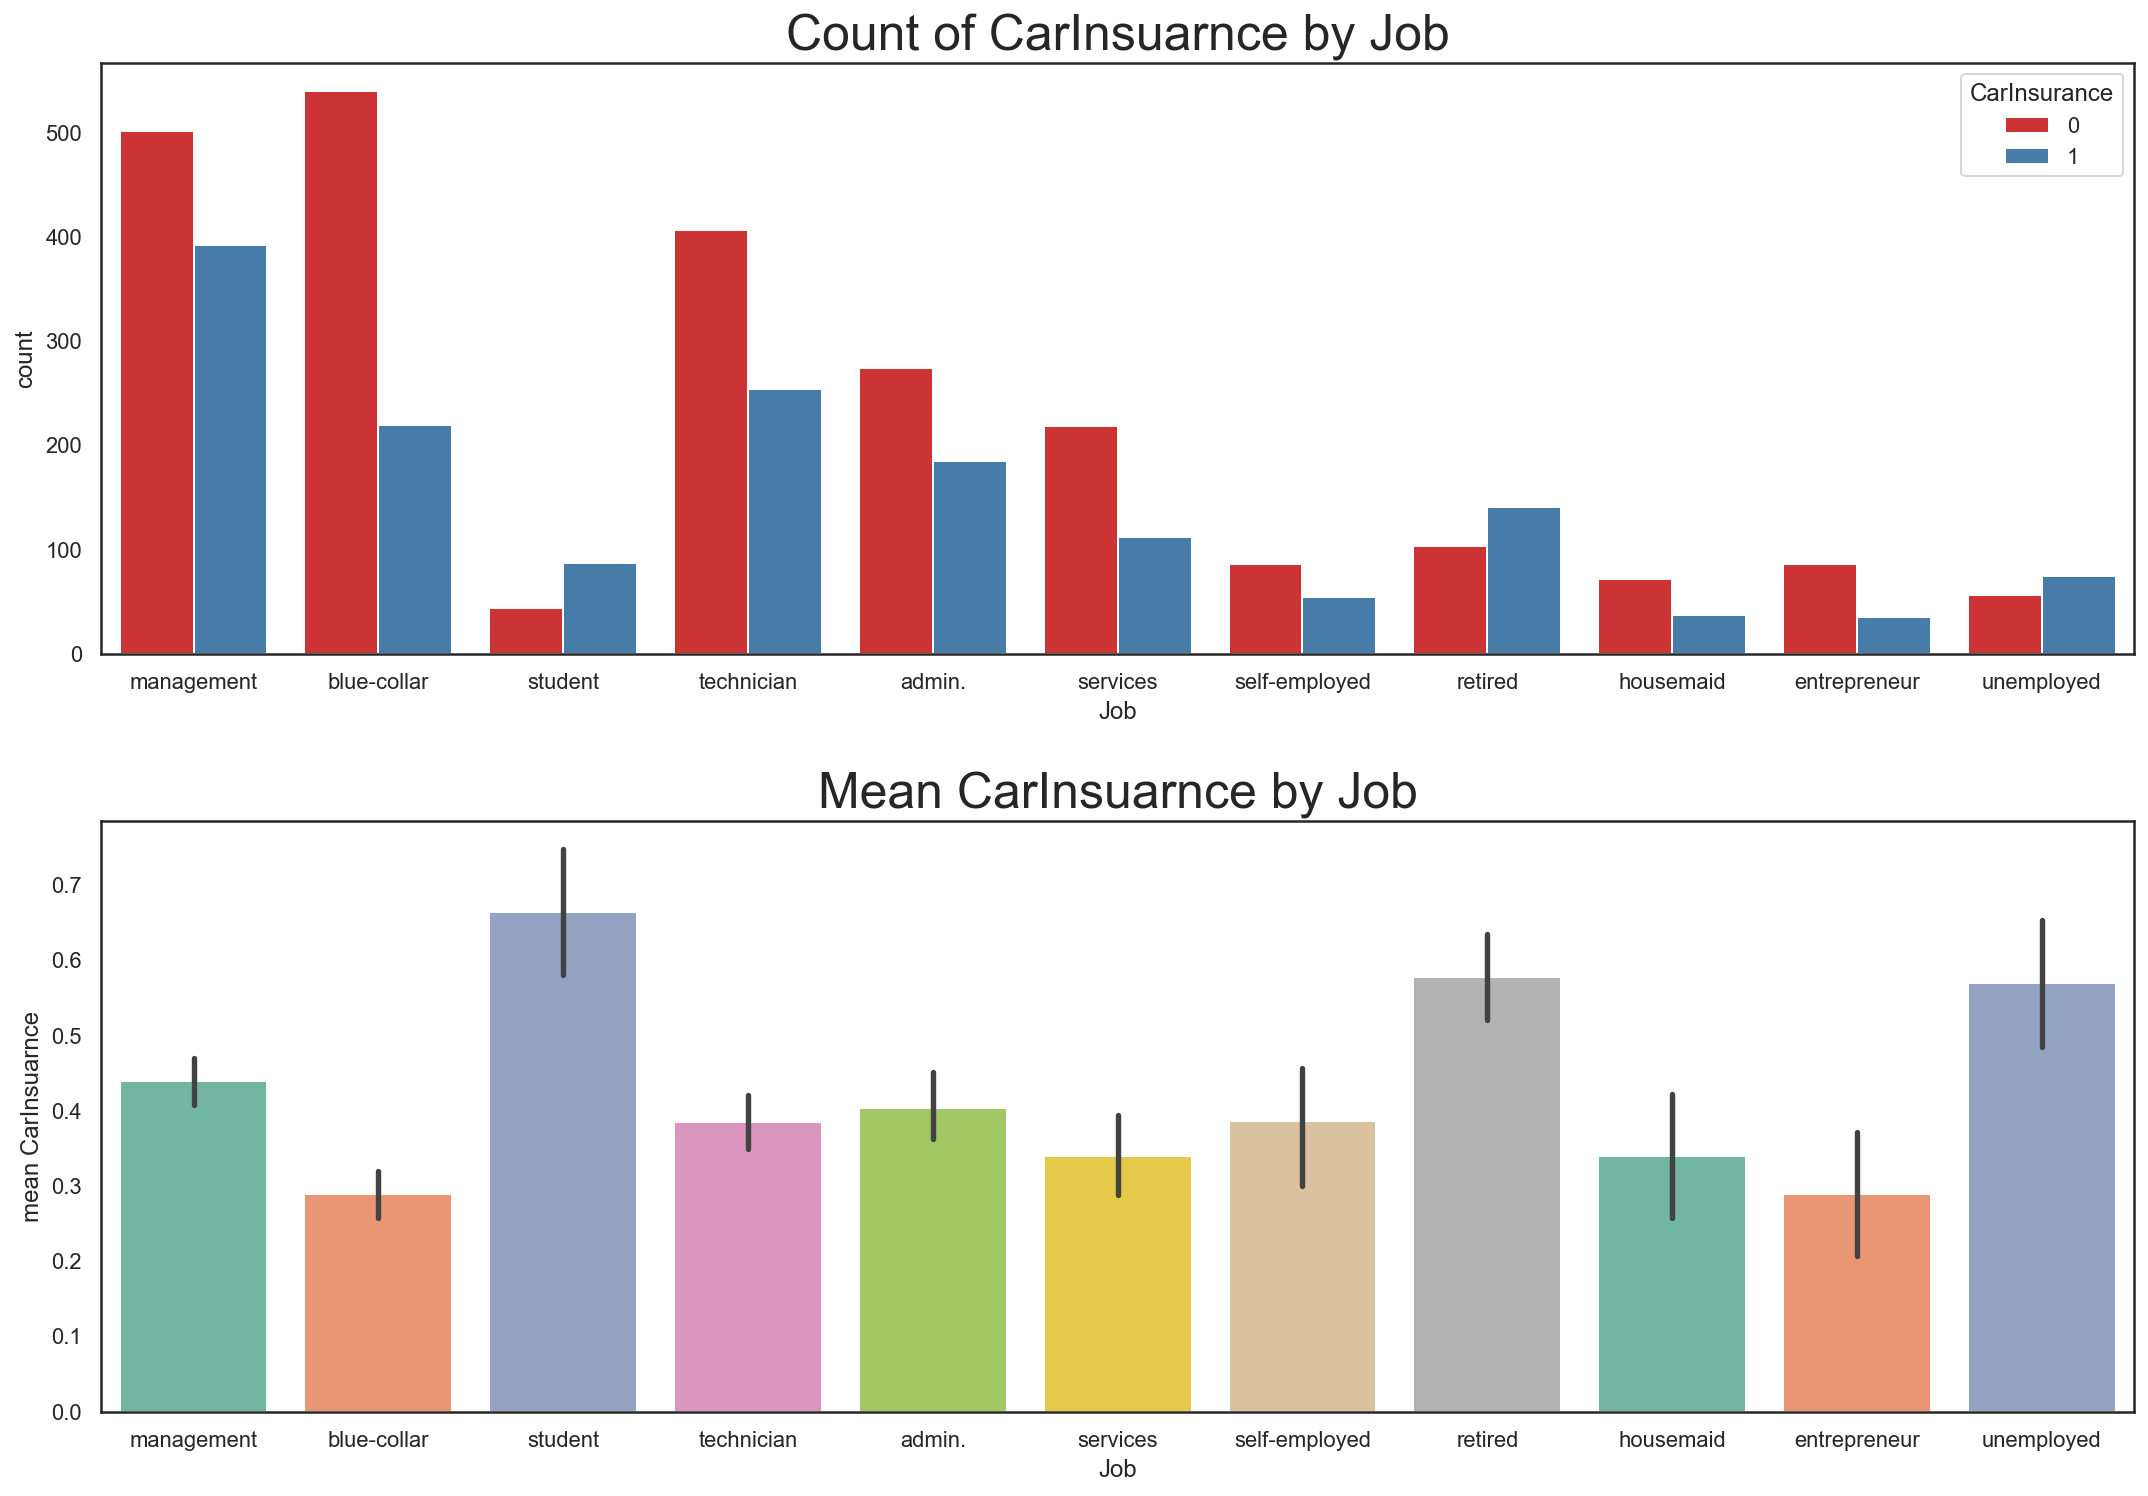

In [20]:
# 2. Job에 대한 계약 성사 여부
with sns.axes_style('white'):
    
    
    plt.figure(figsize=(15,10))
    
    
    plt.subplot(2,1,1)
    sns.countplot(x = 'Job', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by Job", fontsize = 25)
    
    plt.tight_layout(h_pad=5, w_pad=8)
    
    plt.subplot(2,1,2)
    sns.barplot('Job','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by Job", fontsize = 25)
    plt.ylabel('mean CarInsuarnce')

In [21]:
## Job과 Balance의 관계는? 보험계약건수에 대해서는 크게 중요하지 않아보임

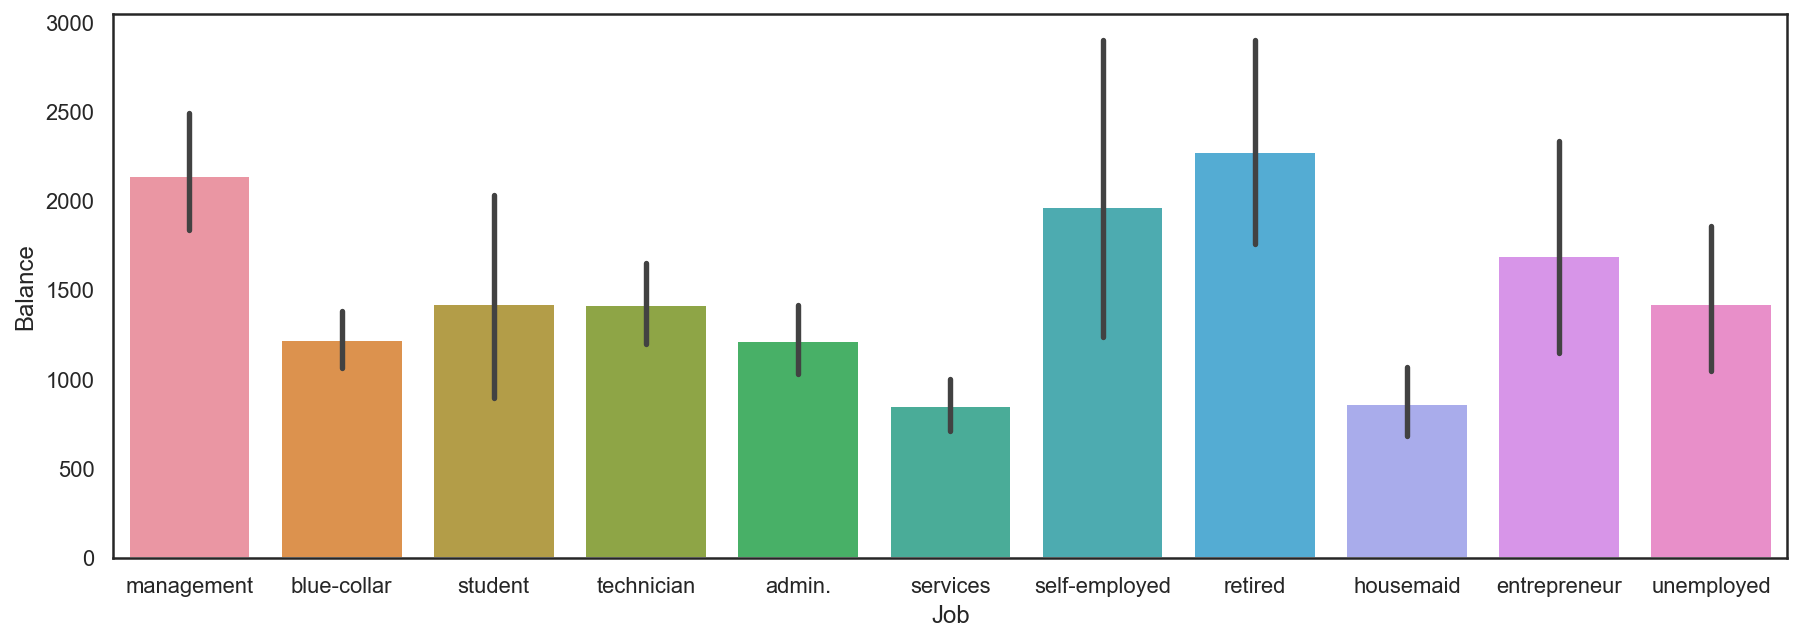

In [22]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.barplot(x = "Job", y = "Balance", data = train)

### Job - Age Outlier

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

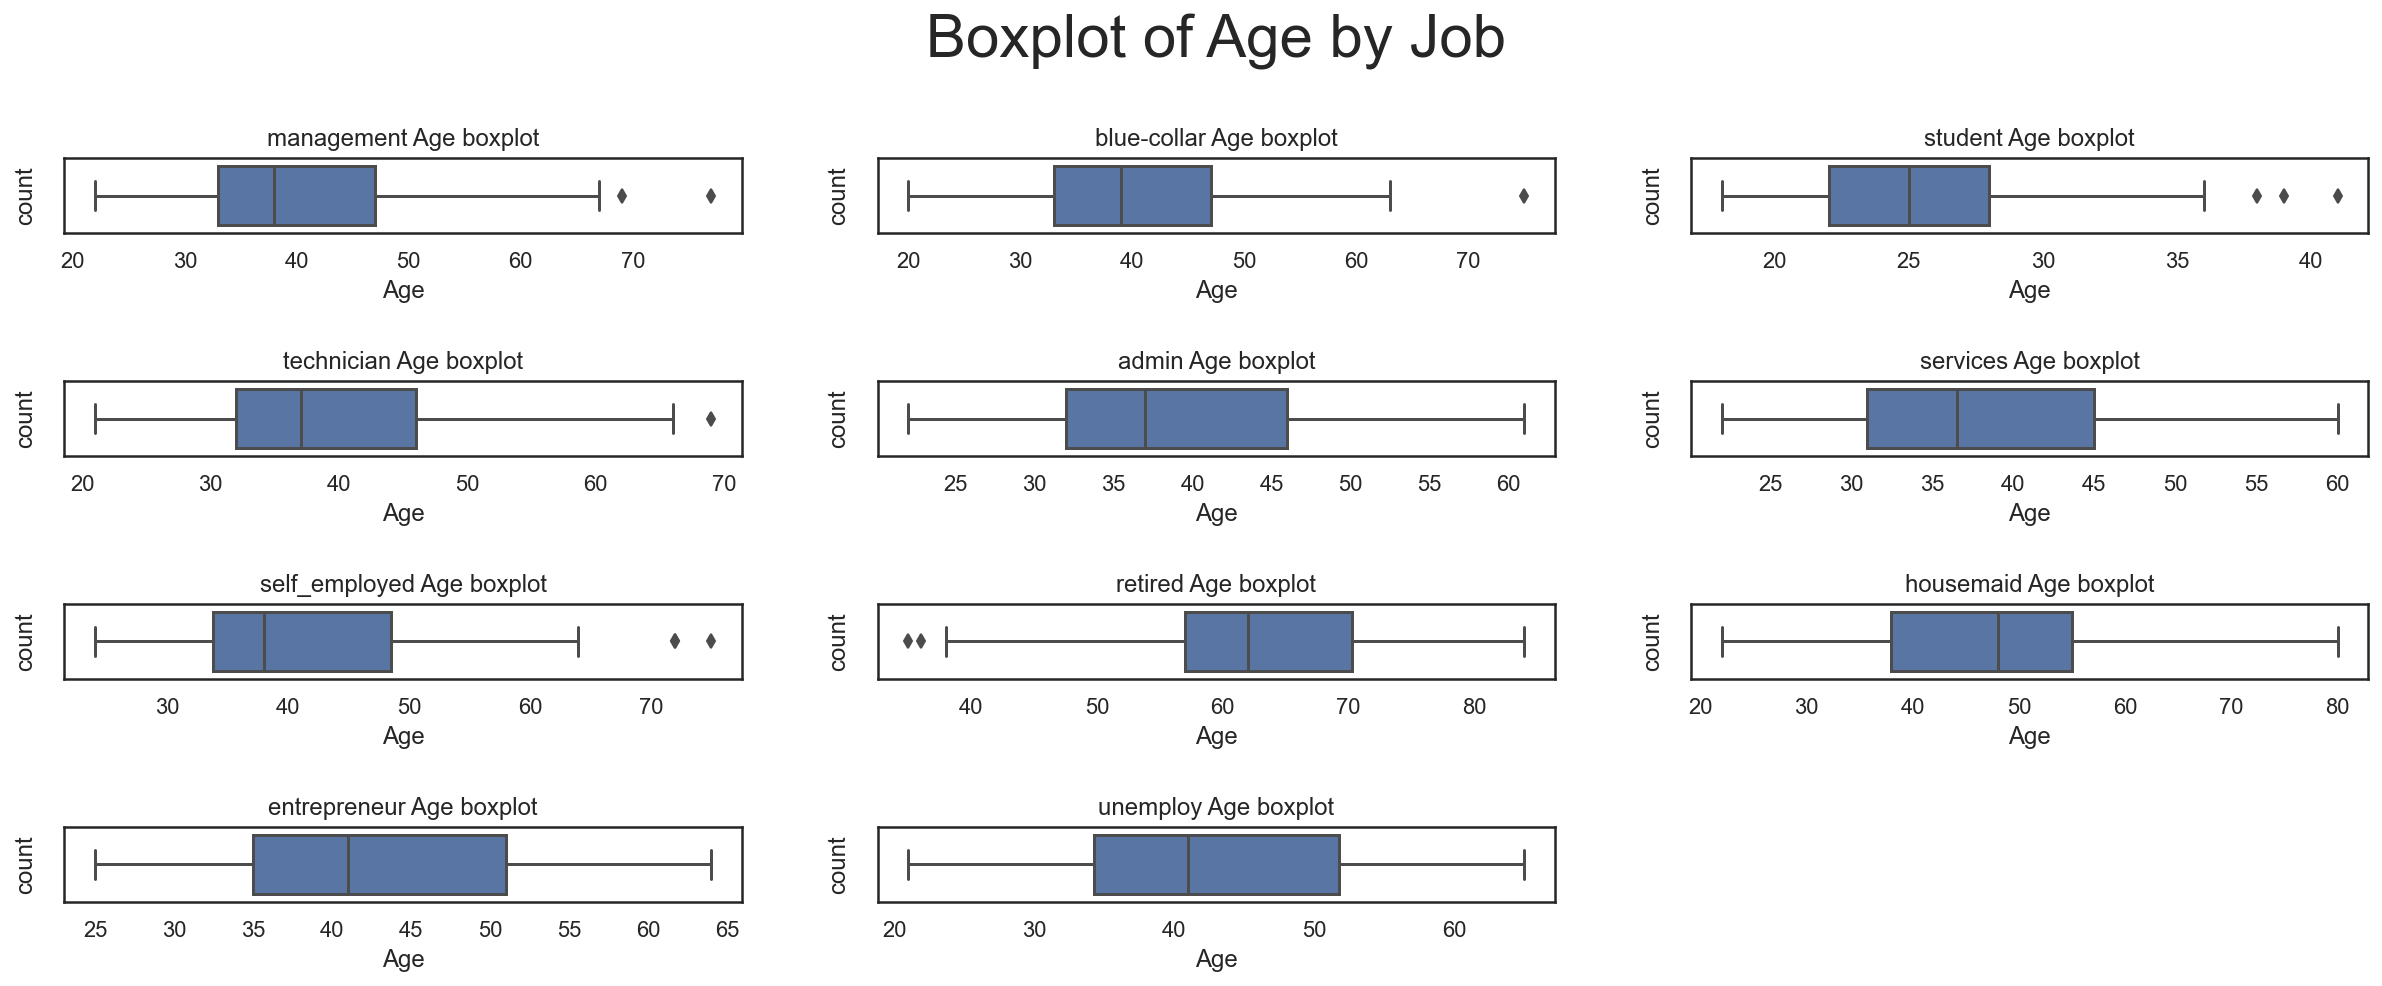

In [23]:
# 학생과 은퇴자 비고용자가 왜 CarInsuarance가 높을까? 
# 직업과 나이관의 관계가 어떻게 될까?
# 이상치 처리에서 직업별로 나이대를 찾아보고 제거하자
# subplot으로 이상치 표현해서 찾아보기 

## 이상값이 있어 보이는 컬럼
# 1. management 이상값
# 2. blue-collar
# 3. student
# 4. technician
# 5. self-employed
# 6. retired : 미만값도 포함


plt.figure(figsize = (20, 20))


with sns.axes_style('white'):
    plt.suptitle('Boxplot of Age by Job', size = 30, y = 0.95)
    
    plt.subplot(11,3,1)
    train_management = train[train['Job']=='management']
    ax = sns.boxplot(train_management['Age'])
    ax.set_ylabel("count")
    ax.set_title("management Age boxplot")
    
    plt.subplot(11,3,2)
    train_blue = train[train['Job']=='blue-collar']
    train_blue.Age.describe()
    ax = sns.boxplot(train_blue['Age'])
    ax.set_ylabel("count")
    ax.set_title("blue-collar Age boxplot")
    
    
    plt.subplot(11,3,3)
    train_student = train[train['Job']=='student']
    train_student.Age.describe()
    ax = sns.boxplot(train_student['Age'])
    ax.set_ylabel("count")
    ax.set_title("student Age boxplot")
    
    # 참고 사이트 : https://steadiness-193.tistory.com/174
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=2)
    plt.subplot(11,3,4)
    train_technician = train[train['Job']=='technician']
    train_technician.Age.describe()
    ax = sns.boxplot(train_technician['Age'])
    ax.set_ylabel("count")
    ax.set_title("technician Age boxplot")
    
    
    plt.subplot(11,3,5)
    train_admin = train[train['Job']=='admin.']
    train_admin.Age.describe()
    ax = sns.boxplot(train_admin['Age'])
    ax.set_ylabel("count")
    ax.set_title("admin Age boxplot")
    
    
    plt.subplot(11,3,6)
    train_services = train[train['Job']=='services']
    train_services.Age.describe()
    ax = sns.boxplot(train_services['Age'])
    ax.set_ylabel("count")
    ax.set_title("services Age boxplot")    
    
    
    plt.subplot(11,3,7)
    train_self = train[train['Job']=='self-employed']
    train_self.Age.describe()
    ax = sns.boxplot(train_self['Age'])
    ax.set_ylabel("count")
    ax.set_title("self_employed Age boxplot")
    
    
    plt.subplot(11,3,8)
    train_retired = train[train['Job']=='retired']
    train_retired.Age.describe()
    ax = sns.boxplot(train_retired['Age'])
    ax.set_ylabel("count")
    ax.set_title("retired Age boxplot")    
    
    plt.subplot(11,3,9)
    train_housemaid = train[train['Job']=='housemaid']
    train_housemaid.Age.describe()
    ax = sns.boxplot(train_housemaid['Age'])
    ax.set_ylabel("count")
    ax.set_title("housemaid Age boxplot")
    
    
    plt.subplot(11,3,10)
    train_entrepreneur = train[train['Job']=='entrepreneur']
    train_entrepreneur.Age.describe()
    ax = sns.boxplot(train_entrepreneur['Age'])
    ax.set_ylabel("count")
    ax.set_title("entrepreneur Age boxplot")
    
    
    plt.subplot(11,3,11)
    train_unemploy = train[train['Job']=='unemployed']
    train_unemploy.Age.describe()
    ax = sns.boxplot(train_unemploy['Age'])
    ax.set_ylabel("count")
    ax.set_title("unemploy Age boxplot")

In [24]:
## 이상값이 있어 보이는 컬럼
# 1. management 이상값
# 2. blue-collar
# 3. student
# 4. technician
# 7. self-employed
# 8. retired : 미만값도 포함
# 이상치 Job
job_ls = []

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

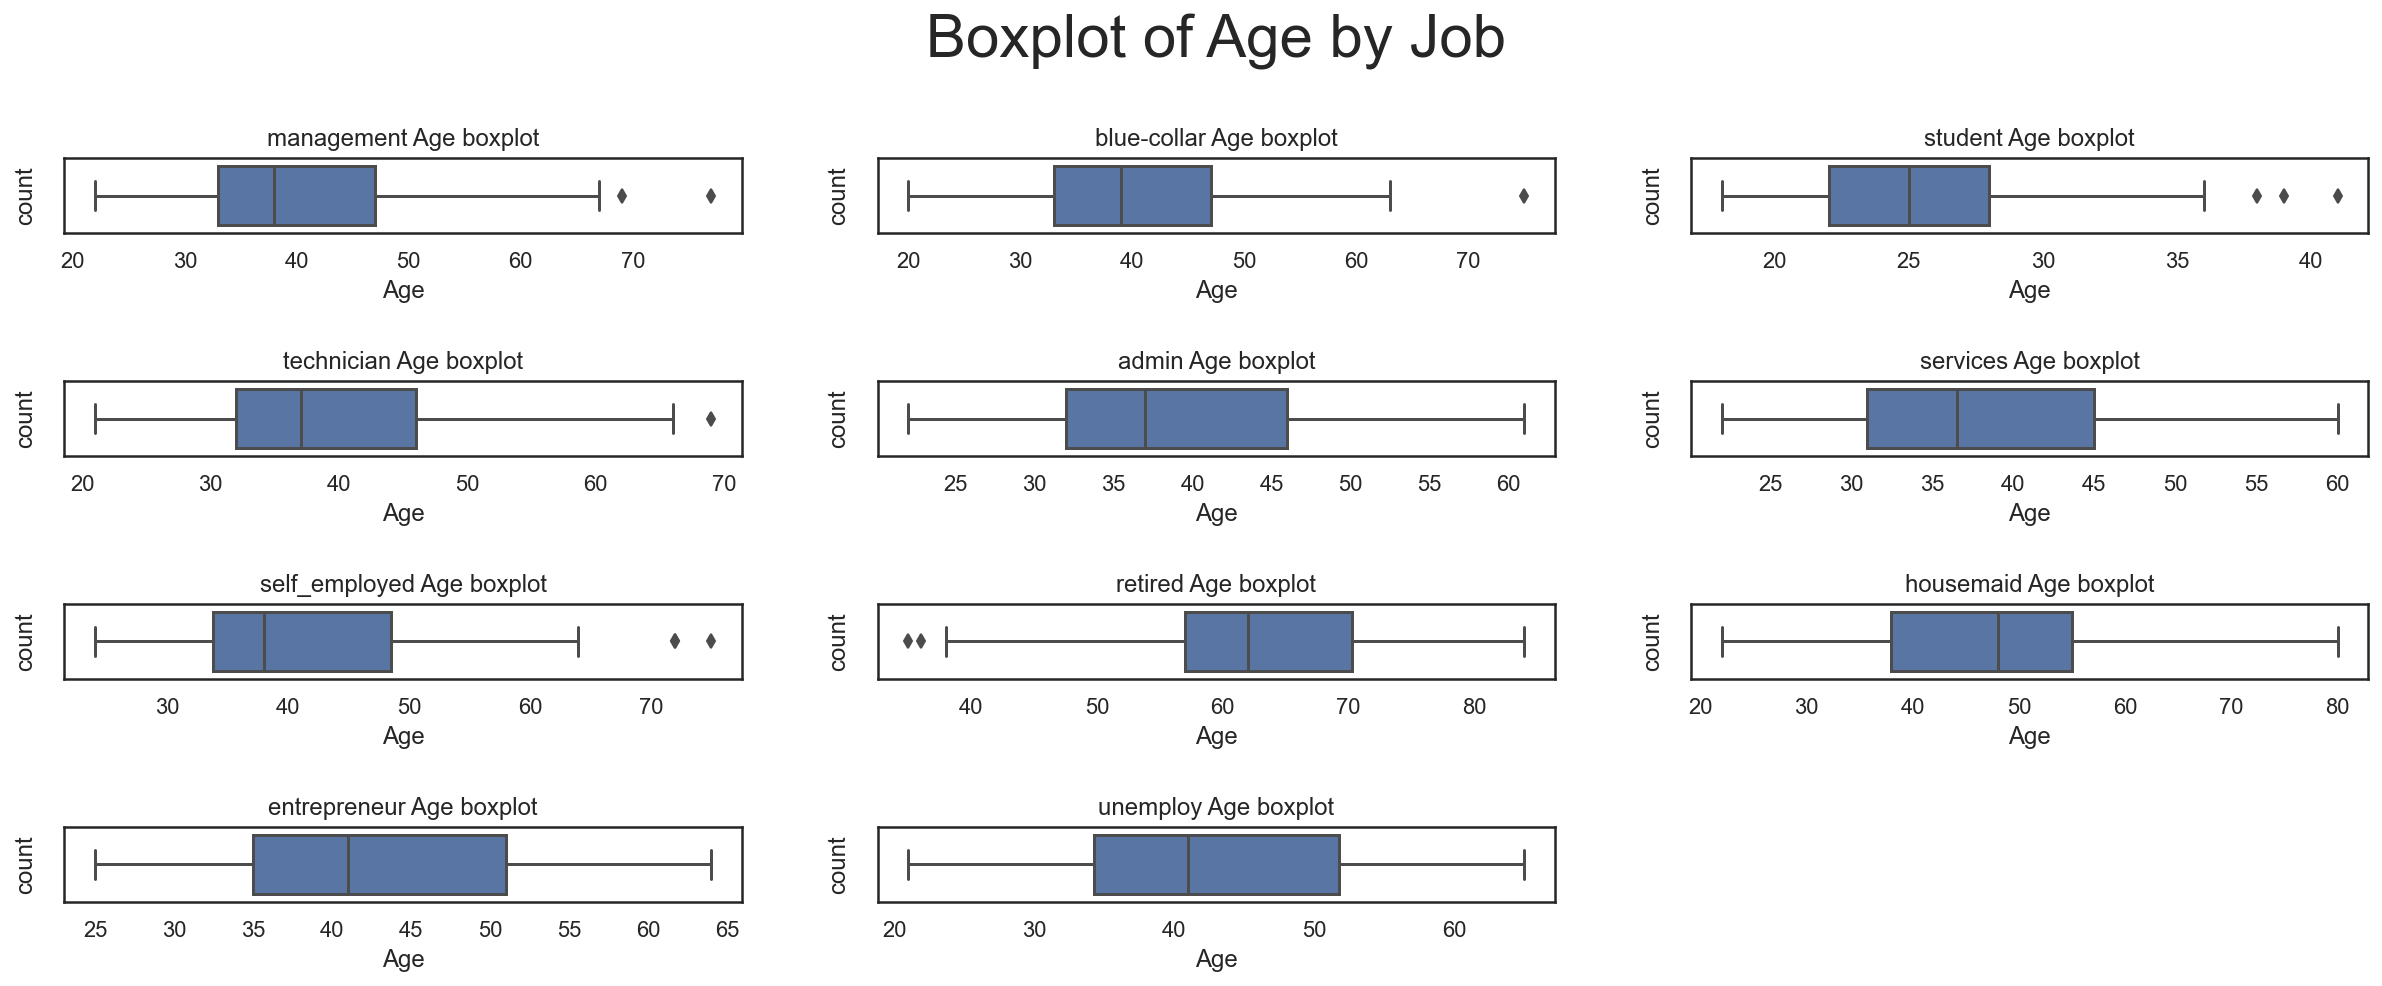

In [25]:
plt.figure(figsize = (20, 20))


with sns.axes_style('white'):
    
    ####################################################
    
    plt.suptitle('Boxplot of Age by Job', size = 30, y = 0.95)
    
    plt.subplot(11,3,1)
    train_management = train[train['Job']=='management']
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_management['Age'], 0.25), np.quantile(train_management['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_management[train_management['Age']>manage_age_upper].index
    job_ls.append(len(idx))
    train = train.drop(idx)
    
    ax = sns.boxplot(train_management['Age'])
    ax.set_ylabel("count")
    ax.set_title("management Age boxplot")
    
    ####################################################
    
    plt.subplot(11,3,2)
    
    train_blue = train[train['Job']=='blue-collar']
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_blue['Age'], 0.25), np.quantile(train_blue['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_blue[train_blue['Age']>manage_age_upper].index
    job_ls.append(len(idx))    
    train = train.drop(idx)
    
    ax = sns.boxplot(train_blue['Age'])
    ax.set_ylabel("count")
    ax.set_title("blue-collar Age boxplot")
    
    ######################################################
    
    plt.subplot(11,3,3)
    train_student = train[train['Job']=='student']
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_student['Age'], 0.25), np.quantile(train_student['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_student[train_student['Age']>manage_age_upper].index
    job_ls.append(len(idx))  
    train = train.drop(idx)
    
    ax = sns.boxplot(train_student['Age'])
    ax.set_ylabel("count")
    ax.set_title("student Age boxplot")
    
    
    ######################################################
    
    # 참고 사이트 : https://steadiness-193.tistory.com/174
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=2)
    
    plt.subplot(11,3,4)
    train_technician = train[train['Job']=='technician']
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_technician['Age'], 0.25), np.quantile(train_technician['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_technician[train_technician['Age']>manage_age_upper].index
    job_ls.append(len(idx))    
    train = train.drop(idx)
    
    ax = sns.boxplot(train_technician['Age'])
    ax.set_ylabel("count")
    ax.set_title("technician Age boxplot")
    
    ######################################################
    
    plt.subplot(11,3,5)
    train_admin = train[train['Job']=='admin.']
    ax = sns.boxplot(train_admin['Age'])
    ax.set_ylabel("count")
    ax.set_title("admin Age boxplot")
    
    ######################################################
    
    plt.subplot(11,3,6)
    train_services = train[train['Job']=='services']
    ax = sns.boxplot(train_services['Age'])
    ax.set_ylabel("count")
    ax.set_title("services Age boxplot")    
    
    ######################################################    
    plt.subplot(11,3,7)
    train_self = train[train['Job']=='self-employed']
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_self['Age'], 0.25), np.quantile(train_self['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_self[train_self['Age']>70].index
    job_ls.append(len(idx))
    train = train.drop(idx)
    
    ax = sns.boxplot(train_self['Age'])
    ax.set_ylabel("count")
    ax.set_title("self_employed Age boxplot")
    
    
    ######################################################
    plt.subplot(11,3,8)
    train_retired = train[train['Job']=='retired']
    
    
    # IRQ 계산하기
    q25, q75 = np.quantile(train_retired['Age'], 0.25), np.quantile(train_retired['Age'], 0.75)

    # IQR 계산하기
    iqr = q75 - q25    

    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          

    # lower와 upper bound 값 구하기     
    manage_age_lower, manage_age_upper = q25 - cut_off, q75 + cut_off    
    
    # 70세 이상은 극단값으로 보이므로 이상값을 제거함
    idx = train_retired[train_retired['Age']>90].index
    # 기준값 40으로 적용
    idx2 = train_retired[train_retired['Age']<40].index
    job_ls.append(len(idx) + len(idx2))
    train = train.drop(idx)
    train = train.drop(idx2)
    
    
    ax = sns.boxplot(train_retired['Age'])
    ax.set_ylabel("count")
    ax.set_title("retired Age boxplot") 
    
    
    ######################################################
    plt.subplot(11,3,9)
    train_housemaid = train[train['Job']=='housemaid']
    ax = sns.boxplot(train_housemaid['Age'])
    ax.set_ylabel("count")
    ax.set_title("housemaid Age boxplot")

    
    ######################################################
    plt.subplot(11,3,10)
    train_entrepreneur = train[train['Job']=='entrepreneur']
    ax = sns.boxplot(train_entrepreneur['Age'])
    ax.set_ylabel("count")
    ax.set_title("entrepreneur Age boxplot")
    
    
    
    ######################################################
    plt.subplot(11,3,11)
    train_unemploy = train[train['Job']=='unemployed']
    ax = sns.boxplot(train_unemploy['Age'])
    ax.set_ylabel("count")
    ax.set_title("unemploy Age boxplot")

In [26]:
job_ls

[2, 1, 3, 1, 3, 3]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

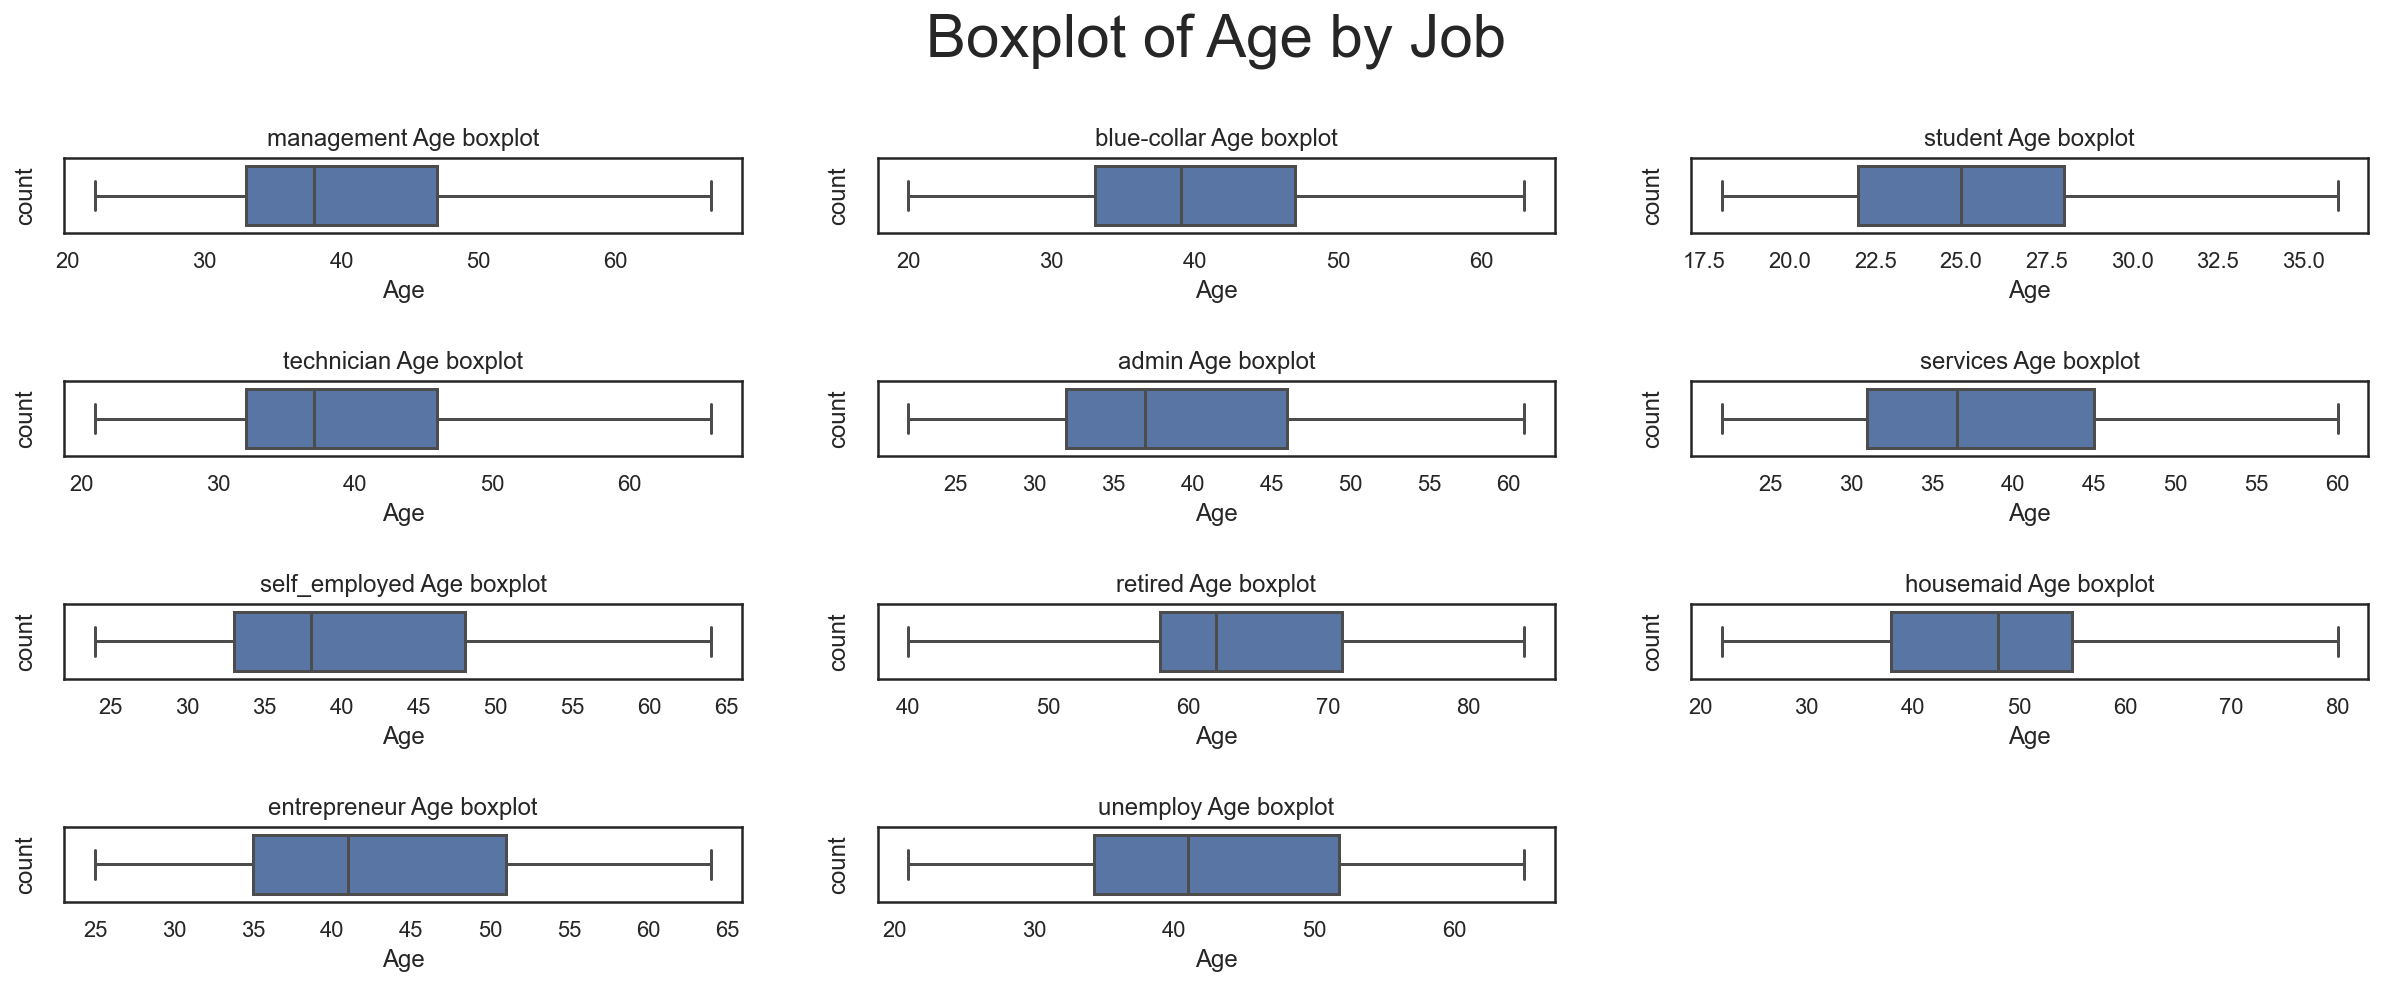

In [27]:
# 학생과 은퇴자 비고용자가 왜 CarInsuarance가 높을까? 
# 직업과 나이관의 관계가 어떻게 될까?
# 이상치 처리에서 직업별로 나이대를 찾아보고 제거하자
# subplot으로 이상치 표현해서 찾아보기 

## 이상값이 있어 보이는 컬럼
# 1. management 이상값
# 2. blue-collar
# 3. student
# 4. technician
# 5. self-employed
# 6. retired : 미만값도 포함


plt.figure(figsize = (20, 20))


with sns.axes_style('white'):
    
    
    plt.suptitle('Boxplot of Age by Job', size = 30, y = 0.95)
    
    plt.subplot(11,3,1)
    train_management = train[train['Job']=='management']
    ax = sns.boxplot(train_management['Age'])
    ax.set_ylabel("count")
    ax.set_title("management Age boxplot")
    
    plt.subplot(11,3,2)
    train_blue = train[train['Job']=='blue-collar']
    train_blue.Age.describe()
    ax = sns.boxplot(train_blue['Age'])
    ax.set_ylabel("count")
    ax.set_title("blue-collar Age boxplot")
    
    
    plt.subplot(11,3,3)
    train_student = train[train['Job']=='student']
    train_student.Age.describe()
    ax = sns.boxplot(train_student['Age'])
    ax.set_ylabel("count")
    ax.set_title("student Age boxplot")
    
    # 참고 사이트 : https://steadiness-193.tistory.com/174
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=2)
    plt.subplot(11,3,4)
    train_technician = train[train['Job']=='technician']
    train_technician.Age.describe()
    ax = sns.boxplot(train_technician['Age'])
    ax.set_ylabel("count")
    ax.set_title("technician Age boxplot")
    
    
    plt.subplot(11,3,5)
    train_admin = train[train['Job']=='admin.']
    train_admin.Age.describe()
    ax = sns.boxplot(train_admin['Age'])
    ax.set_ylabel("count")
    ax.set_title("admin Age boxplot")
    
    
    plt.subplot(11,3,6)
    train_services = train[train['Job']=='services']
    train_services.Age.describe()
    ax = sns.boxplot(train_services['Age'])
    ax.set_ylabel("count")
    ax.set_title("services Age boxplot")    
    
    
    plt.subplot(11,3,7)
    train_self = train[train['Job']=='self-employed']
    train_self.Age.describe()
    ax = sns.boxplot(train_self['Age'])
    ax.set_ylabel("count")
    ax.set_title("self_employed Age boxplot")
    
    
    plt.subplot(11,3,8)
    train_retired = train[train['Job']=='retired']
    train_retired.Age.describe()
    ax = sns.boxplot(train_retired['Age'])
    ax.set_ylabel("count")
    ax.set_title("retired Age boxplot")    
    
    plt.subplot(11,3,9)
    train_housemaid = train[train['Job']=='housemaid']
    train_housemaid.Age.describe()
    ax = sns.boxplot(train_housemaid['Age'])
    ax.set_ylabel("count")
    ax.set_title("housemaid Age boxplot")
    
    
    plt.subplot(11,3,10)
    train_entrepreneur = train[train['Job']=='entrepreneur']
    train_entrepreneur.Age.describe()
    ax = sns.boxplot(train_entrepreneur['Age'])
    ax.set_ylabel("count")
    ax.set_title("entrepreneur Age boxplot")
    
    
    plt.subplot(11,3,11)
    train_unemploy = train[train['Job']=='unemployed']
    train_unemploy.Age.describe()
    ax = sns.boxplot(train_unemploy['Age'])
    ax.set_ylabel("count")
    ax.set_title("unemploy Age boxplot")

## Marital Exploration

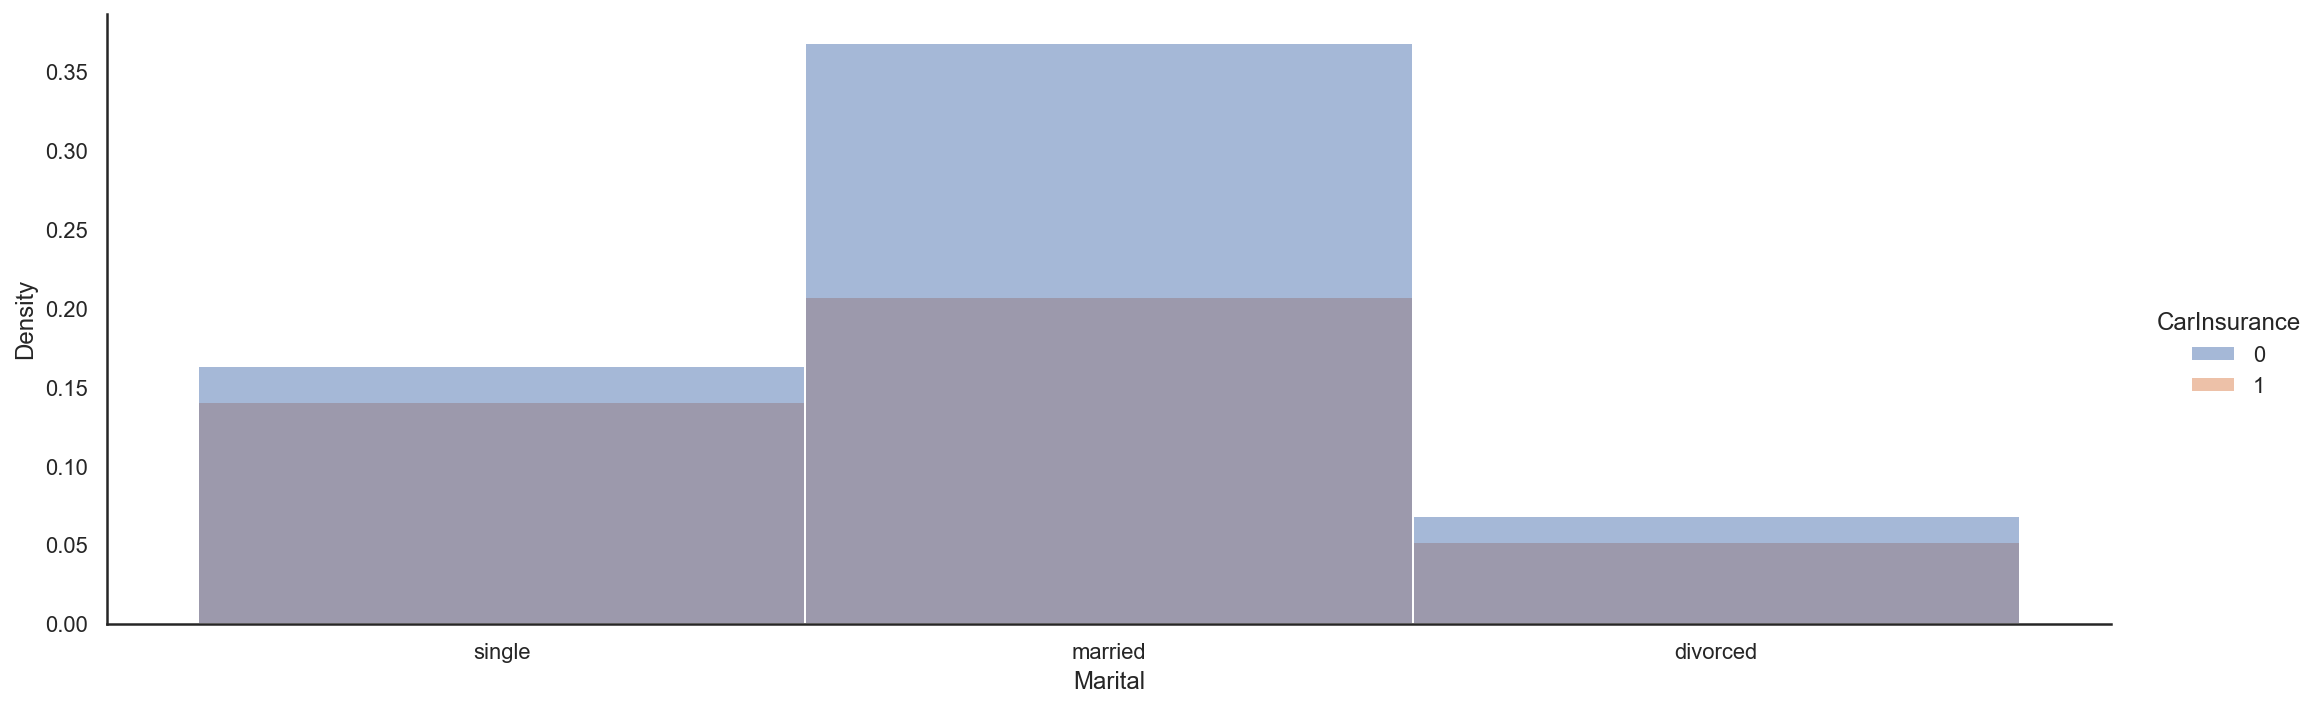

In [28]:
# 3. 결혼 Marital에 대한 계약 성사 여부 Marital CarInsurance
# 그래프 그려보기
# x축 : Marital, y축 : count, 분류 : CarInsurance
with sns.axes_style('white'):
    sns.displot(train, x="Marital", hue="CarInsurance", stat="density", height = 5, aspect = 3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


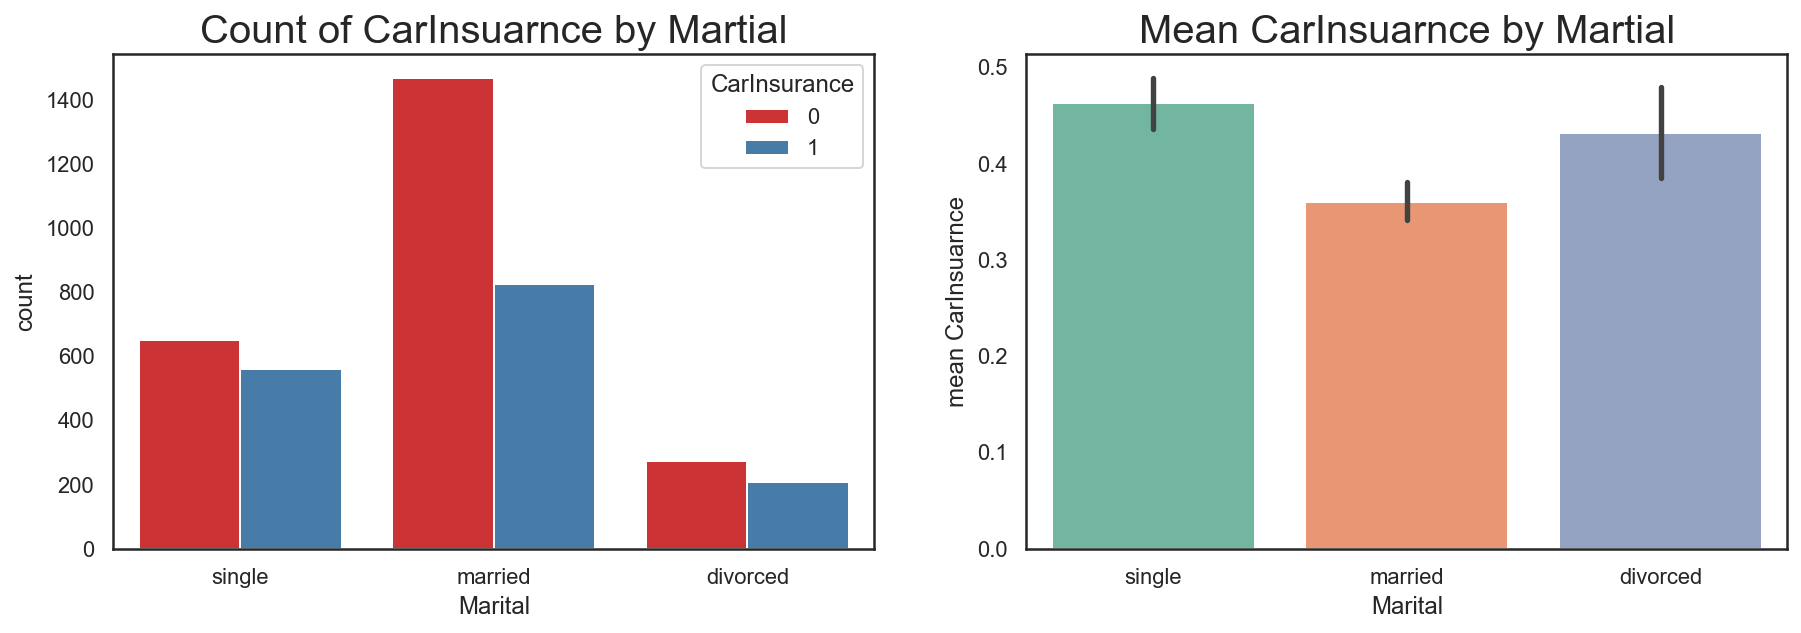

In [29]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'Marital', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by Martial", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('Marital','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by Martial", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

## Education Exploration

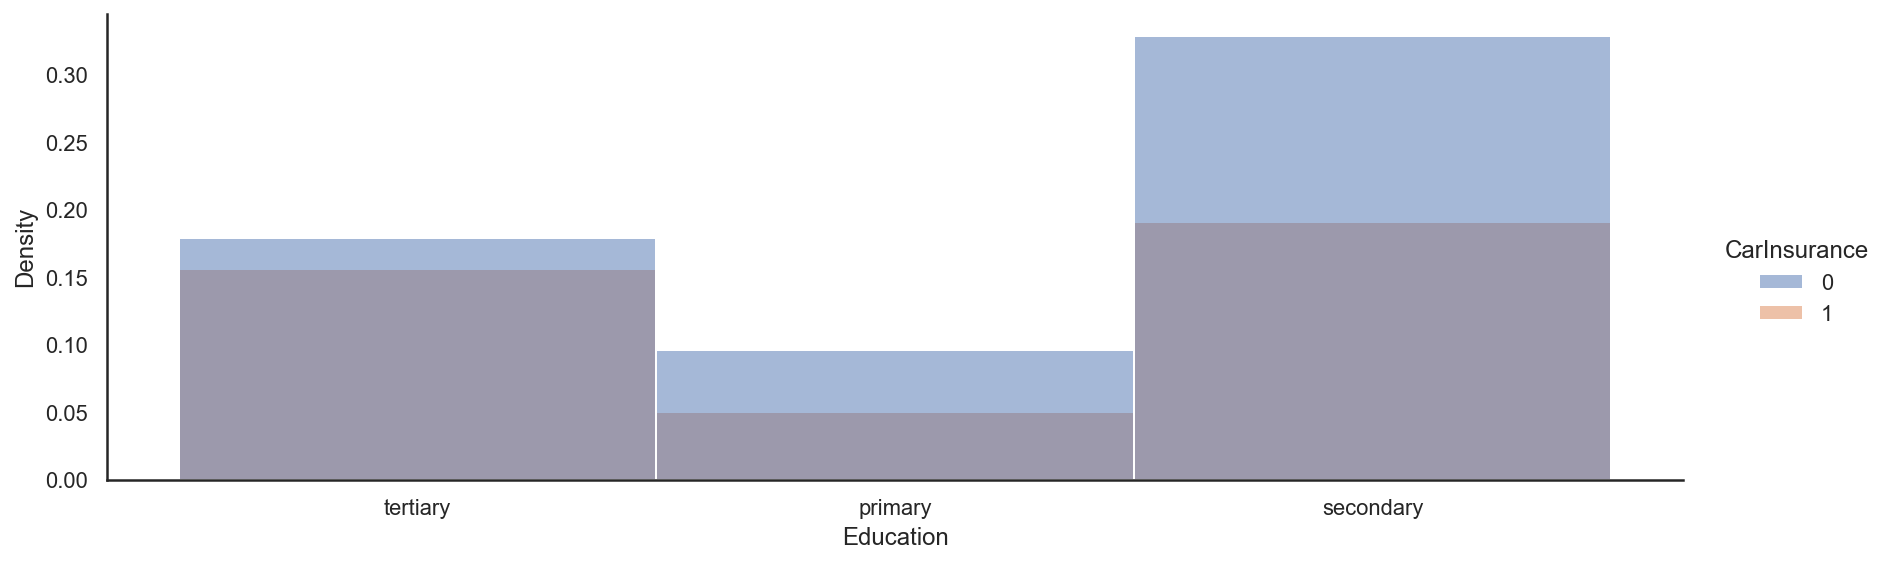

In [30]:
# 4. Education
with sns.axes_style('white'):
    sns.displot(train, x="Education", hue="CarInsurance", stat="density", height = 4, aspect = 3)

In [31]:
# Default와 CarInsurance의 집계
# crossTab을 요약합니다.
pd.crosstab(train.Education, train.CarInsurance, margins=True, normalize=True)

CarInsurance         0         1       All
Education                                 
primary       0.095625  0.050301  0.145926
secondary     0.328530  0.190988  0.519518
tertiary      0.178674  0.155882  0.334556
All           0.602829  0.397171  1.000000

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


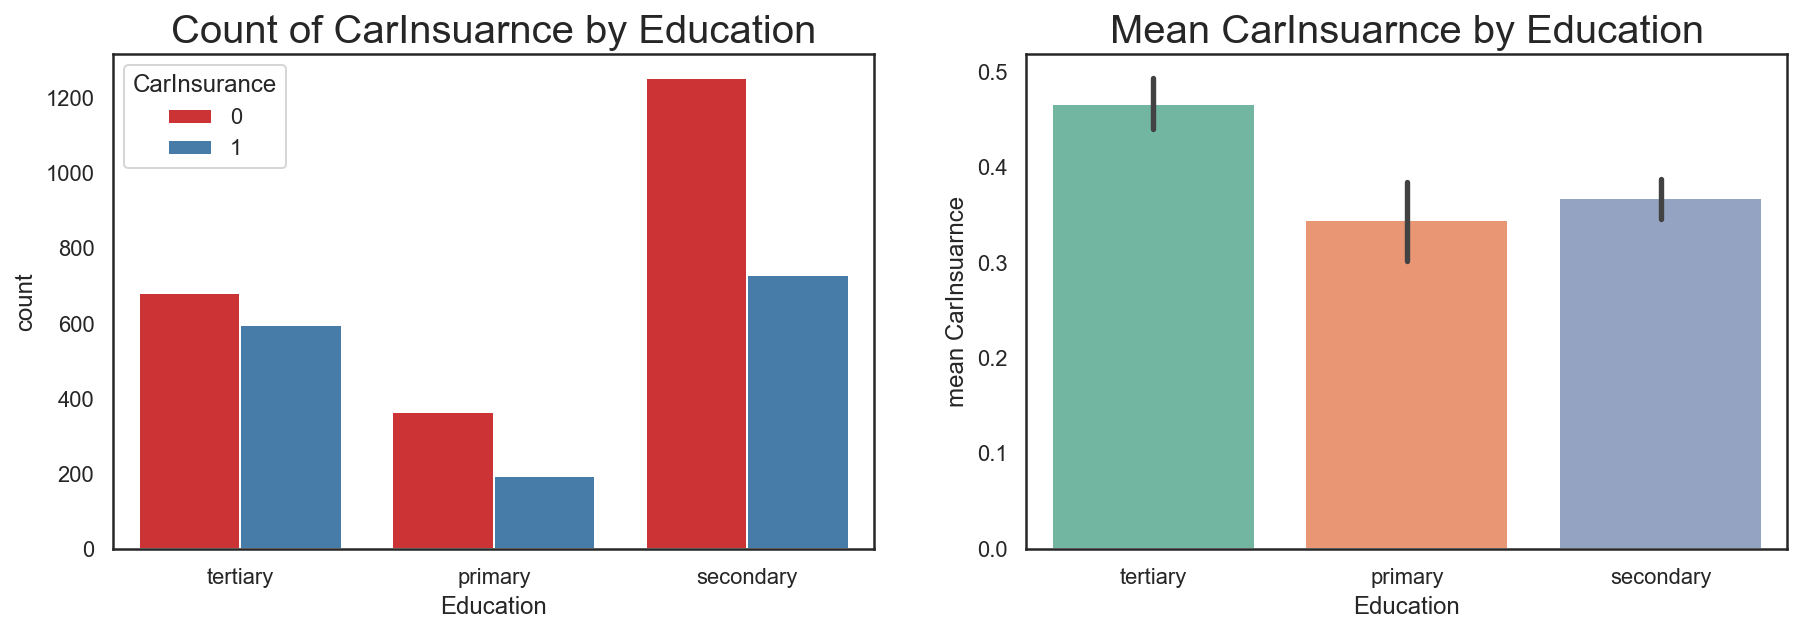

In [32]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'Education', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by Education", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('Education','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by Education", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

## Default Exploration

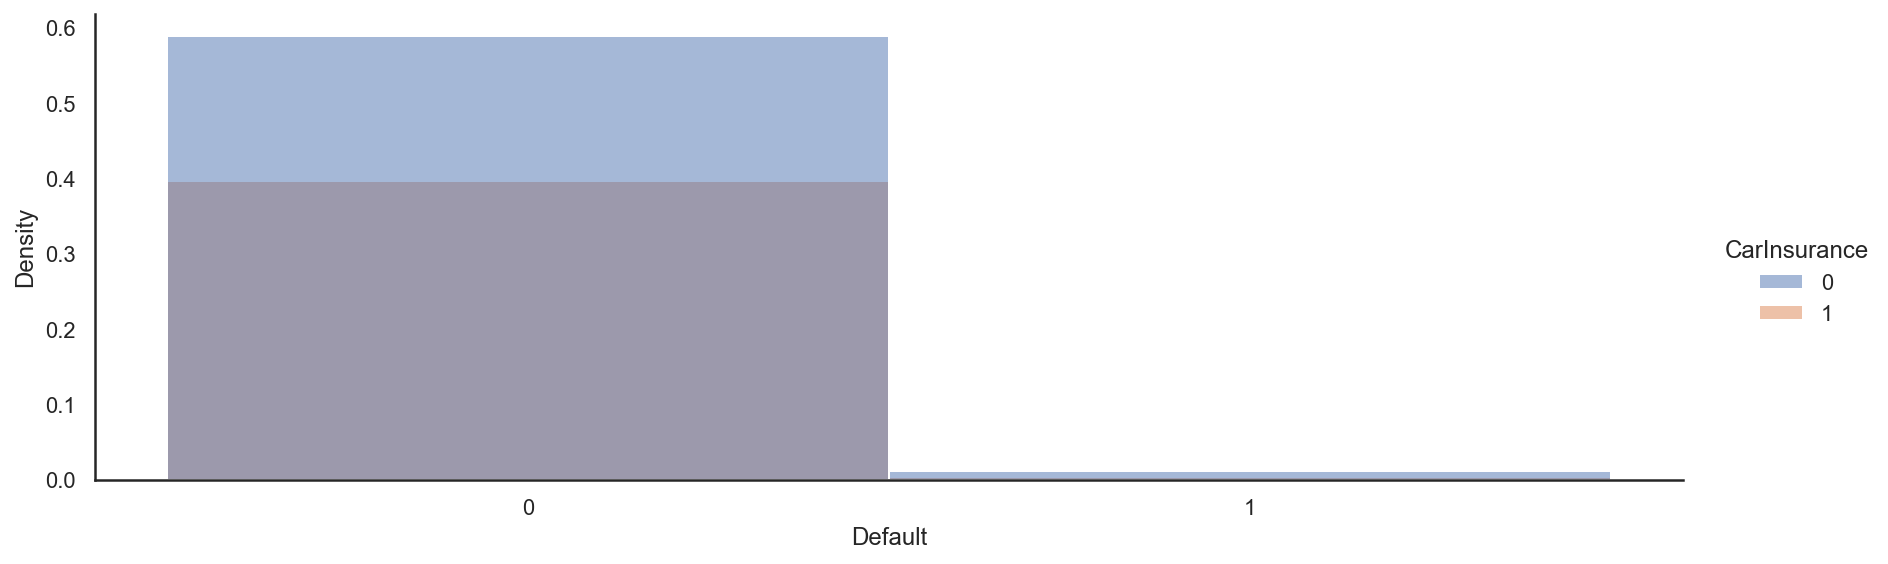

In [33]:
# 5. Default
# 타입을 object로 변환
train.Default = train.Default.astype('str')

train.Default.astype
with sns.axes_style('white'):
    sns.displot(train, x="Default", hue="CarInsurance", stat="density", height = 4, aspect = 3)
    
# 타입을 다시 int로 변환
train.Default = train.Default.astype('int')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


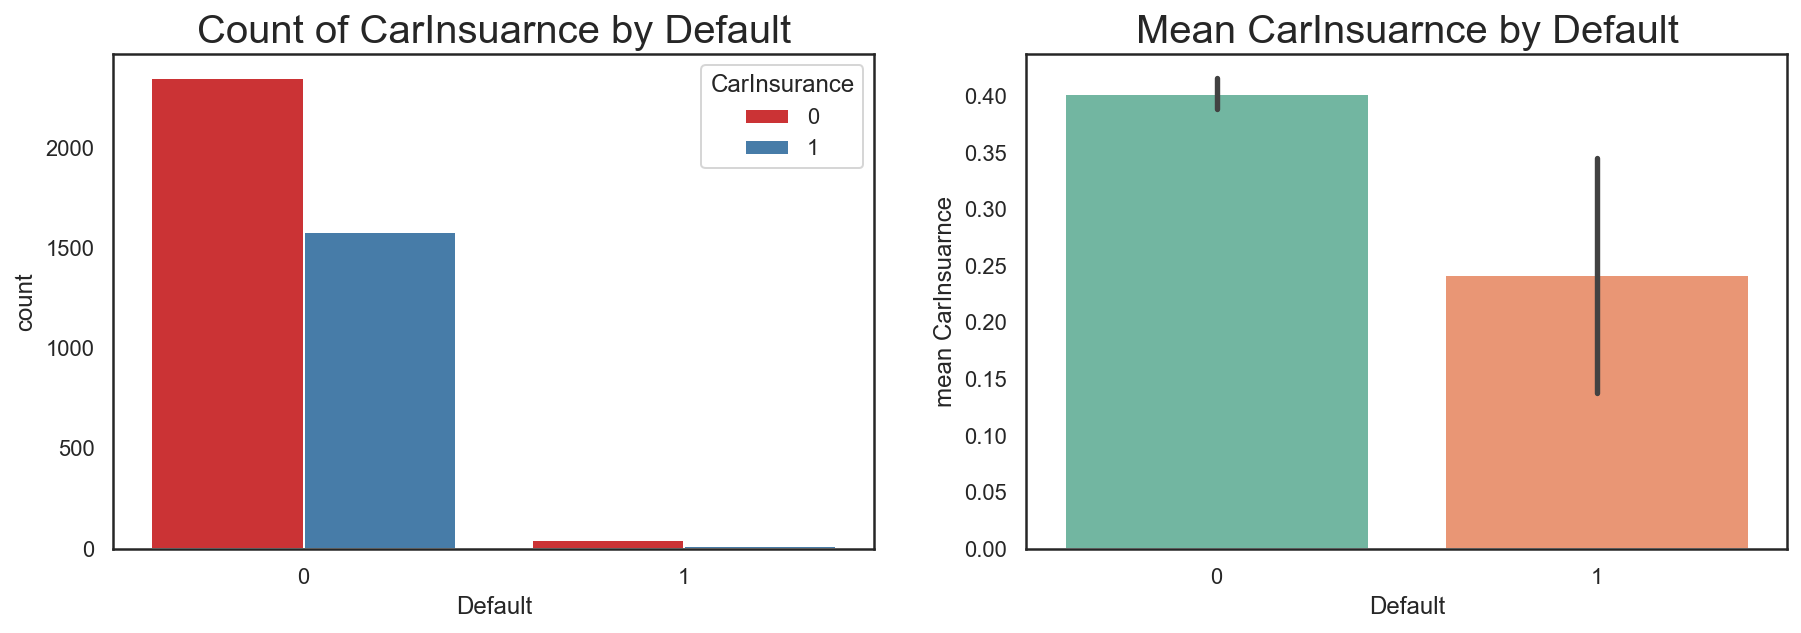

In [34]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'Default', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by Default", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('Default','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by Default", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

In [35]:
# 결론 : Default가 없을 수록(파산 하지 않는 경우) 보험 승낙의 경우가 많다.

## Balance Exploration

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


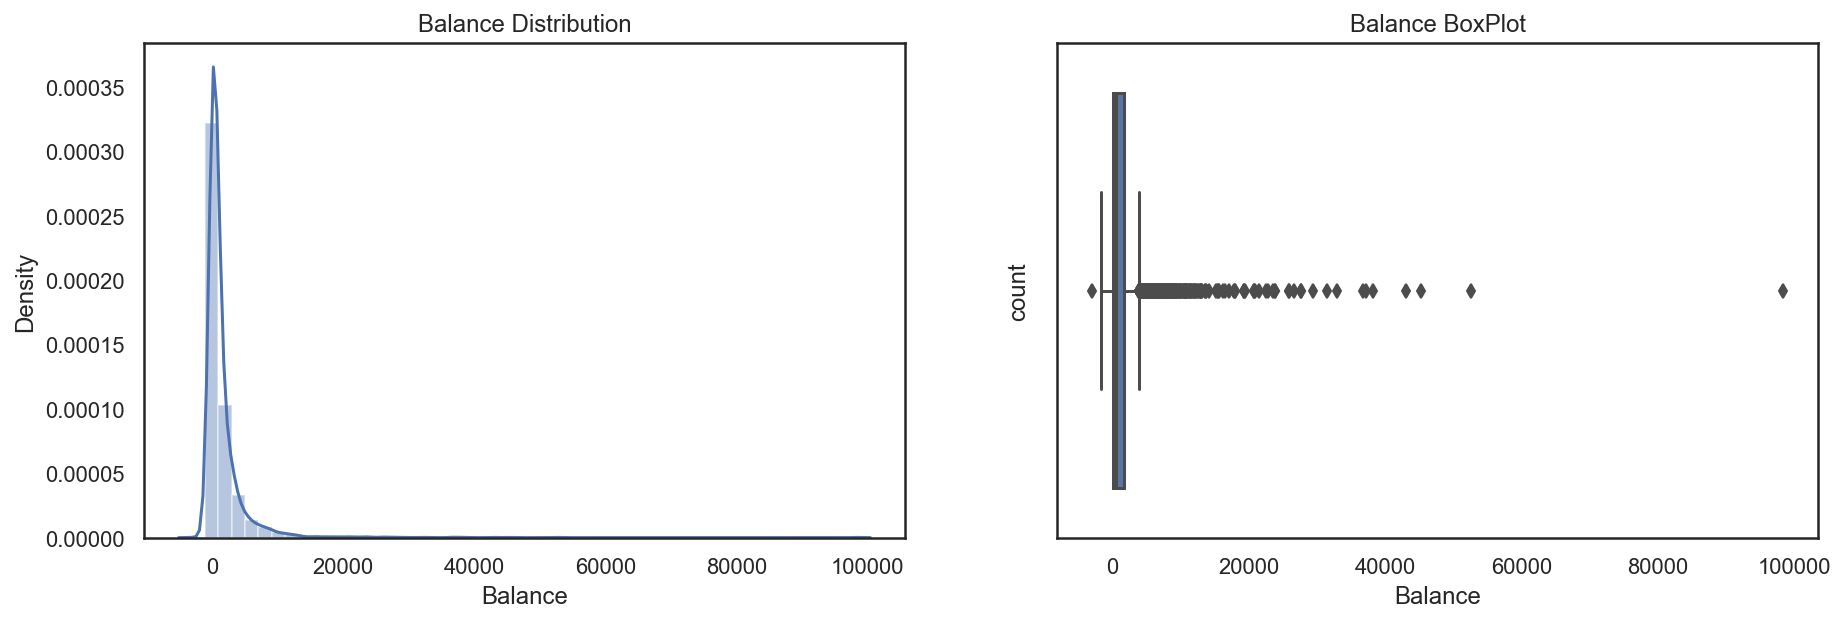

In [36]:
# 개별 데이터 분포 그려보기
# 6. Balance

# Balance에 log를 취하면? 일단 음수 값이 혹시 있는지 확인

plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['Balance'])
    plt.title('Balance Distribution')
    
    
    plt.subplot(2,2,2)    
    # 1. Age Boxplot 그리기
    sns.boxplot(train['Balance'])
    plt.ylabel('count')
    plt.title('Balance BoxPlot')

In [37]:
train['Balance'].describe()

count     3982.000000
mean      1532.749121
std       3516.608116
min      -3058.000000
25%        109.250000
50%        550.500000
75%       1615.250000
max      98417.000000
Name: Balance, dtype: float64

In [38]:
# 평균 잔고가 음수일 수가 있나...
# 음수인 경우 일단 제외 하려고 했으나 마이너스 통장 계좌
# train_bal_neg = train[train['Balance'] < 0]

In [39]:
# idx_Balance_neg = train_bal_neg.index

In [40]:
# 이상치
# len(idx_Balance_neg)

In [41]:
# train.drop(idx_Balance_neg, inplace=True)

In [42]:
# Balance와 CarInsurance의 관계가 있나?
# 차이 없음
train.groupby('CarInsurance')['Balance'].agg(**{'mean_Balance':'mean'}).reset_index()

CarInsurance  mean_Balance
0             0   1413.966946
1             1   1711.071608

In [43]:
# Balance에 대한 극단값 제거
# Check outliers
# From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.
idx = train[train['Balance']>80000].index
train = train.drop(idx)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


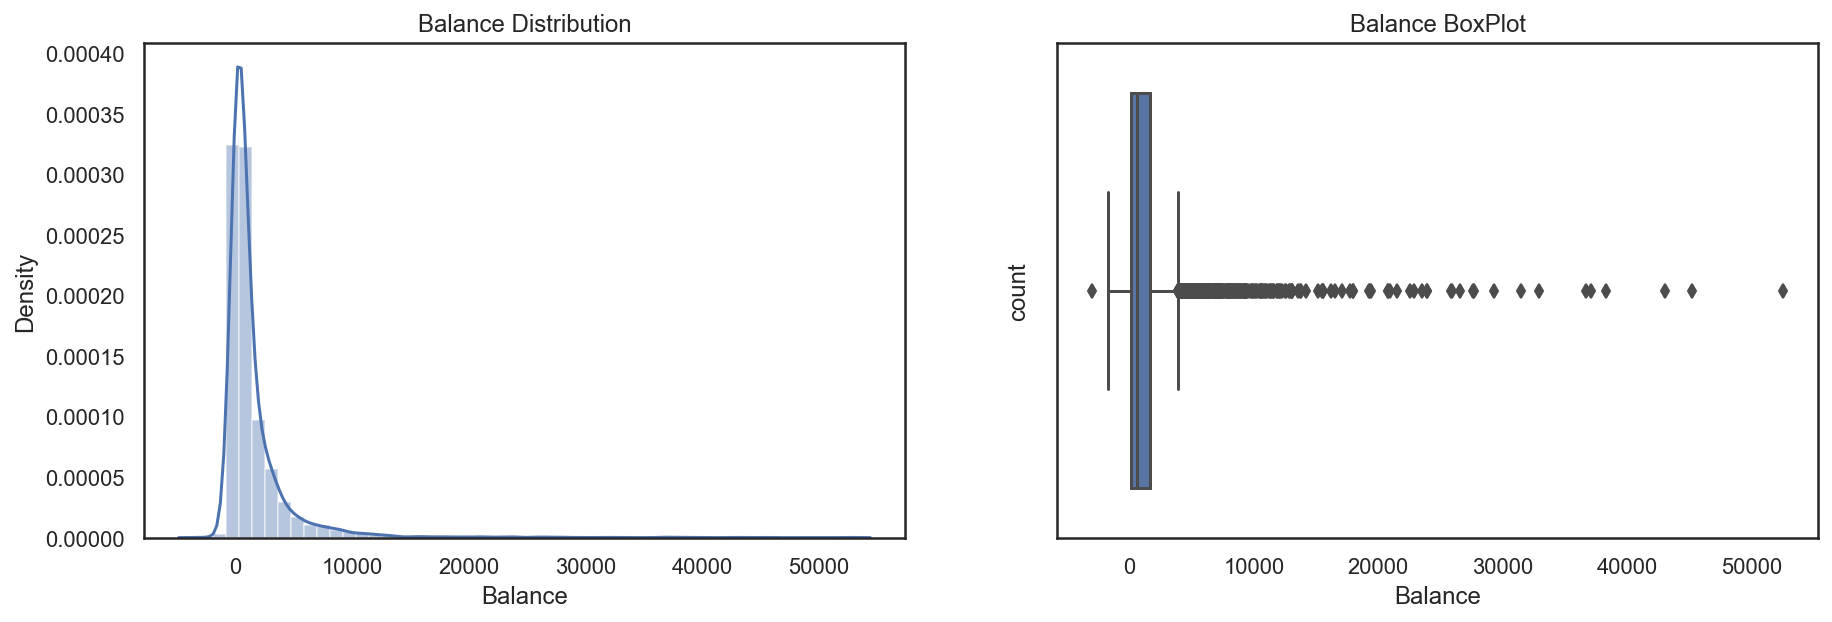

In [44]:
plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['Balance'])
    plt.title('Balance Distribution')
    
    
    plt.subplot(2,2,2)    
    # 1. Age Boxplot 그리기
    sns.boxplot(train['Balance'])
    plt.ylabel('count')
    plt.title('Balance BoxPlot')

<Figure size 1440x720 with 0 Axes>

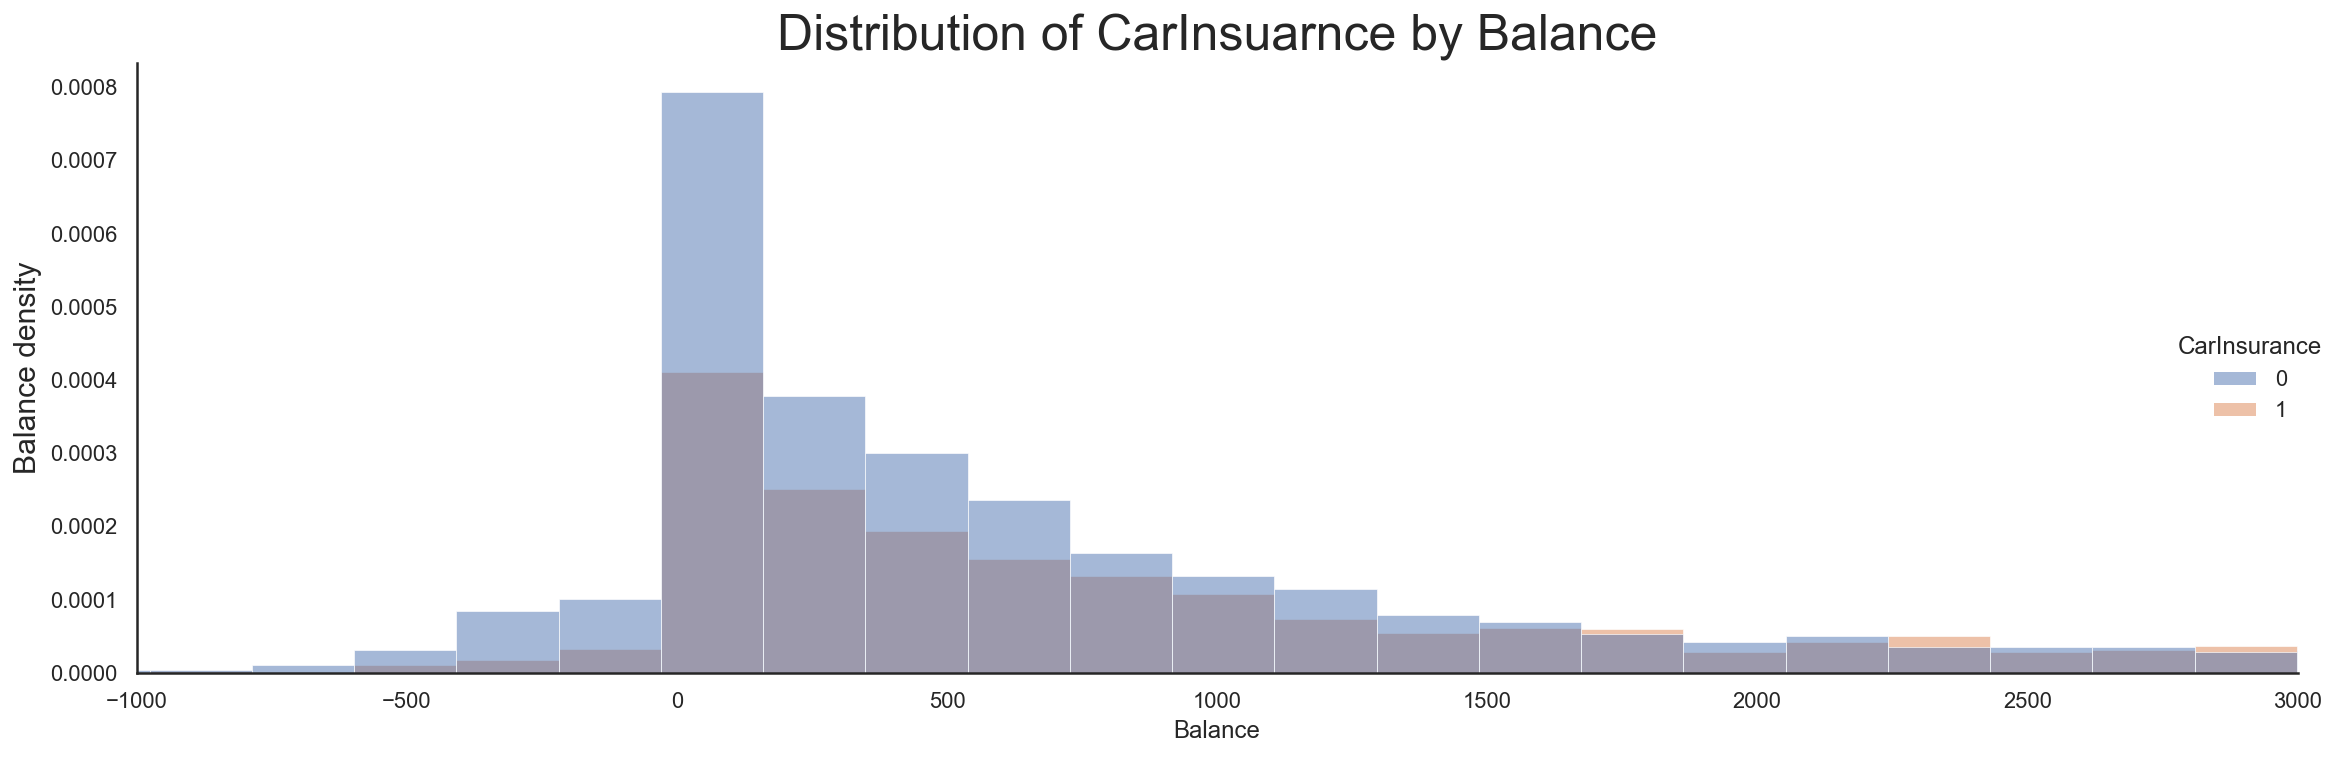

In [45]:
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    facet = sns.displot(train, x="Balance", hue="CarInsurance", stat="density", height = 5, aspect = 3)
    facet.set(xlim=(-1000,3000))
    facet.add_legend()
    plt.title("Distribution of CarInsuarnce by Balance", fontsize = 25)
    plt.ylabel('Balance density', size = 15)

In [46]:
# 결론 : Balance의 부호에 관계없이 보험 계약 승낙은 어렵다.

## HHInsurance Exploration

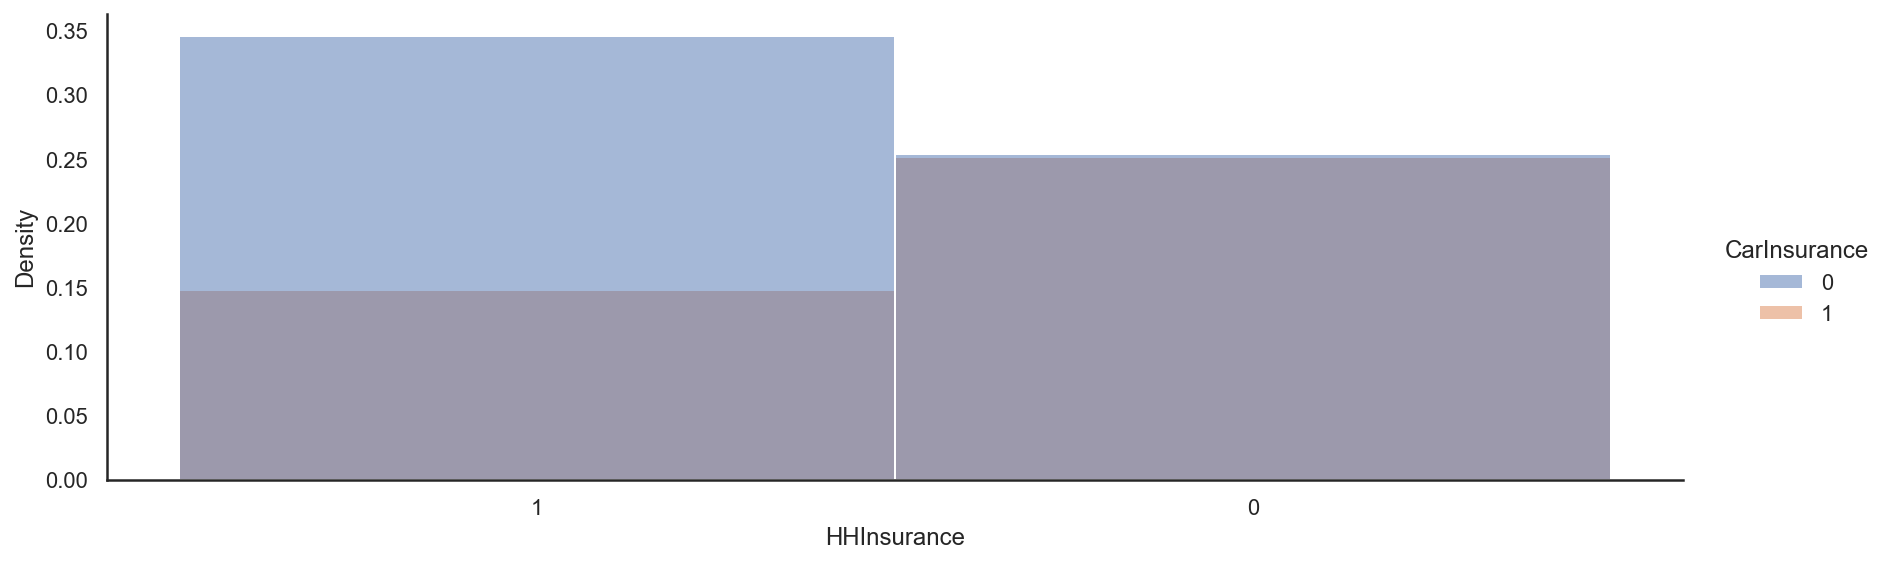

In [47]:
# 7. HHInsurance
train.HHInsurance = train.HHInsurance.astype('str')
with sns.axes_style('white'):
    # sns.countplot(x = 'HHInsurance', hue = 'CarInsurance', data = train)
    sns.displot(train, x="HHInsurance", hue="CarInsurance", stat="density", height = 4, aspect = 3)
train.HHInsurance = train.HHInsurance.astype('int')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


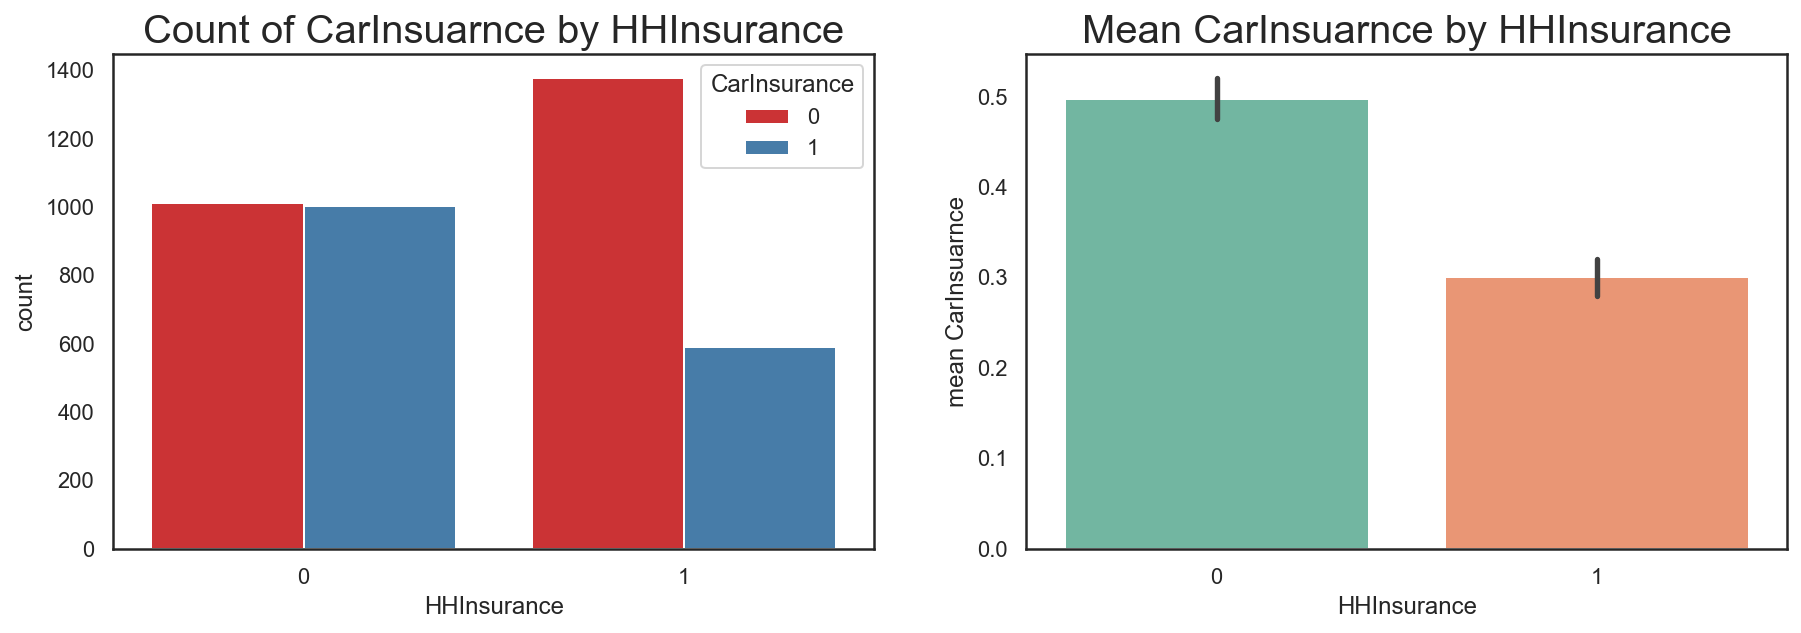

In [48]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'HHInsurance', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by HHInsurance", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('HHInsurance','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by HHInsurance", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

In [49]:
# 결론 : HHInsurance가 없을 수록 보험 승낙을 하는 경우가 많다.

## CarLoan Exploration

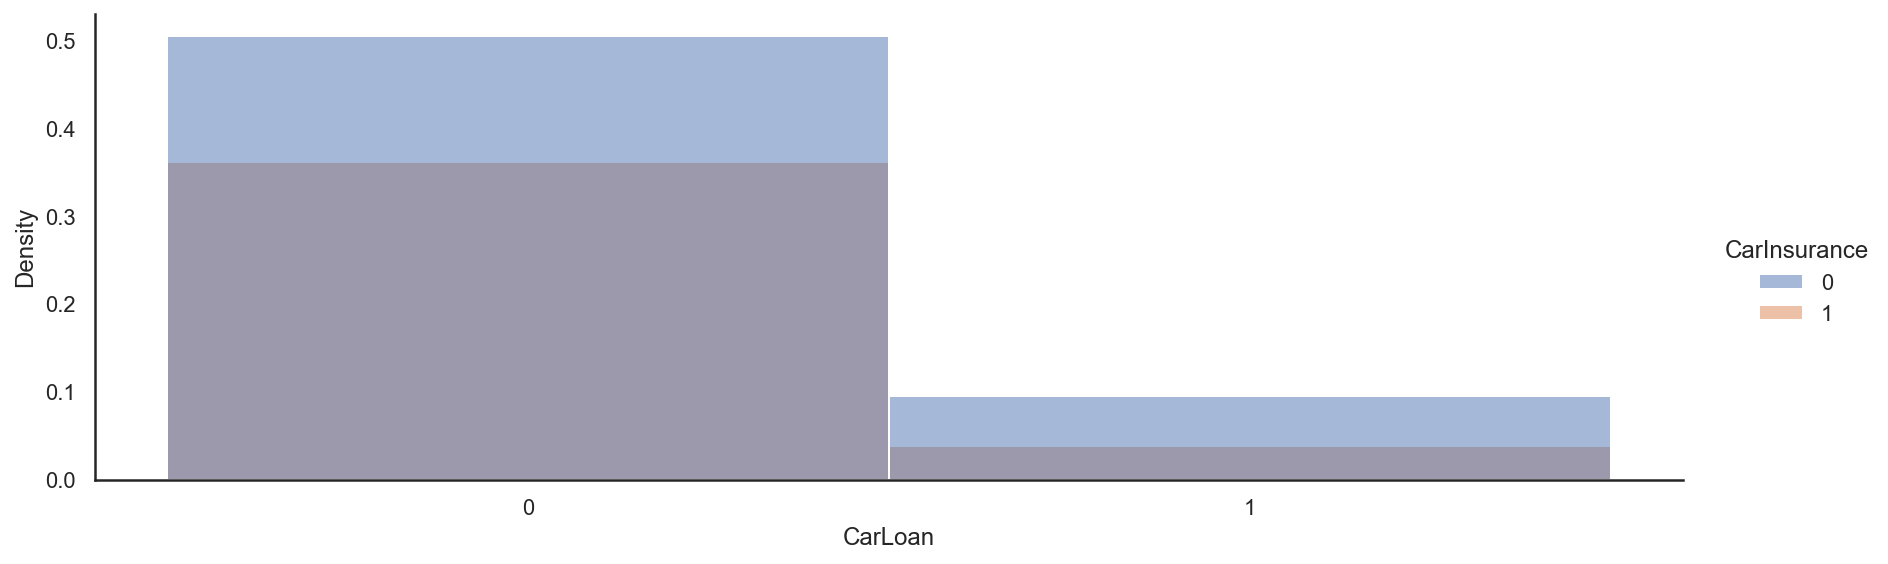

In [50]:
# 8. CarLoan
train.CarLoan = train.CarLoan.astype('str')
with sns.axes_style('white'):
    # sns.countplot(x = 'CarLoan', hue = 'CarInsurance', data = train)
    sns.displot(train, x="CarLoan", hue="CarInsurance", stat="density", height = 4, aspect = 3)
train.CarLoan = train.CarLoan.astype('int')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


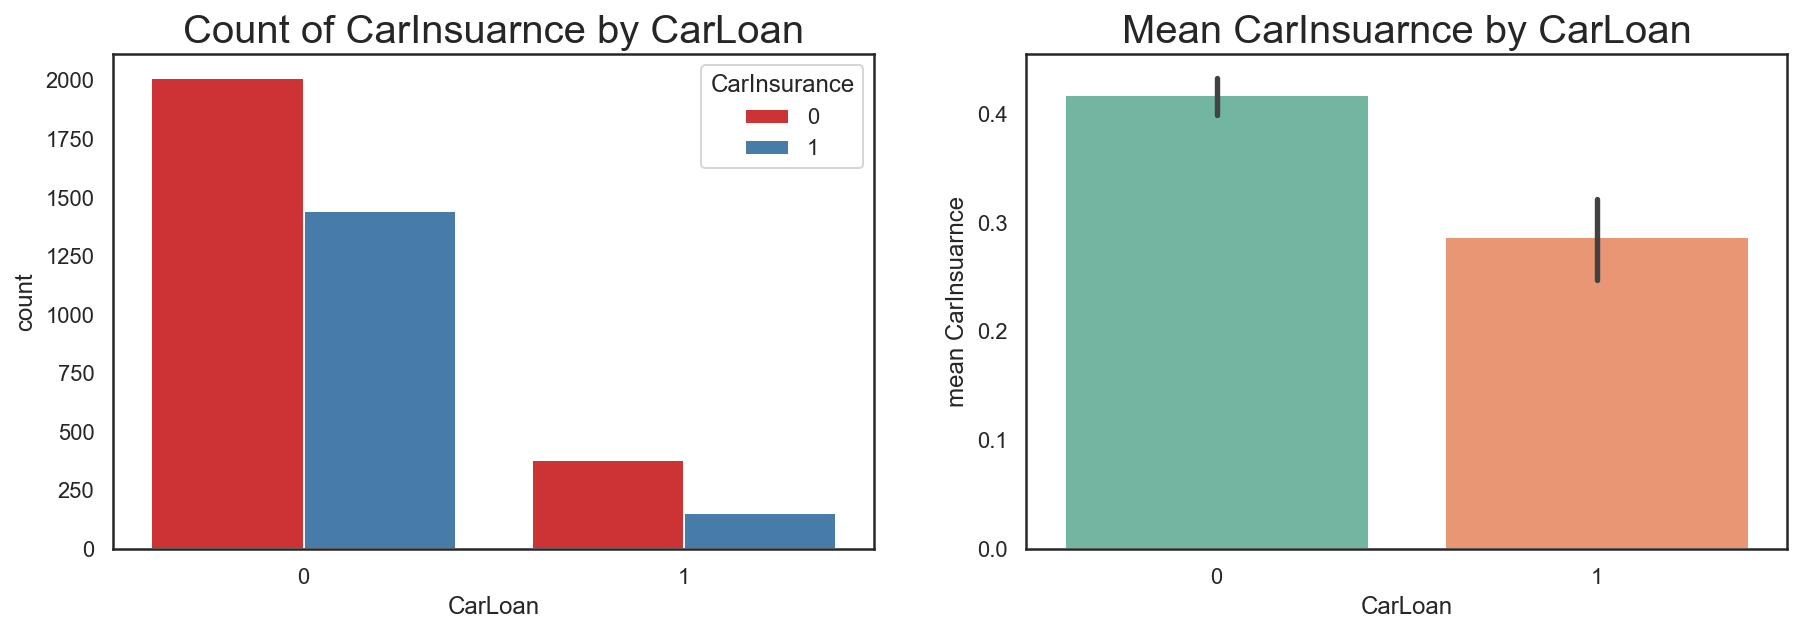

In [51]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'CarLoan', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by CarLoan", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('CarLoan','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by CarLoan", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')    

In [52]:
# 결론 : Carloan이 없을 수록 보험 승낙을 하는 경우가 많다.

## Communication Exploration

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


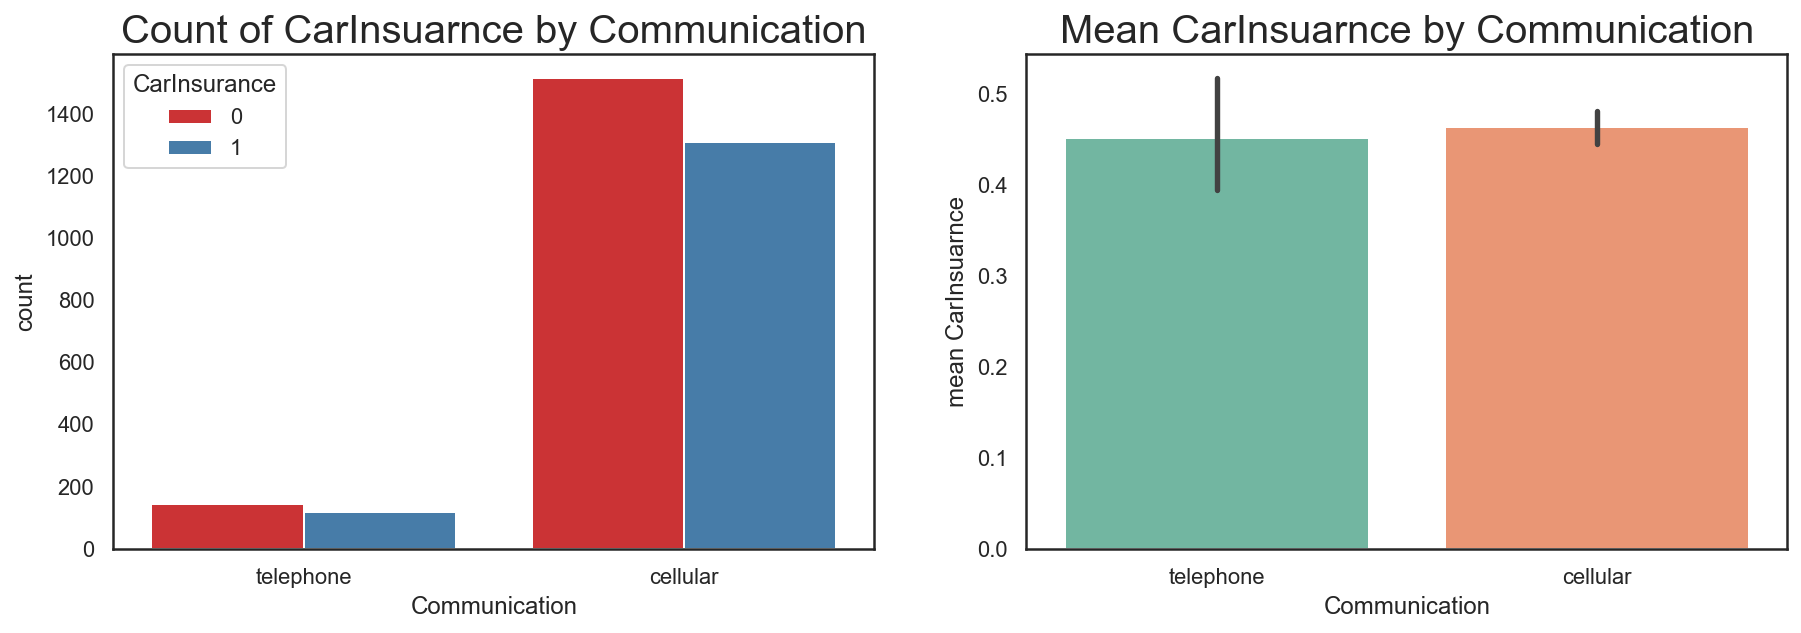

In [53]:
# 9. Communication
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'Communication', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by Communication", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('Communication','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by Communication", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

## LastContactMonth Exploration

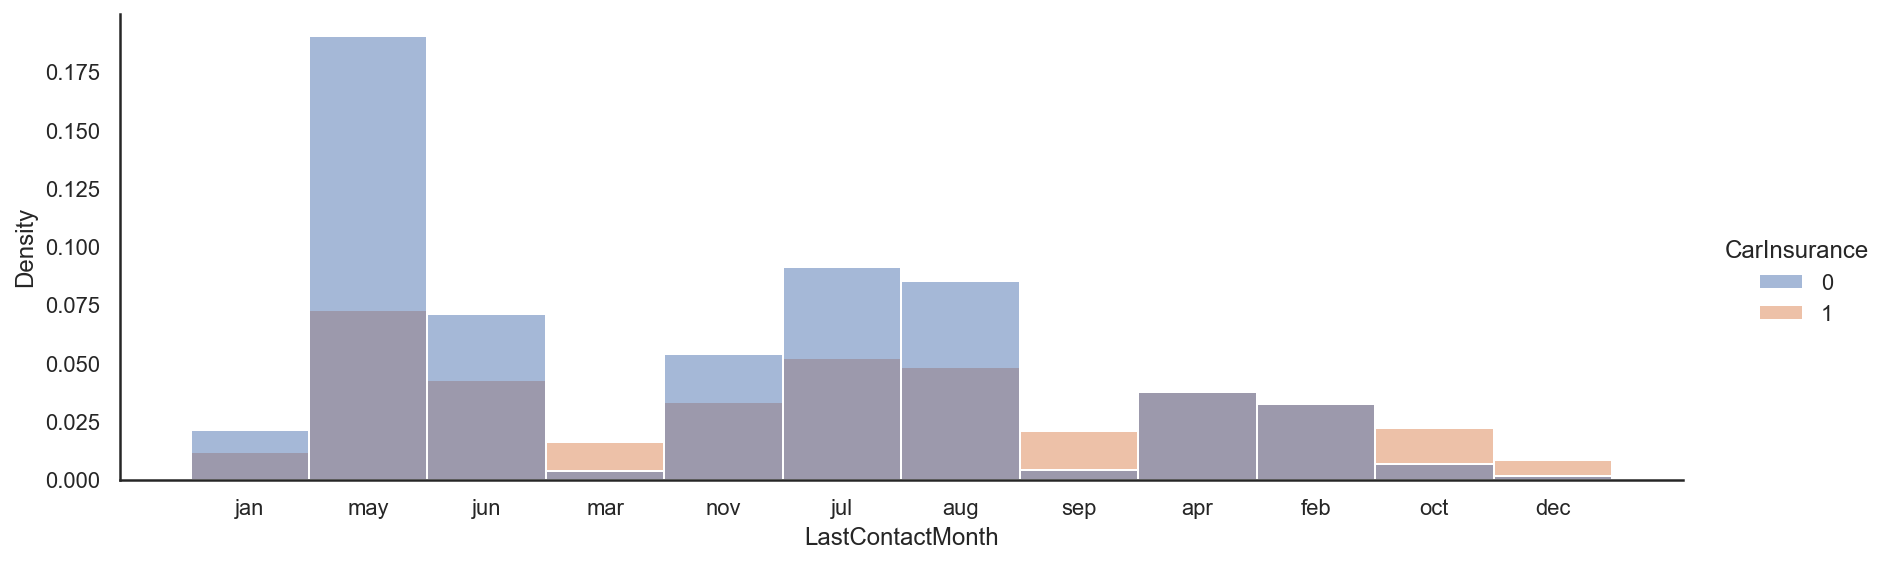

In [54]:
# 10. LastContactMonth
with sns.axes_style('white'):
    # sns.countplot(x = 'LastContactMonth', hue = 'CarInsurance', data = train)
    sns.displot(train, x="LastContactMonth", hue="CarInsurance", stat="density", height = 4, aspect = 3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


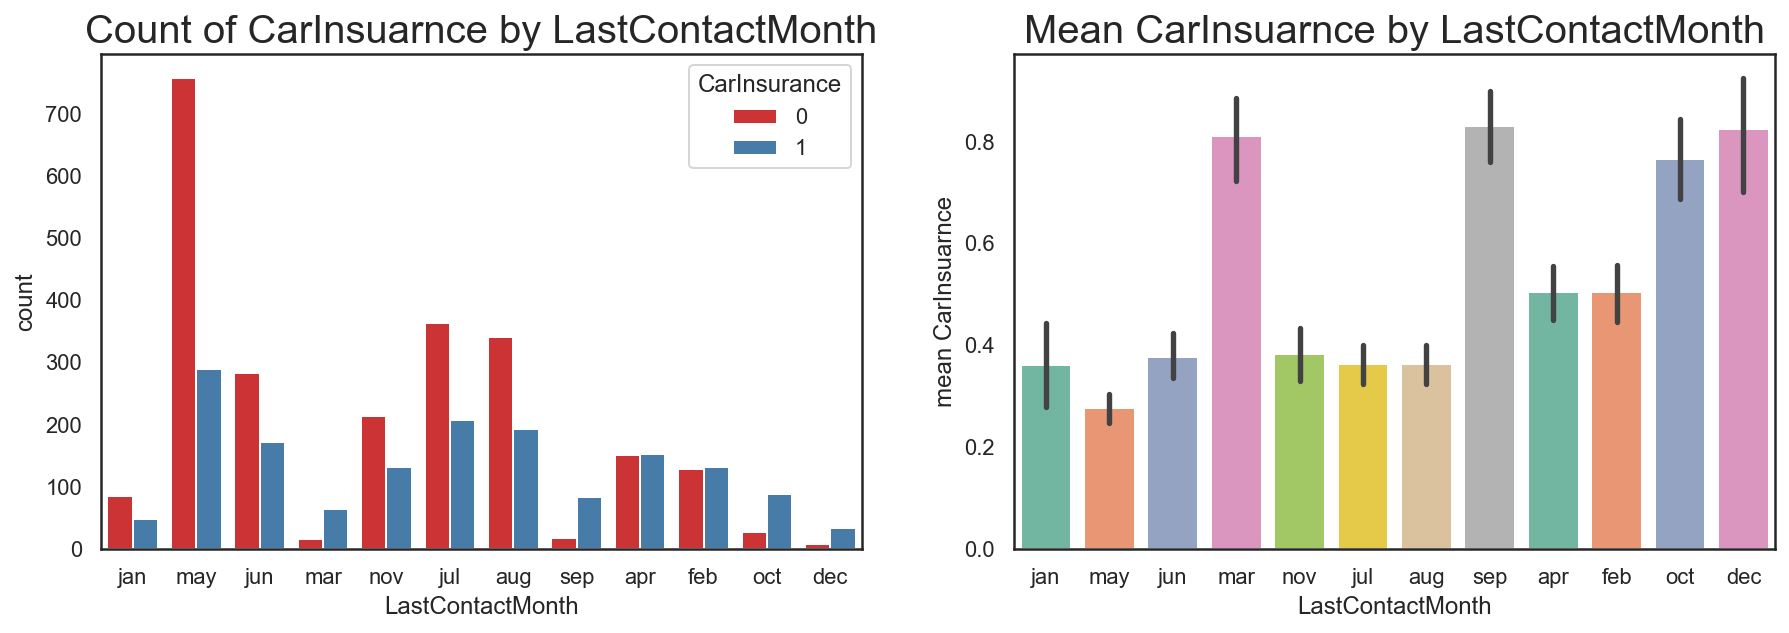

In [55]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'LastContactMonth', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by LastContactMonth", fontsize = 20)    
    
    plt.subplot(2,2,2)
    sns.barplot('LastContactMonth','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by LastContactMonth", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

In [56]:
# 상대적으로 mar, sep, oct, dec에서 보험 승낙 경우가 많다.
# 분기로 합칠 수도 있을 듯

## LastContactDay Exploration

<Figure size 1080x432 with 0 Axes>

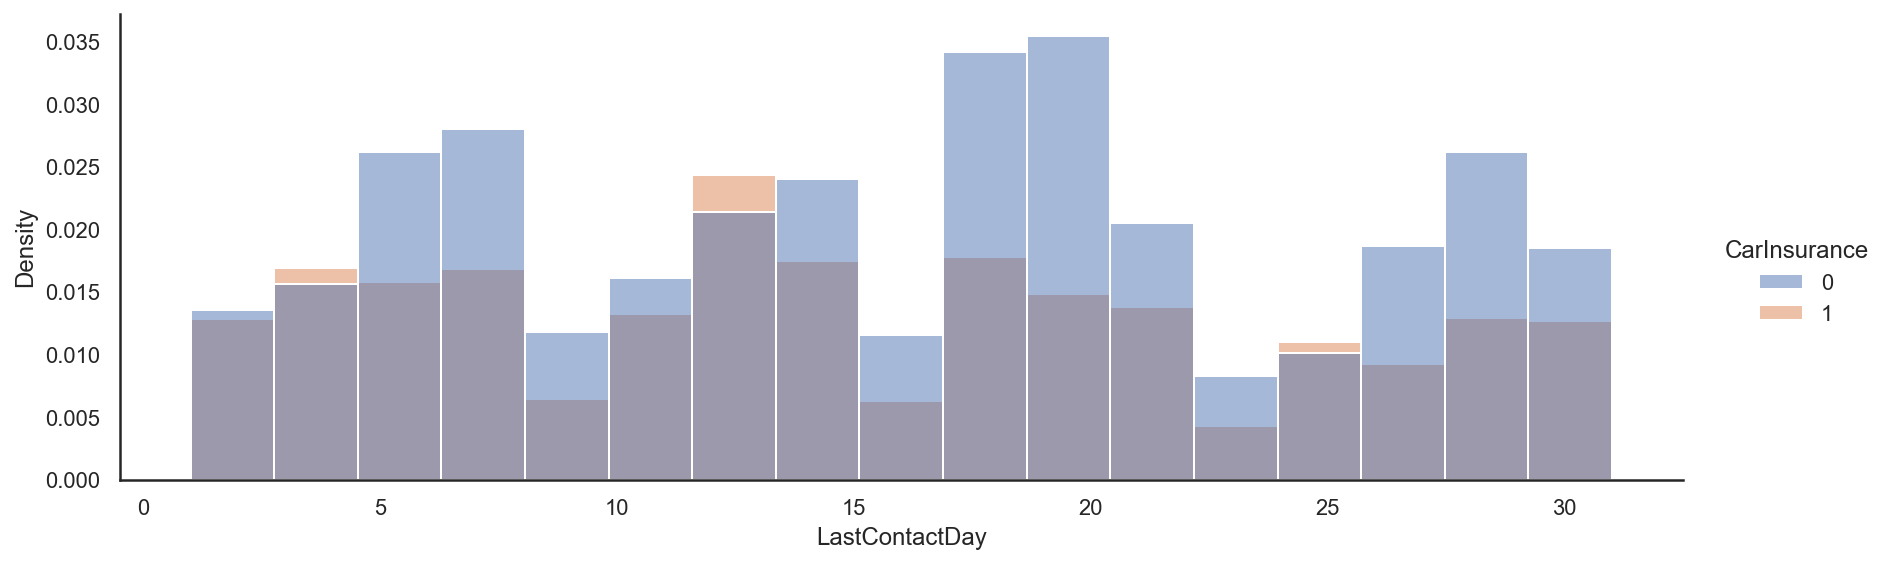

In [57]:
# LastContactDay
with sns.axes_style('white'):
    plt.figure(figsize=(15,6))
    sns.displot(train, x="LastContactDay", hue="CarInsurance", stat="density", height = 4, aspect = 3)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


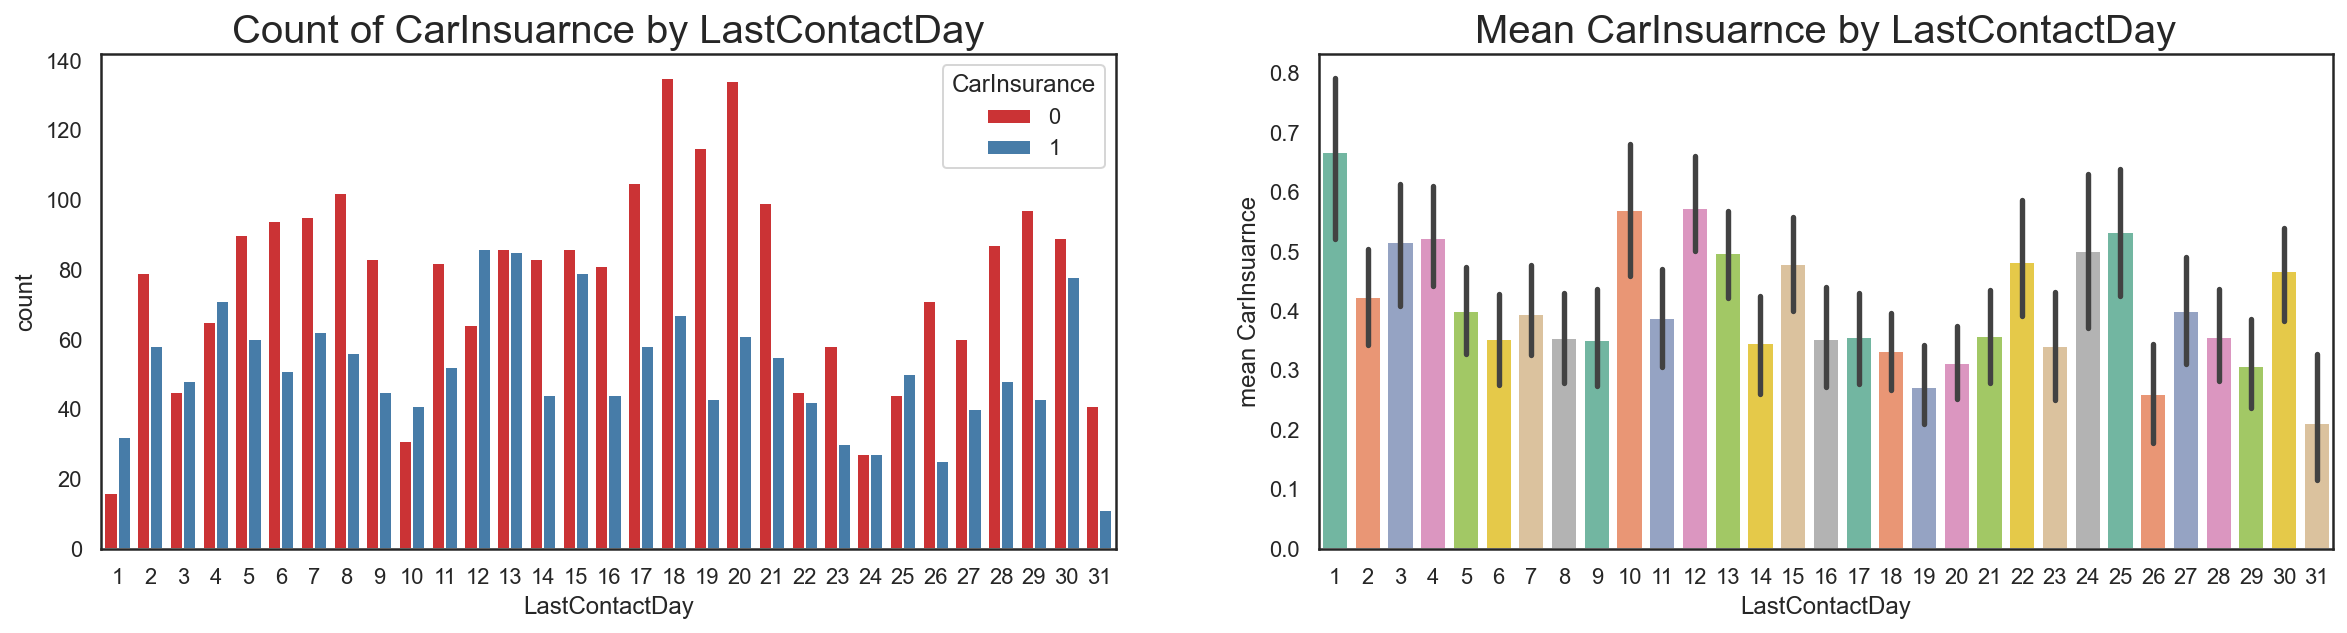

In [58]:
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'LastContactDay', hue = 'CarInsurance', data = train, palette='Set1')
    plt.title("Count of CarInsuarnce by LastContactDay", fontsize = 20)    
    
    plt.subplot(2,2,2)
    sns.barplot('LastContactDay','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by LastContactDay", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')    

In [59]:
# 필요없는 변수라고 생각 - 별 차이가 없음, 초, 중, 말로 그룹화 해볼것

## Call_start - Call_end Exploration

In [60]:
# Call_start ~ Call_end 사이의 시간 간격 구하기 (초)

In [61]:
train[['CallStart','CallEnd']]=train[['CallStart','CallEnd']].astype('datetime64[ns]')

In [62]:
train['Call_Duration']=train['CallEnd']-train['CallStart']
train['Call_Duration']=train['Call_Duration'].dt.components['minutes']*60 + train['Call_Duration'].dt.components['seconds']
train['Call_Duration'].head()

0     70
1    185
2    340
3    819
4    192
Name: Call_Duration, dtype: int64

In [63]:
train.Call_Duration = train.Call_Duration/60
# 단위를 분으로 변경

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


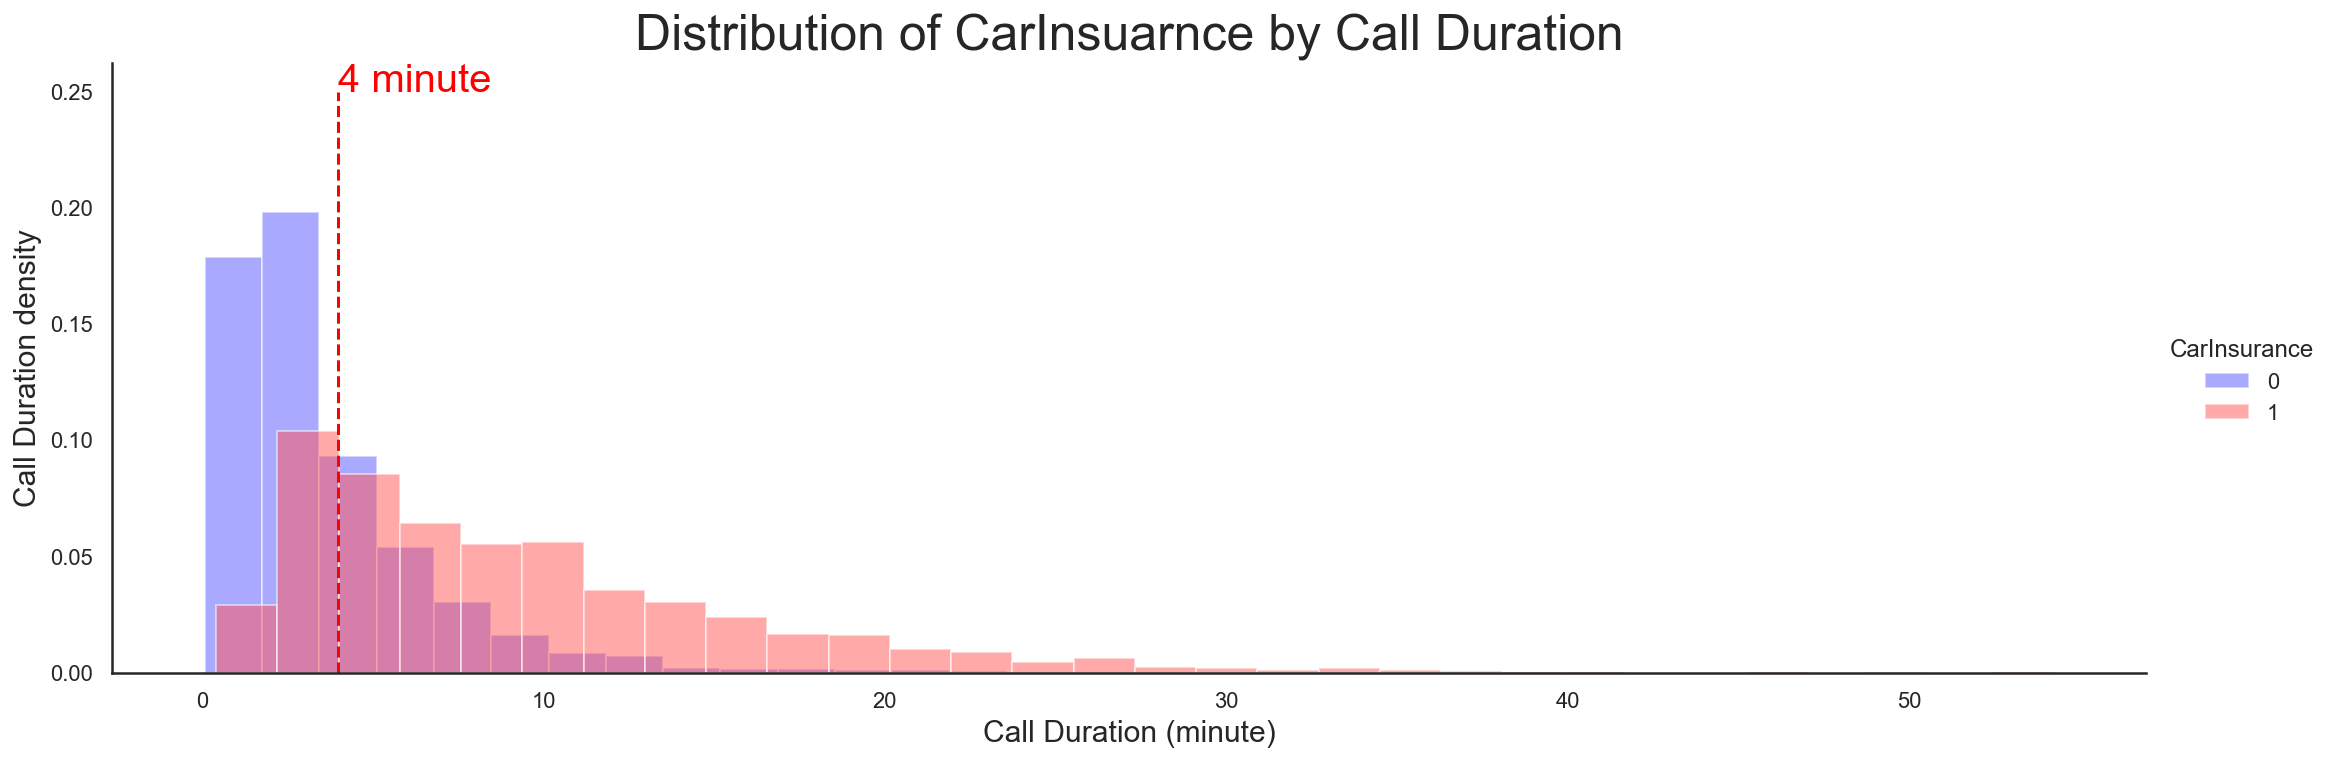

In [64]:
with sns.axes_style('white'):
    facet = sns.FacetGrid(train, hue='CarInsurance',size=5,aspect=3,palette='seismic')
    facet.map(plt.hist,'Call_Duration',bins=30,alpha=0.5, density = True)
    facet.add_legend()
    plt.title("Distribution of CarInsuarnce by Call Duration", fontsize = 25)
    plt.ylabel('Call Duration density', size = 15)
    plt.xlabel('Call Duration (minute)', size = 15)
    plt.vlines(4, 0, 0.25, color = 'red', linestyle = '--')
    plt.text(4, 0.25,'4 minute', fontdict = {'fontsize' : 20}, color = 'red')

In [65]:
# 통화 시작 시간
train['Call_StartHour'] = train['CallStart'].dt.hour

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


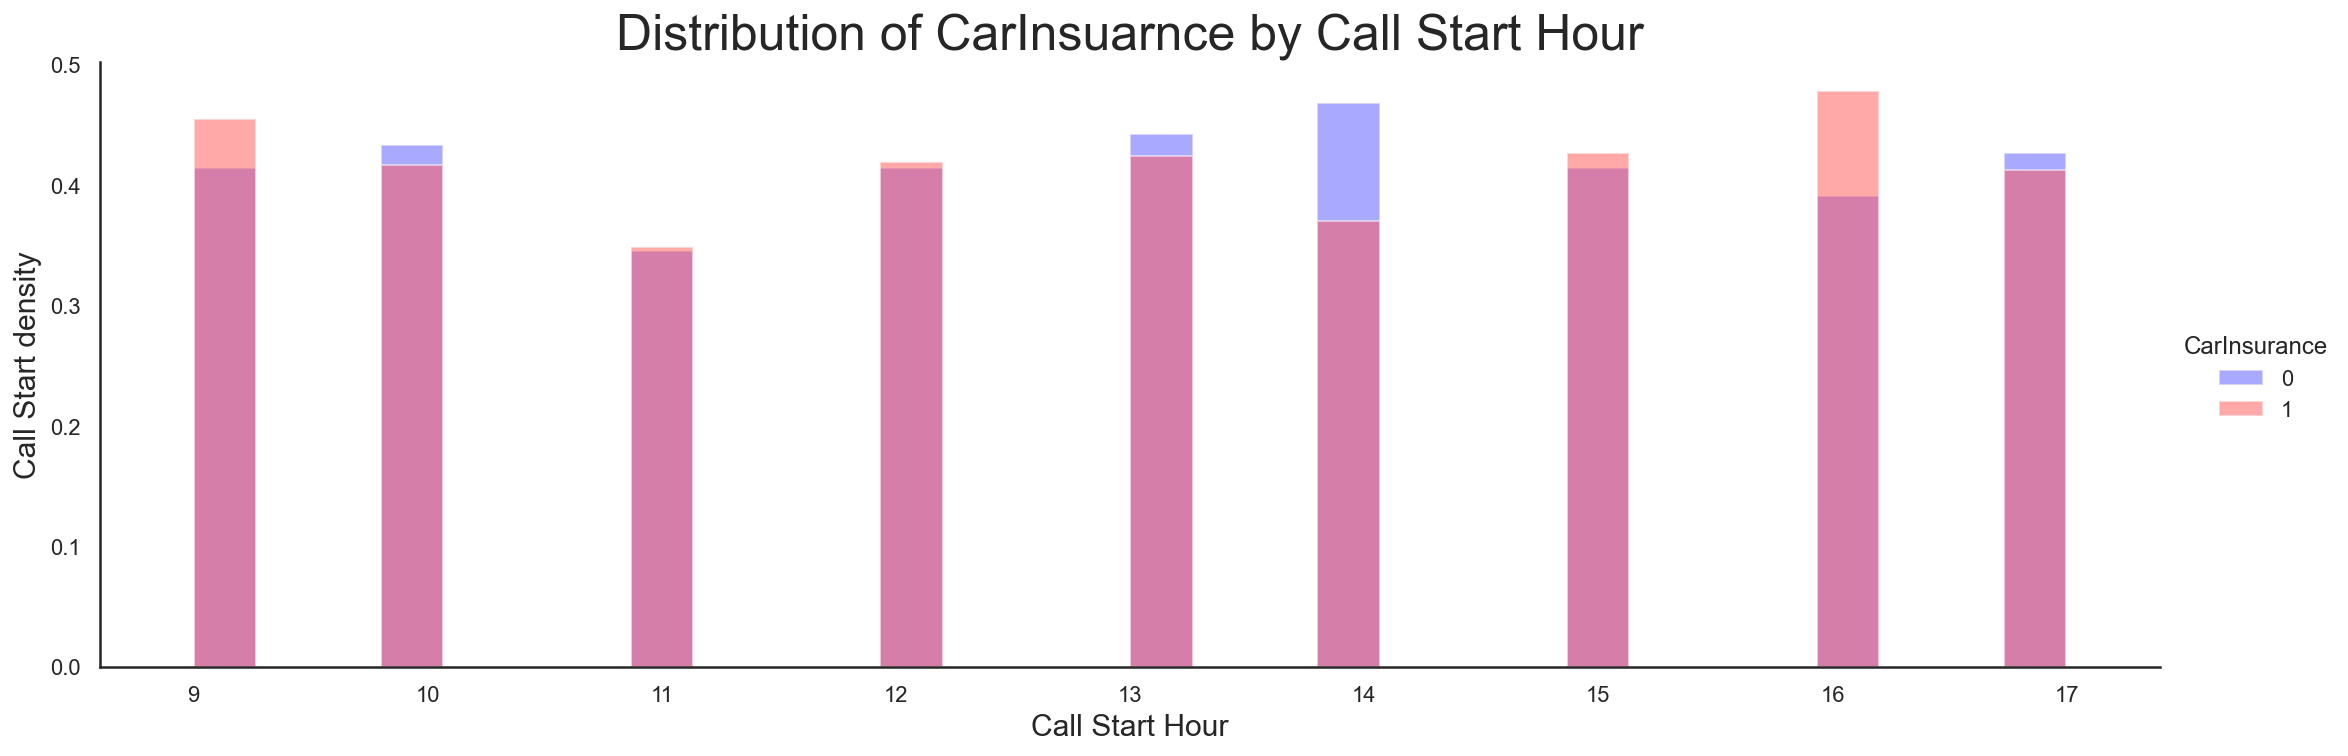

In [66]:
with sns.axes_style('white'):
    facet = sns.FacetGrid(train, hue='CarInsurance',size=5,aspect=3,palette='seismic')
    facet.map(plt.hist,'Call_StartHour',bins=30,alpha=0.5, density = True)
    facet.add_legend()
    plt.title("Distribution of CarInsuarnce by Call Start Hour", fontsize = 25)
    plt.ylabel('Call Start density', size = 15)
    plt.xlabel('Call Start Hour', size = 15)

In [67]:
# 통화시작 시간과 보험계약 승낙간의 관계는 없어보임

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


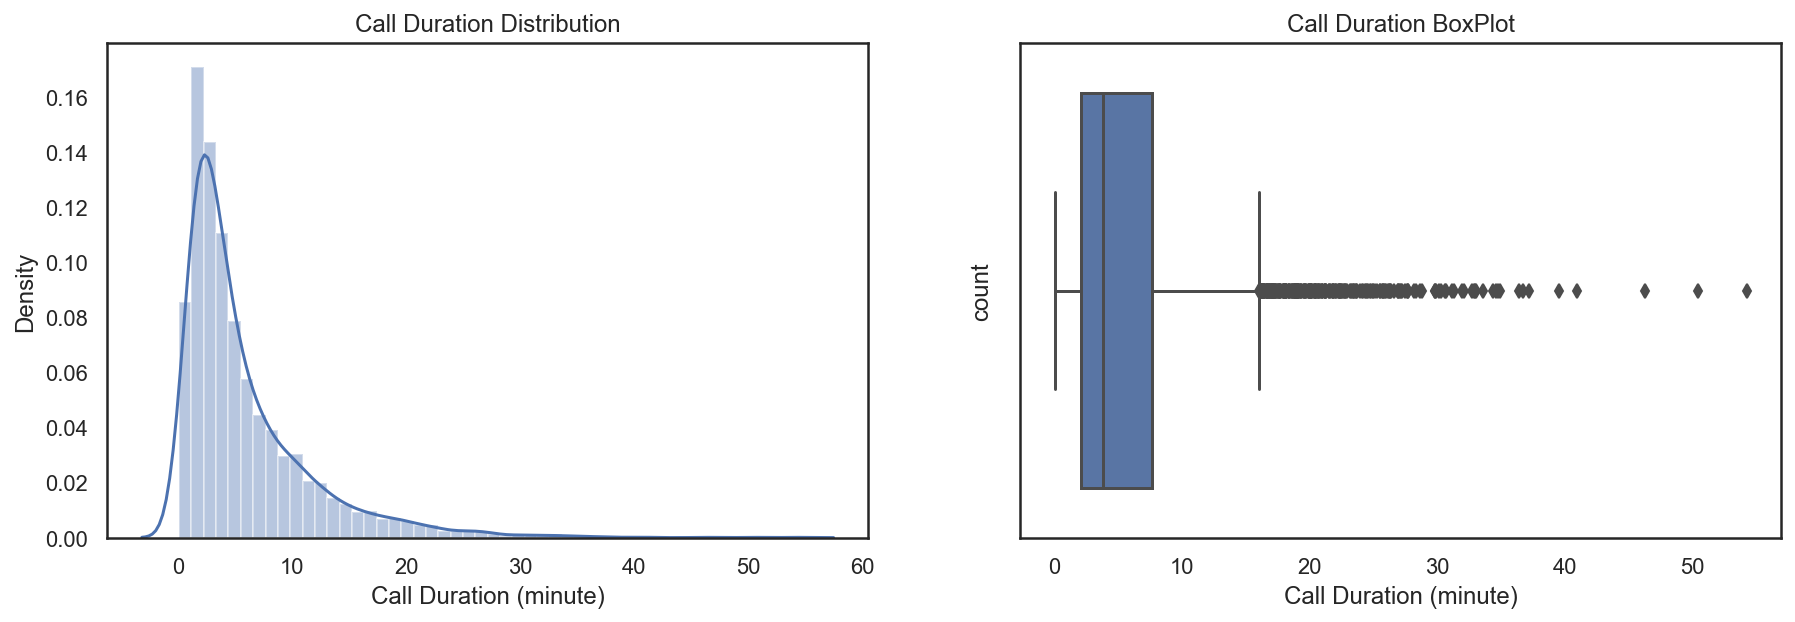

In [68]:
plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['Call_Duration'])
    plt.title('Call Duration Distribution')
    plt.xlabel('Call Duration (minute)')
    
    plt.subplot(2,2,2)    
    # 1. Age Boxplot 그리기
    sns.boxplot(train['Call_Duration'])
    plt.ylabel('count')
    plt.title('Call Duration BoxPlot')
    plt.xlabel('Call Duration (minute)')

In [69]:
# 상식적으로 40분 이상 통화하는 경우는 제외
# IRQ 계산하기
# q25, q75 = np.quantile(train['Call_Duration'], 0.25), np.quantile(train['Call_Duration'], 0.75)

# # IQR 계산하기
# iqr = q75 - q25    

# # outlier cutoff 계산하기     
# cut_off = iqr * 1.5          

# # lower와 upper bound 값 구하기     
# lower, upper = q25 - cut_off, q75 + cut_off

idx = train[train['Call_Duration'] > 40].index

train = train.drop(idx)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


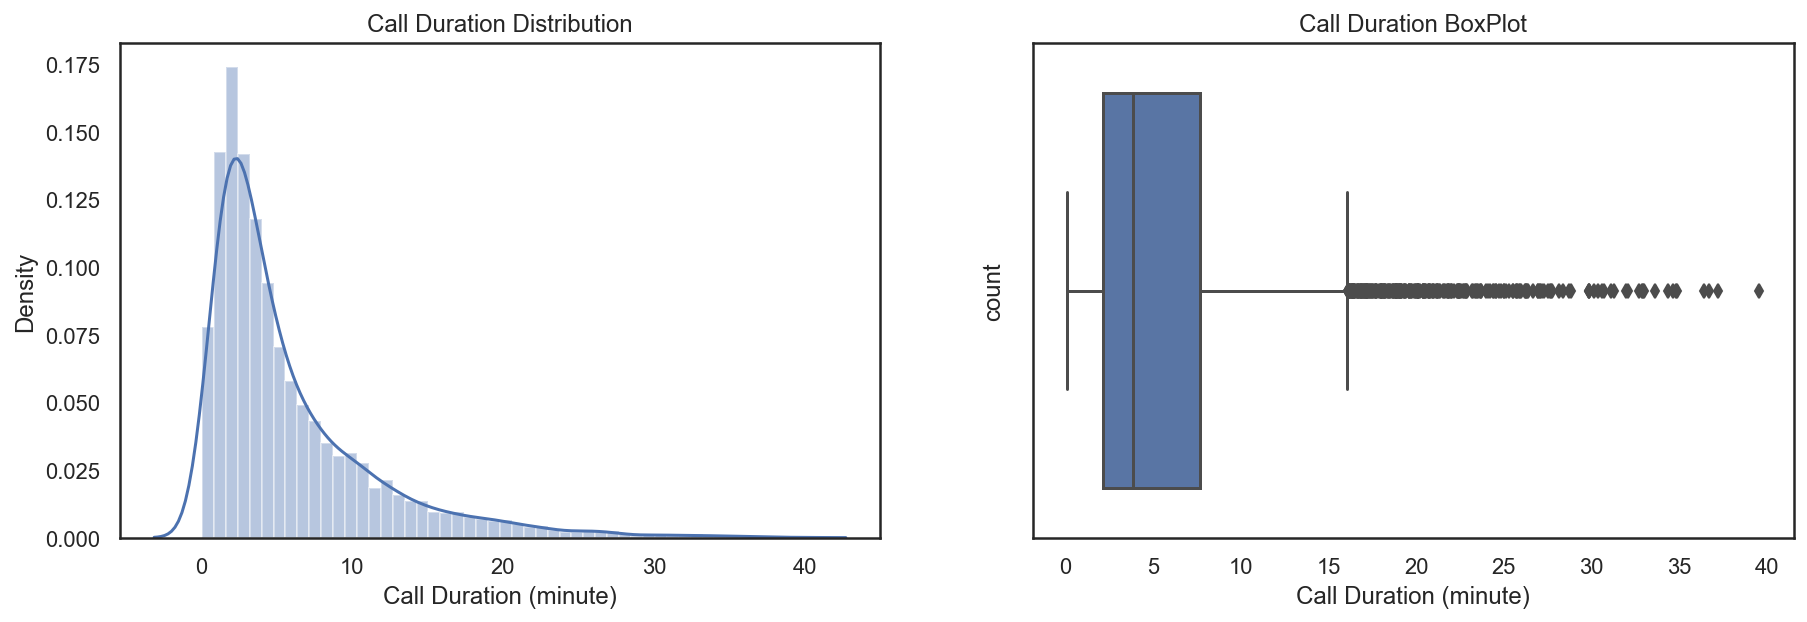

In [70]:
plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['Call_Duration'])
    plt.title('Call Duration Distribution')
    plt.xlabel('Call Duration (minute)')
    
    plt.subplot(2,2,2)    
    # 1. Age Boxplot 그리기
    sns.boxplot(train['Call_Duration'])
    plt.ylabel('count')
    plt.title('Call Duration BoxPlot')
    plt.xlabel('Call Duration (minute)')

In [71]:
## Call_Duration이 완성되었으므로 필요없는 열 CallStart와 CallEnd를 제거
train.drop(['CallStart', 'CallEnd'], axis = 1, inplace = True)

In [72]:
## Call_Duration과 CarInsurance의 열 위치 변경
# 참고 사이트 : https://hanawithdata.tistory.com/entry/pandas-column-%EC%88%9C%EC%84%9C-%EC%9E%AC%EB%B0%B0%EC%B9%98%ED%95%98%EB%8A%94-2%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95
train.head()

# col1 : Id ~ Outcome까지
col1 = train.columns[:-2].to_list()

# col2 : CarInsuarance
col2 = train.columns[-2:-1].to_list()

# col3 : Call_Duration
col3 = train.columns[-1:].to_list()

# 다시 순서 합체
new_col = col1 + col3 + col2
train = train[new_col]

## NoOfContacts Exploration

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


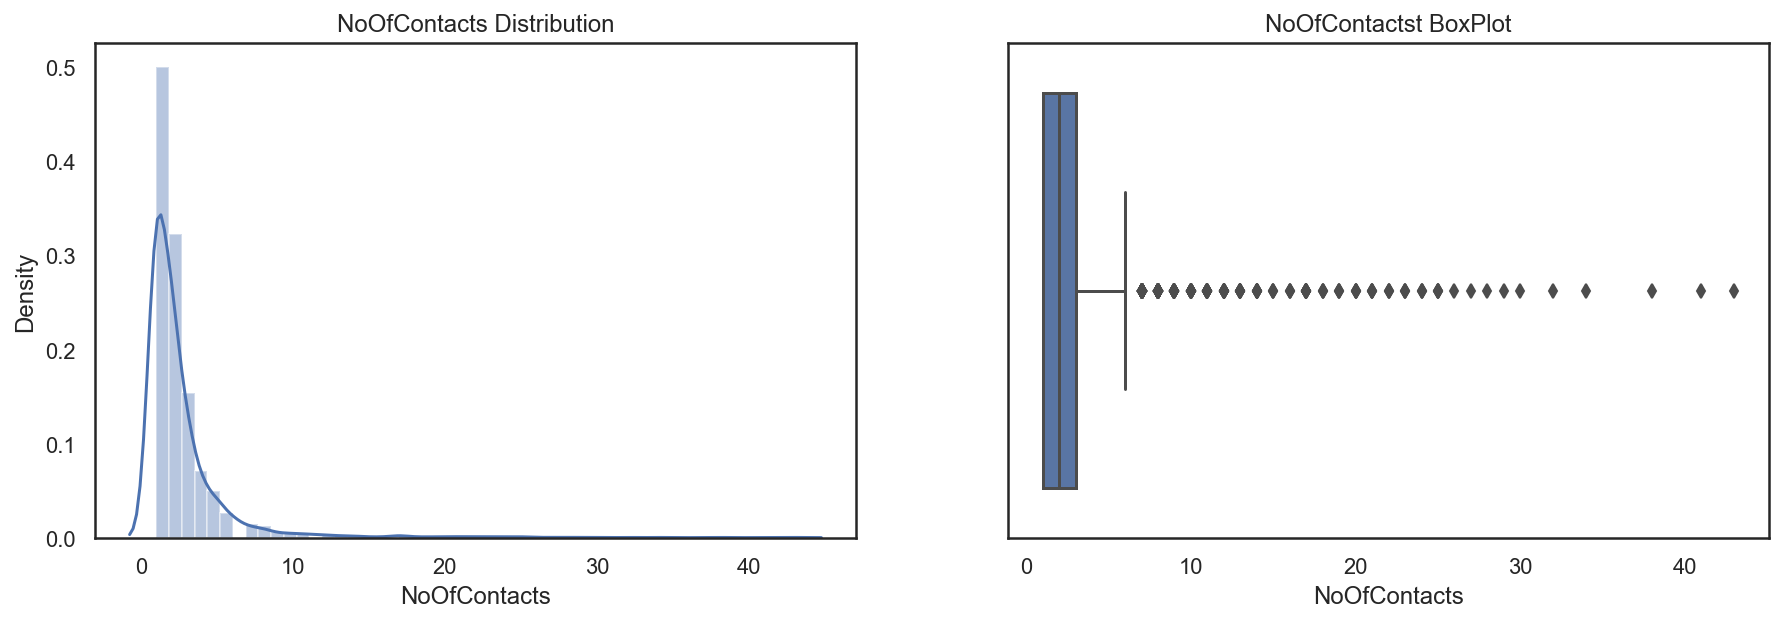

In [73]:
# NoOfContacts : 마케팅 동안의 고객에게 접촉한 횟수
plt.figure(figsize = (15, 10))
with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['NoOfContacts'])
    plt.title('NoOfContacts Distribution')    
    
    plt.subplot(2,2,2) 
    sns.boxplot(train['NoOfContacts'])
    plt.title('NoOfContactst BoxPlot')

In [74]:
# 30번 이상부터는 고객에게 역효과가 날 것이므로 제외
idx = train[train['NoOfContacts'] > 30].index
train = train.drop(idx)

In [75]:
len(idx)

5

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


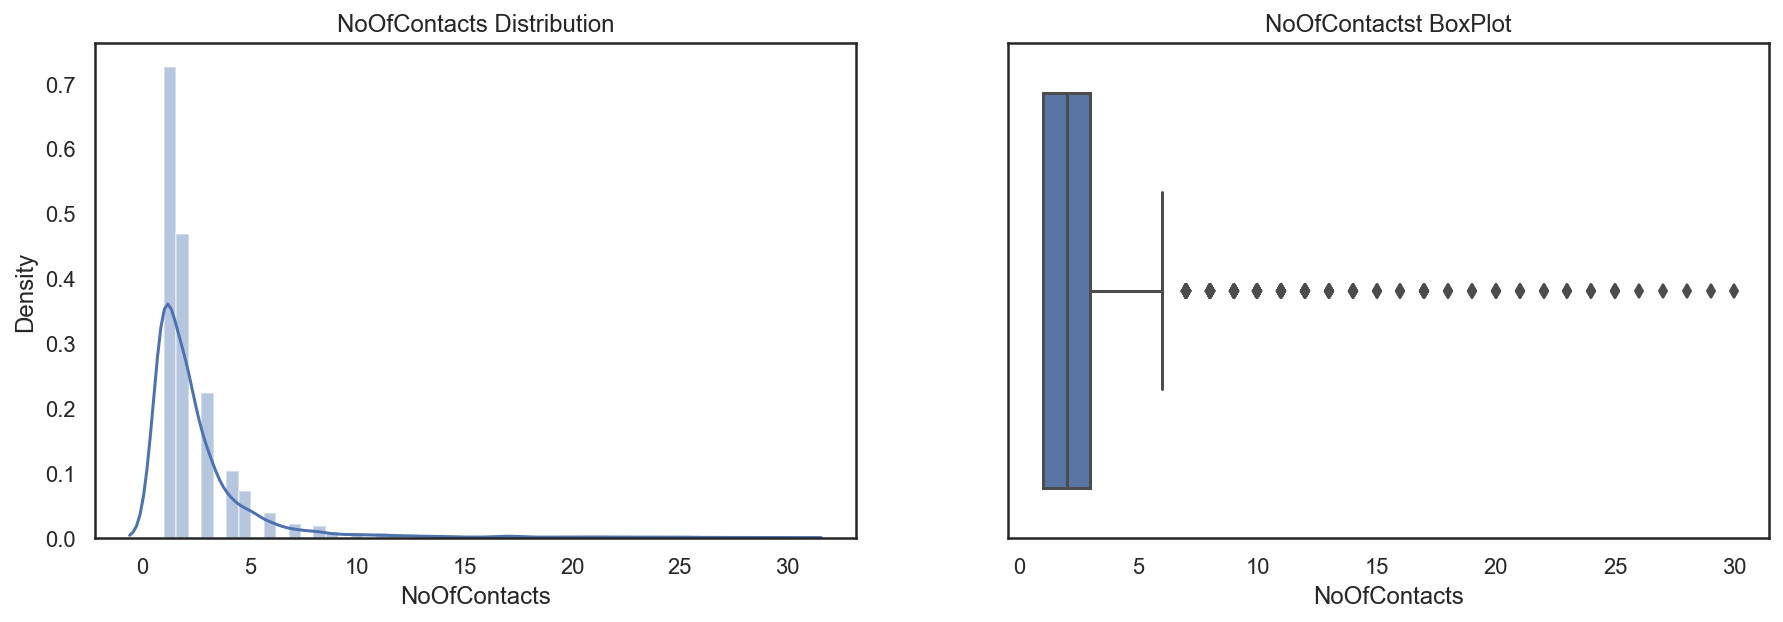

In [76]:
plt.figure(figsize = (15, 10))
with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['NoOfContacts'])
    plt.title('NoOfContacts Distribution')    
    
    plt.subplot(2,2,2) 
    sns.boxplot(train['NoOfContacts'])
    plt.title('NoOfContactst BoxPlot')

In [77]:
## 접촉 횟수와 계약성사간의 관계

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


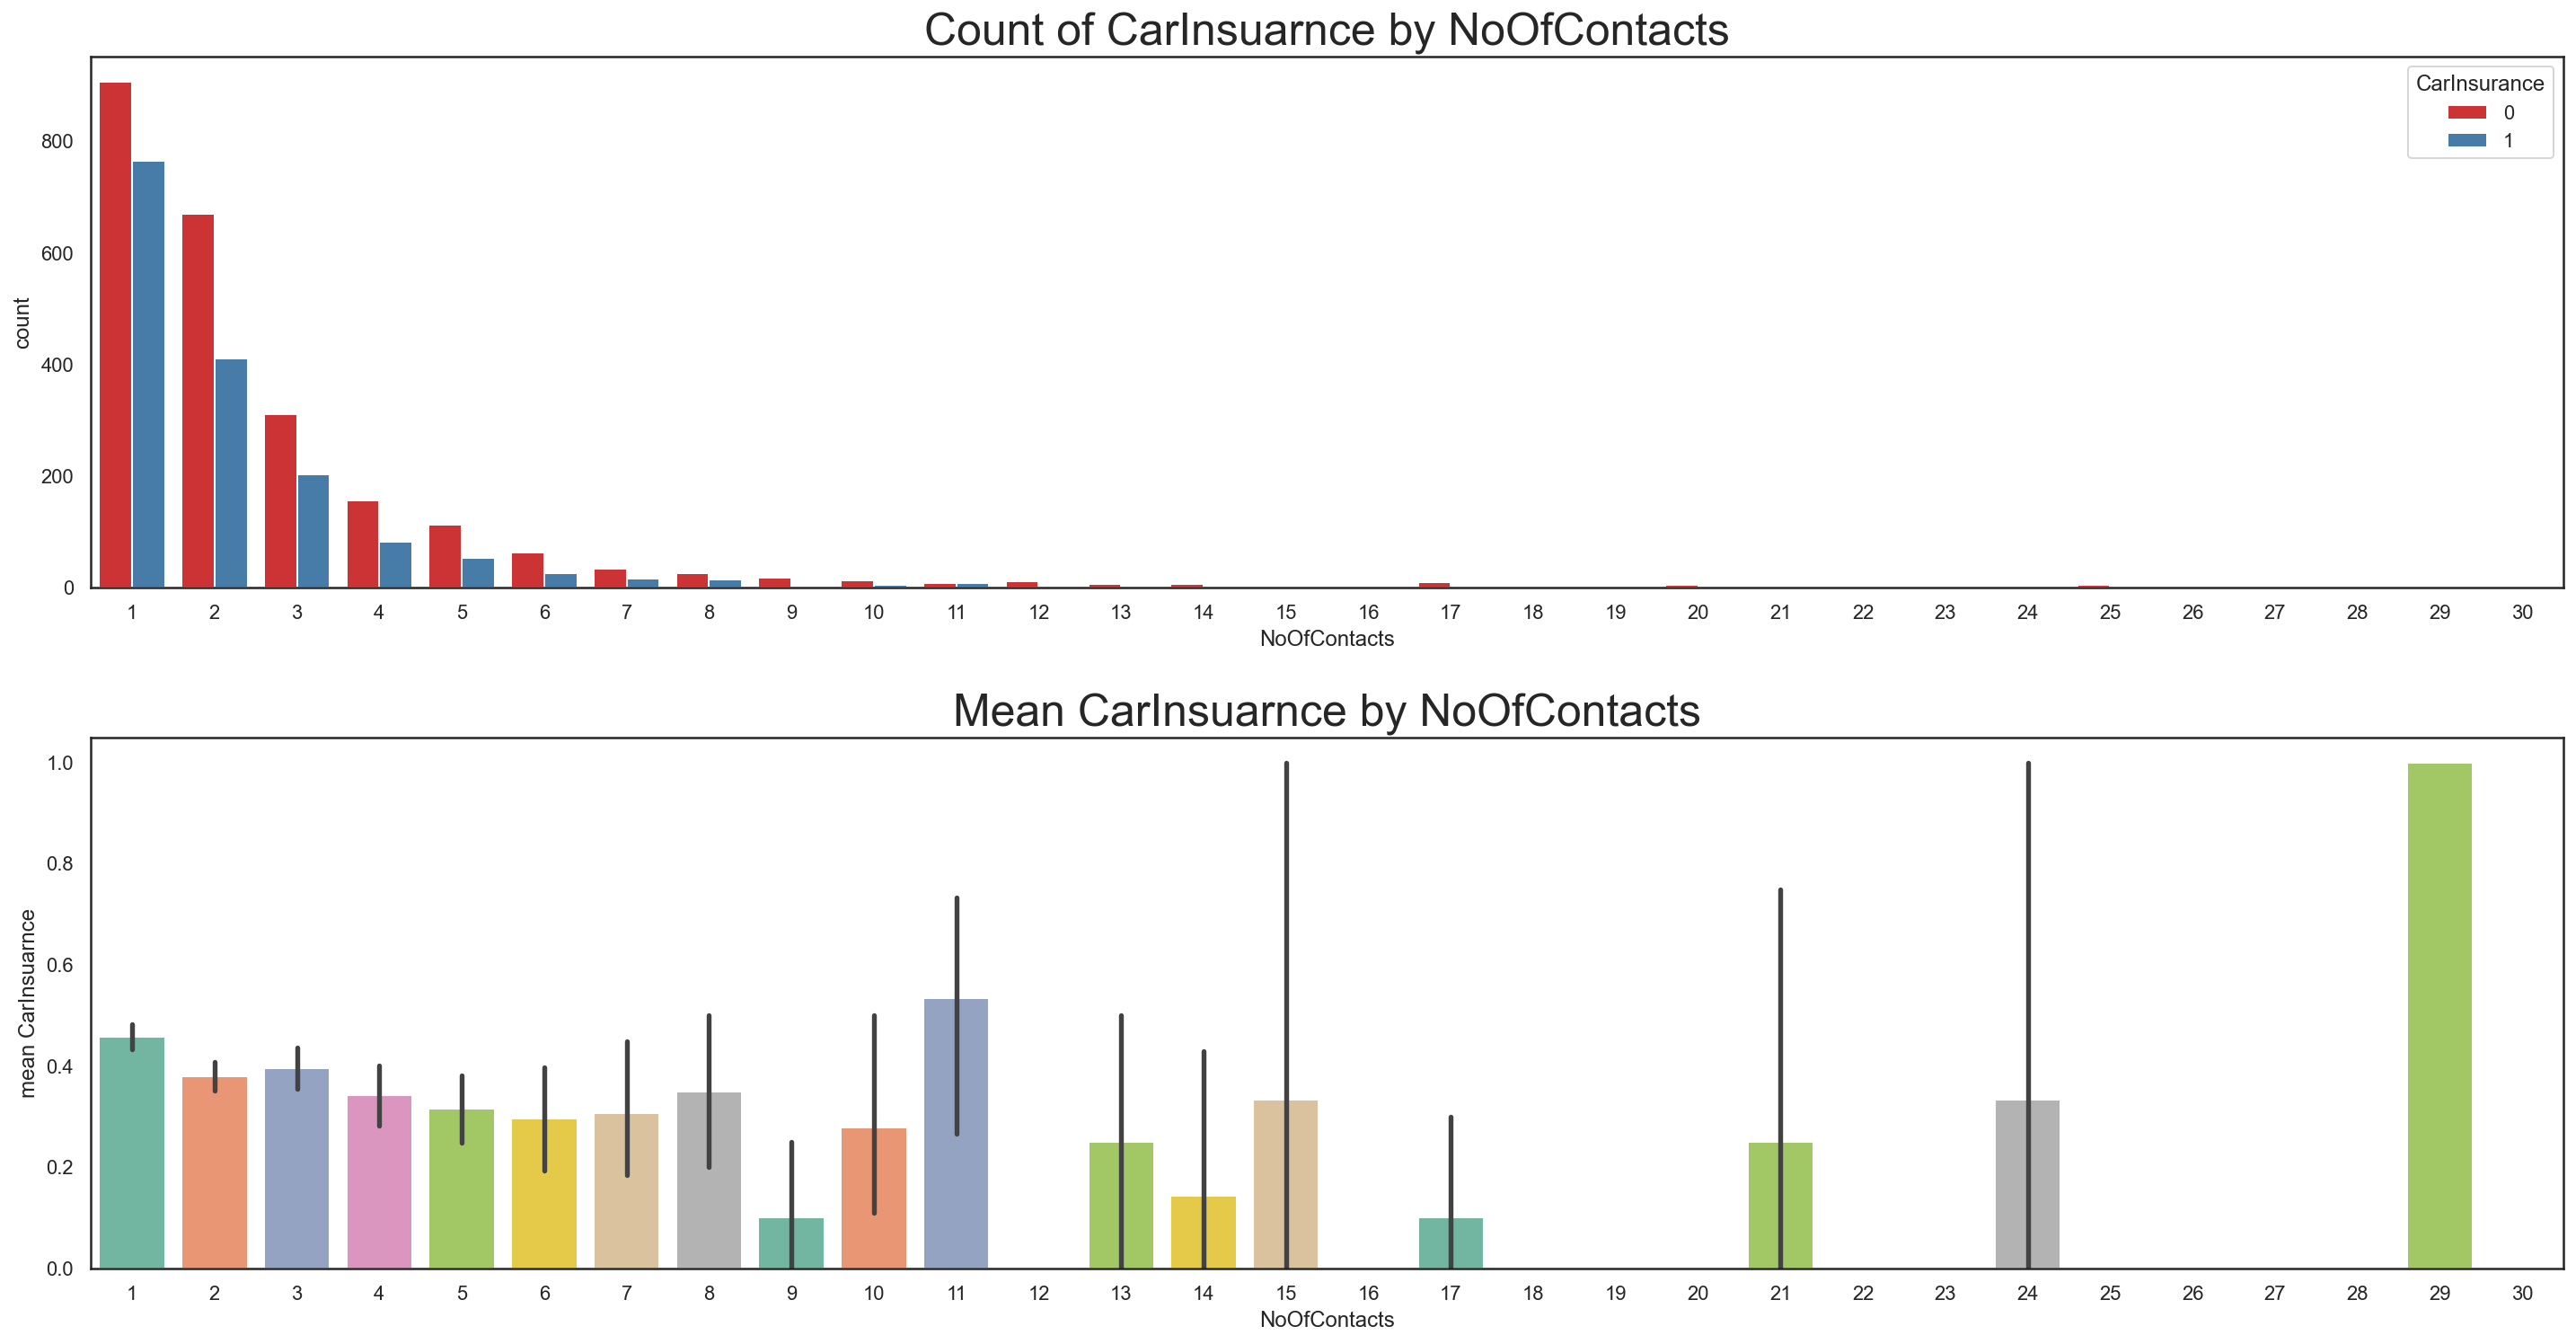

In [78]:
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.countplot(x = 'NoOfContacts', hue = 'CarInsurance', data = train, palette='Set1')
    plt.legend(loc = 'upper right', title = "CarInsurance")
    plt.title("Count of CarInsuarnce by NoOfContacts", fontsize = 25)
    
    plt.tight_layout(h_pad=5, w_pad=8)
    
    plt.subplot(2,1,2)
    sns.barplot('NoOfContacts','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by NoOfContacts", fontsize = 25)
    plt.ylabel('mean CarInsuarnce')

In [79]:
# NoOfContacts와 보험계약 간에는 상관이 없음, 1회 2회 3회이상으로 범주 변경

## DaysPassed Exploration

In [80]:
# DaysPassed

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


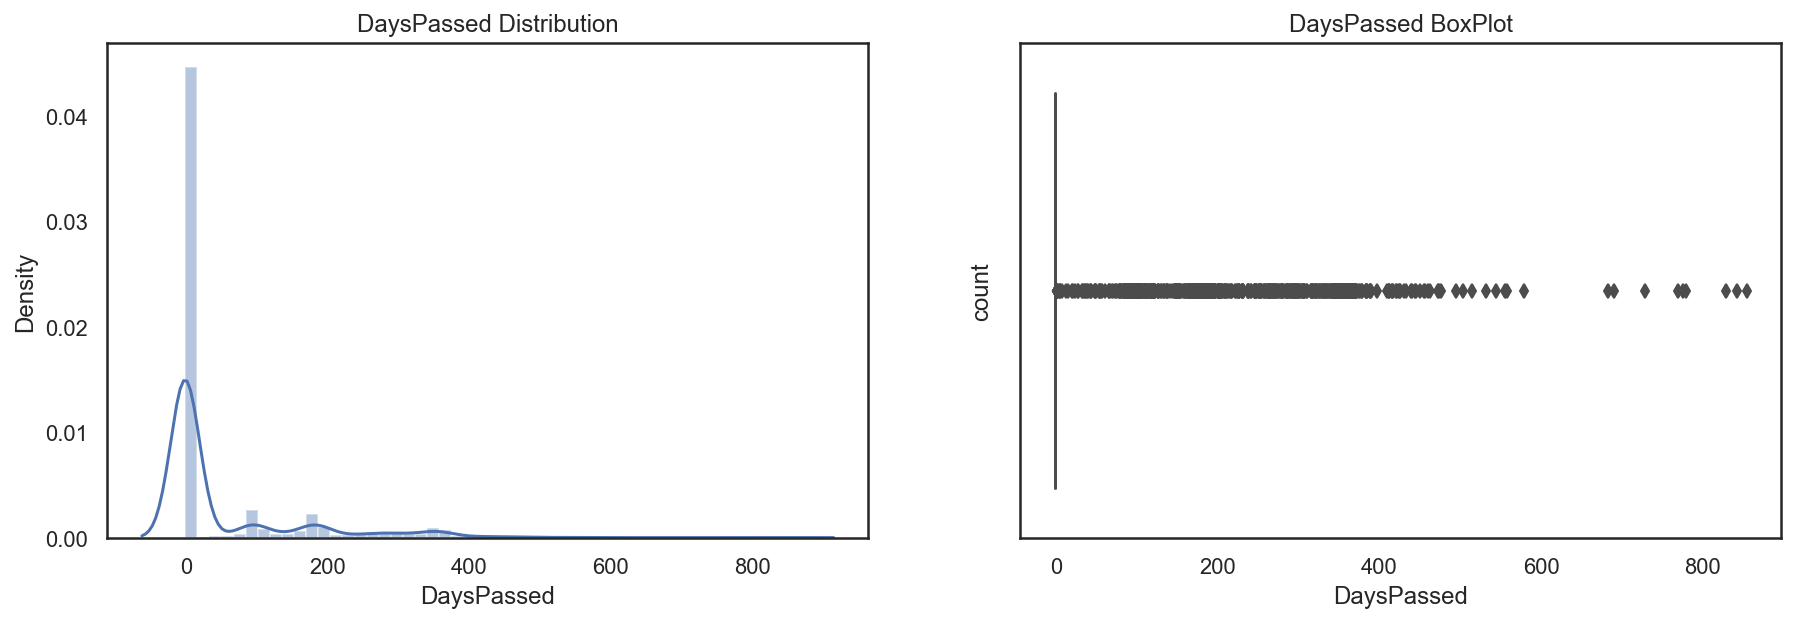

In [81]:
plt.figure(figsize = (15, 10))
with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['DaysPassed'])
    plt.title('DaysPassed Distribution')
        
    plt.subplot(2,2,2)    
    # 1. Age Boxplot 그리기
    sns.boxplot(train['DaysPassed'])
    plt.ylabel('count')
    plt.title('DaysPassed BoxPlot')

In [82]:
## 여기 이상치는 의미가 이해됨
## 경과 일 수는 많아도 상관이 없음

<Figure size 1080x432 with 0 Axes>

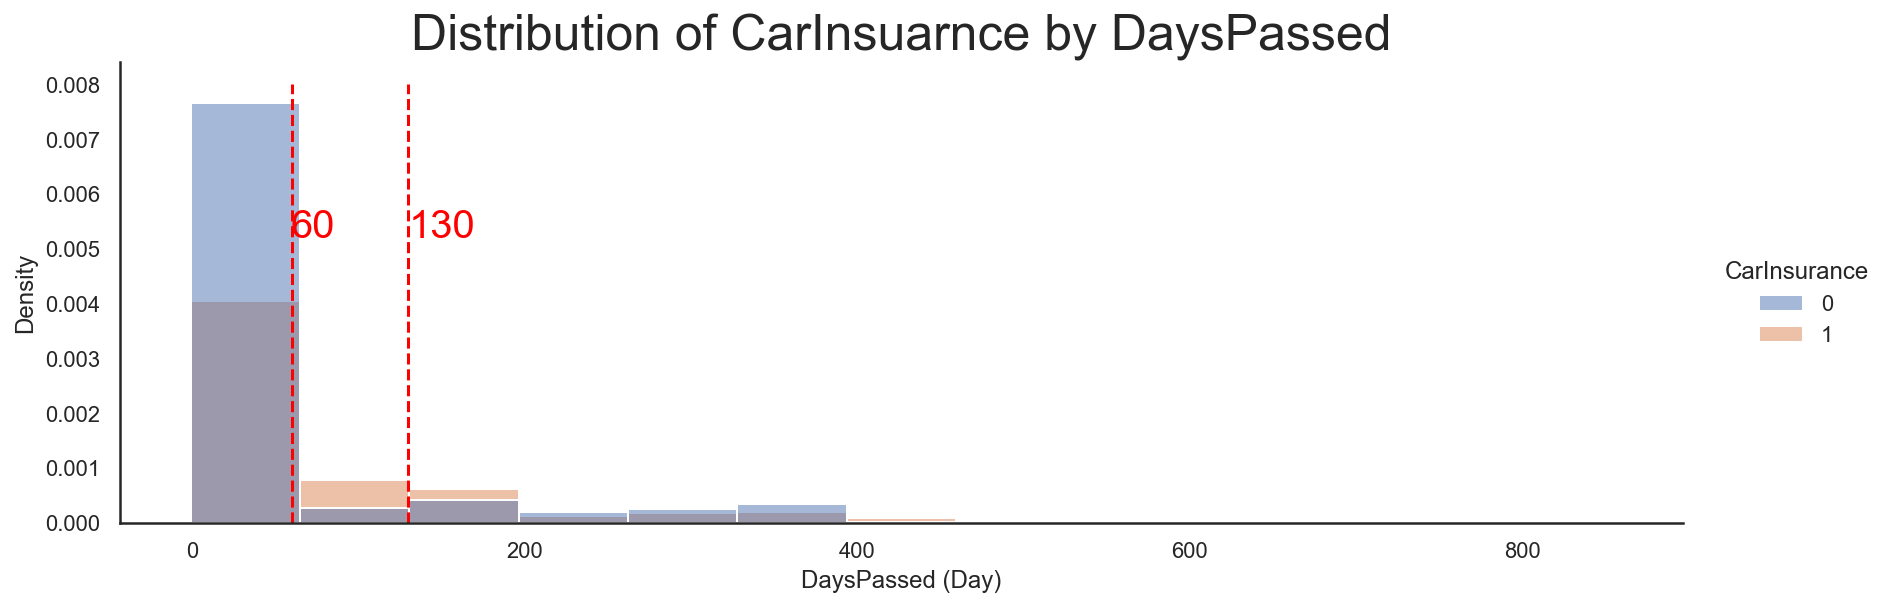

In [83]:
# DaysPassed
with sns.axes_style('white'):
    plt.figure(figsize=(15,6))
    facet = sns.displot(train, x="DaysPassed", hue="CarInsurance", stat="density", height = 4, aspect = 3)
    plt.title("Distribution of CarInsuarnce by DaysPassed", fontsize = 25)
    plt.vlines(60, 0, 0.008, color = 'red', linestyle = '--')
    plt.vlines(130, 0, 0.008, color = 'red', linestyle = '--')
    plt.text(59, 0.0052,'60', fontdict = {'fontsize' : 20}, color = 'red')
    plt.text(130, 0.0052,'130', fontdict = {'fontsize' : 20}, color = 'red')
    plt.xlabel('DaysPassed (Day)')

In [84]:
# 2달 미만 (0~59)
DayPassed_under_mon_df = train[train['DaysPassed'] < 59]

In [85]:
DayPassed_under_mon_df['num'] = 1

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/343654914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DayPassed_under_mon_df['num'] = 1


In [86]:
# 2달 ~ 4달 (60~119)
DayPassed_sec_mon_df = train[(train['DaysPassed'] >= 60) & (train['DaysPassed'] <= 119)]

In [87]:
DayPassed_sec_mon_df['num'] = 1

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/2387271292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DayPassed_sec_mon_df['num'] = 1


In [88]:
# 4달 ~ (119 부터 ~)
DayPassed_third_mon_df = train[(train['DaysPassed'] >= 120)]

In [89]:
DayPassed_third_mon_df['num'] = 1

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/2058834359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DayPassed_third_mon_df['num'] = 1


In [90]:
## 내가 나눈 DayPass에 따른 보험계약 승낙은 어떻게 달라질까?

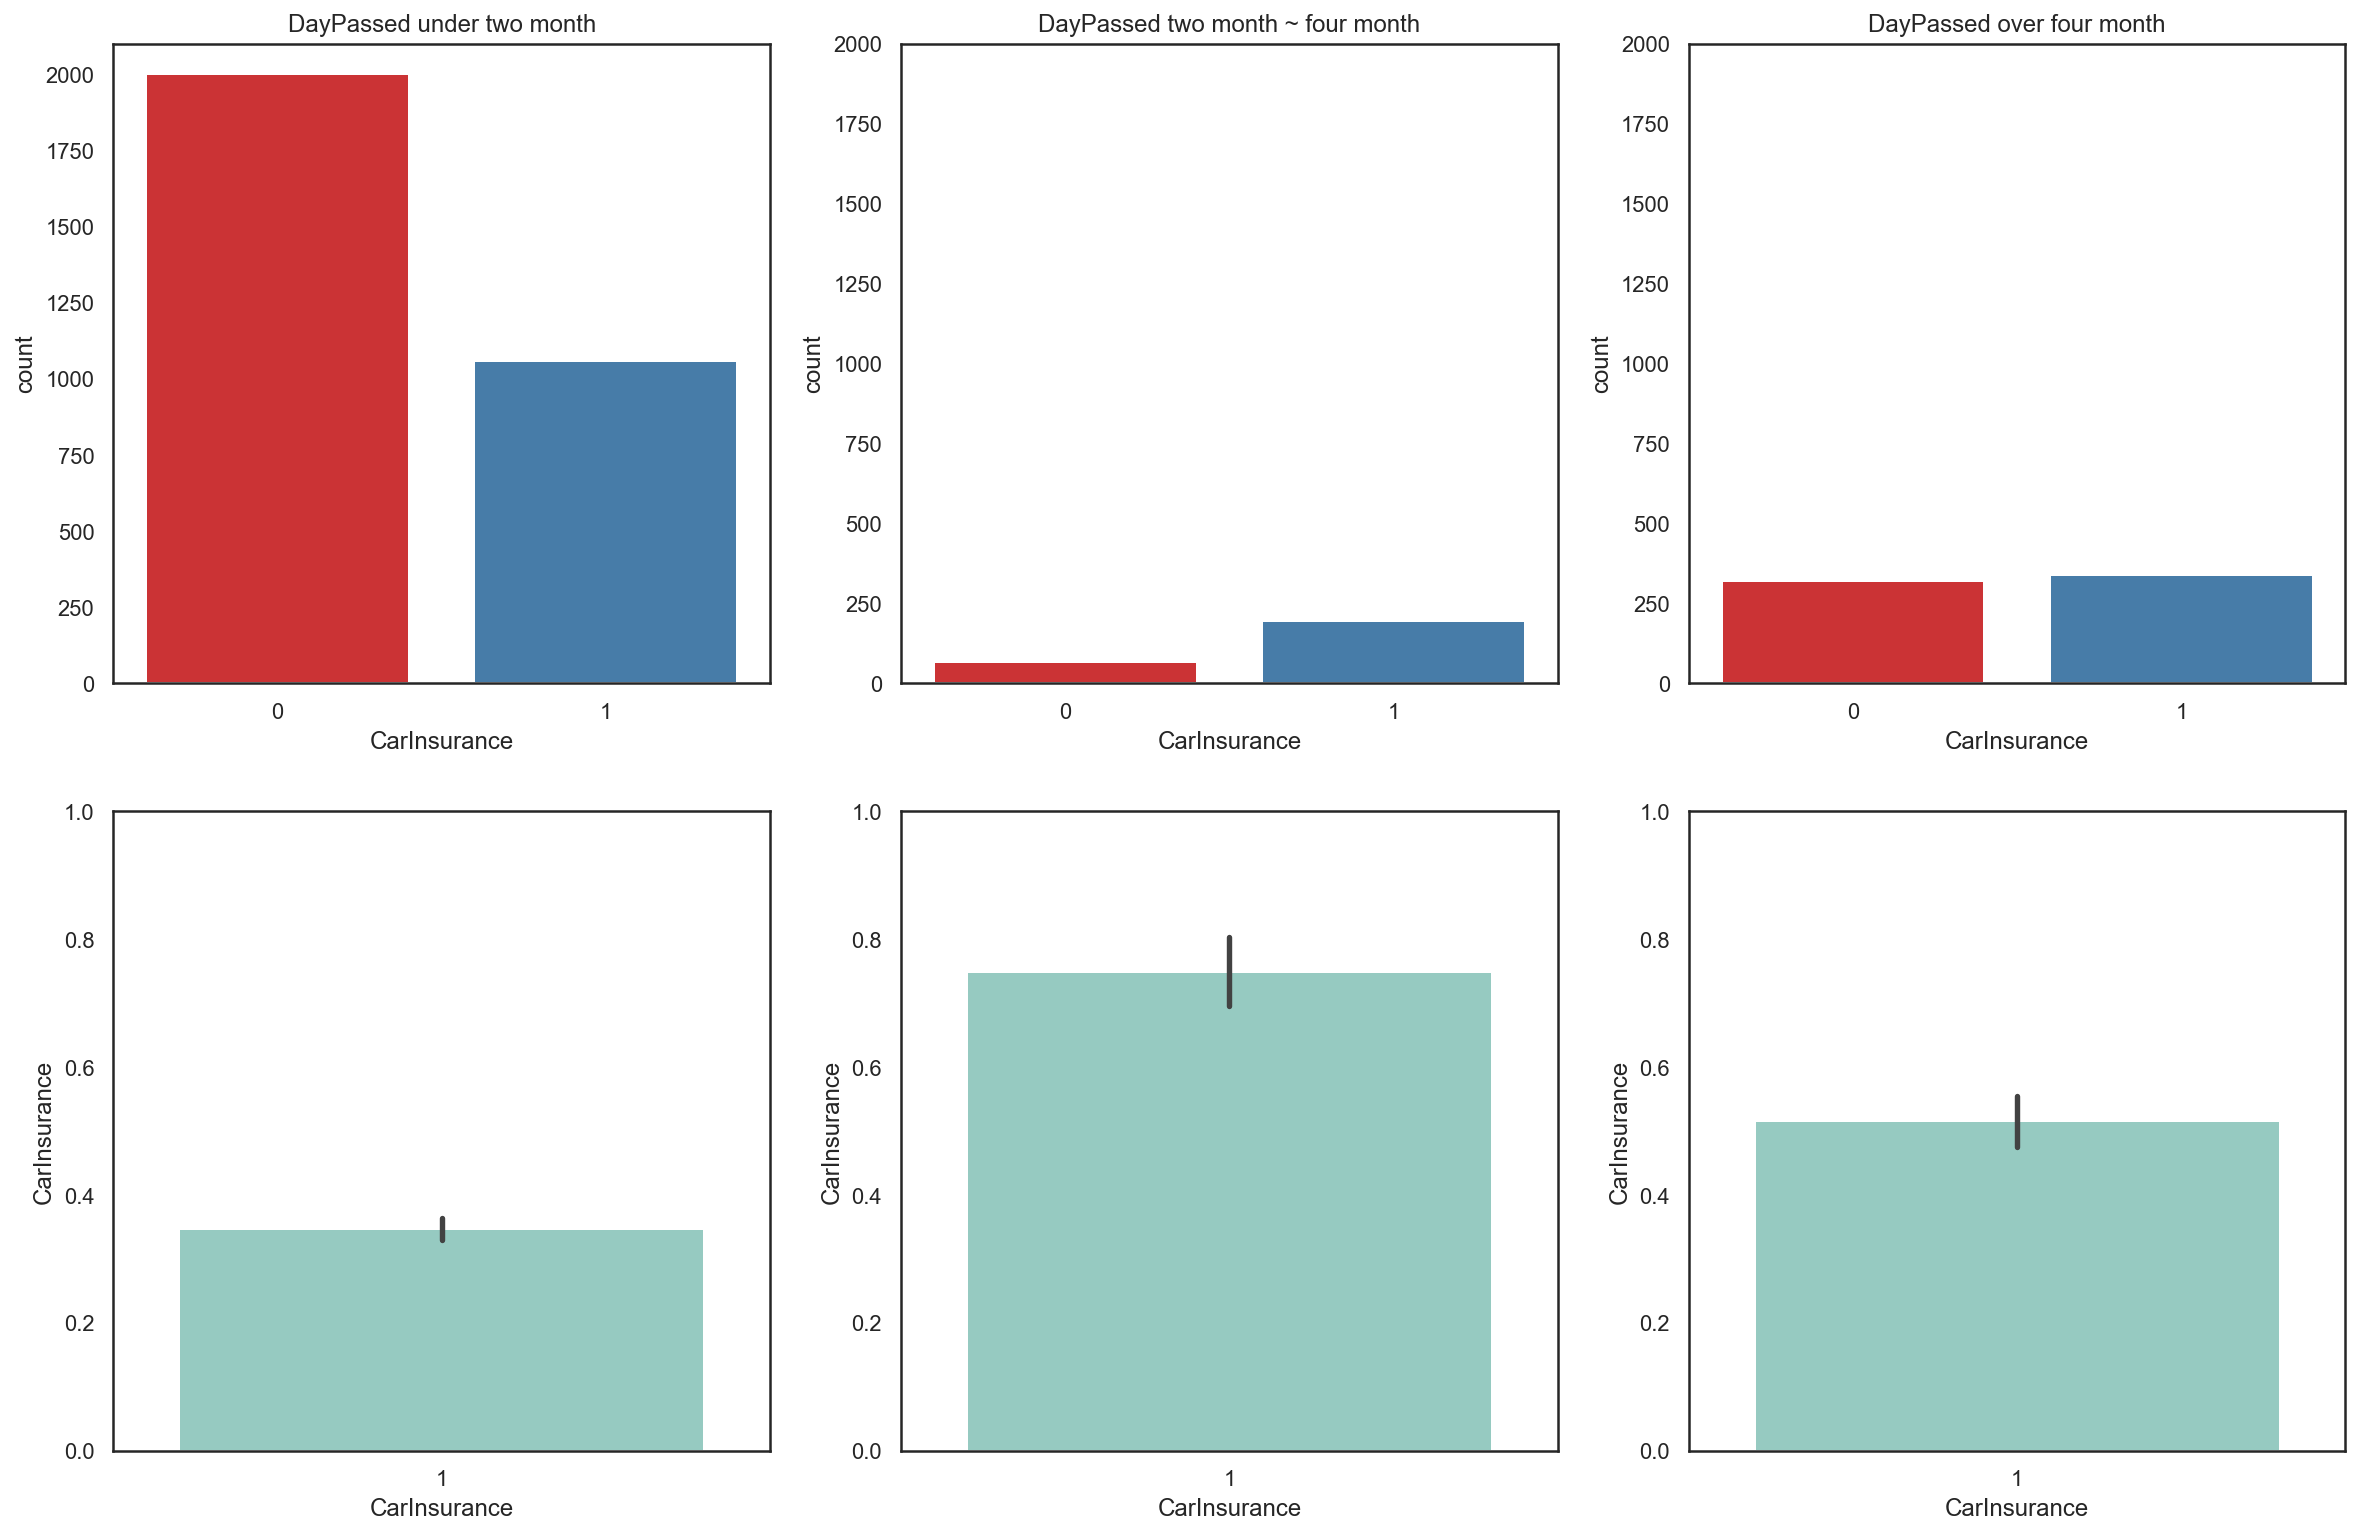

In [91]:
plt.figure(figsize = (20, 20))

with sns.axes_style('white'):
    plt.subplot(3,3,1)
    sns.countplot(x = 'CarInsurance', data = DayPassed_under_mon_df, palette='Set1')
    plt.title("DayPassed under two month")
    
    plt.subplot(3,3,2)
    sns.countplot(x = 'CarInsurance', data = DayPassed_sec_mon_df, palette='Set1')
    plt.title("DayPassed two month ~ four month")
    plt.ylim(0, 2000)
    
    plt.subplot(3,3,3)
    sns.countplot(x = 'CarInsurance', data = DayPassed_third_mon_df, palette='Set1')
    plt.title("DayPassed over four month")
    plt.ylim(0, 2000)
    
    plt.subplot(3,3,4)
    sns.barplot(x = 'num', y = 'CarInsurance', data = DayPassed_under_mon_df, palette='Set3')
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)
    
    
    plt.subplot(3,3,5)
    sns.barplot(x = 'num', y = 'CarInsurance', data = DayPassed_sec_mon_df, palette='Set3')
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)
    
    
    plt.subplot(3,3,6)
    sns.barplot(x = 'num', y = 'CarInsurance', data = DayPassed_third_mon_df, palette='Set3')
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)

In [92]:
# 궁금한점 : 0미만에서는 어떻게 될까? 그리고 1 ~ 59 사이의 관계는?
# 참고로 만들어보자

In [93]:
# 0미만
DayPassed_neg_mon_df = train[train['DaysPassed'] < 0]

In [94]:
DayPassed_neg_mon_df['num'] = 1

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/2035801819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DayPassed_neg_mon_df['num'] = 1


In [95]:
# 1일 ~ 59일 사이
DayPassed_pos_mon_df = train[(train['DaysPassed'] >= 0) & (train['DaysPassed'] <= 59)]

In [96]:
DayPassed_pos_mon_df['num'] = 1

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/1004765669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DayPassed_pos_mon_df['num'] = 1


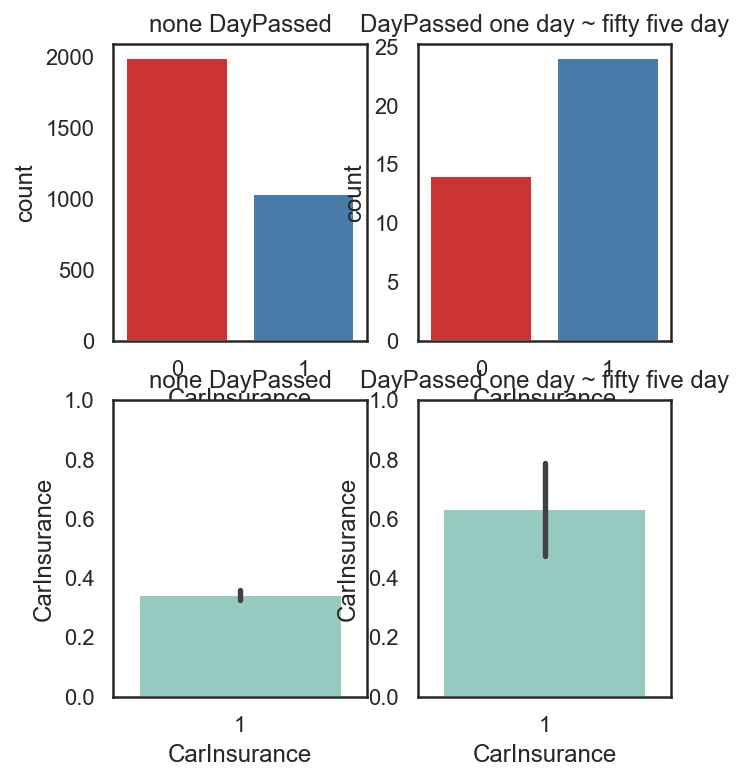

In [97]:
plt.figure(figsize = (5, 6))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.countplot(x = 'CarInsurance', data = DayPassed_neg_mon_df, palette='Set1')
    plt.title("none DayPassed")
    
    plt.subplot(2,2,2)
    sns.countplot(x = 'CarInsurance', data = DayPassed_pos_mon_df, palette='Set1')
    plt.title("DayPassed one day ~ fifty five day")
    
    plt.subplot(2,2,3)
    sns.barplot(x = 'num', y = 'CarInsurance',data = DayPassed_neg_mon_df, palette='Set3')
    plt.title("none DayPassed")
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)
    
    plt.subplot(2,2,4)
    sns.barplot(x = 'num', y = 'CarInsurance', data = DayPassed_pos_mon_df, palette='Set3')
    plt.title("DayPassed one day ~ fifty five day")
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)

In [98]:
# negative day

In [99]:
# 2달 ~ 4달 사이의 고객이 상대적으로 보험 계약 승낙이 높음

## PrevAttempts Exploration

In [100]:
# PrevAttempts : 현재 마케팅 이전에 고객과 접촉한 횟수

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


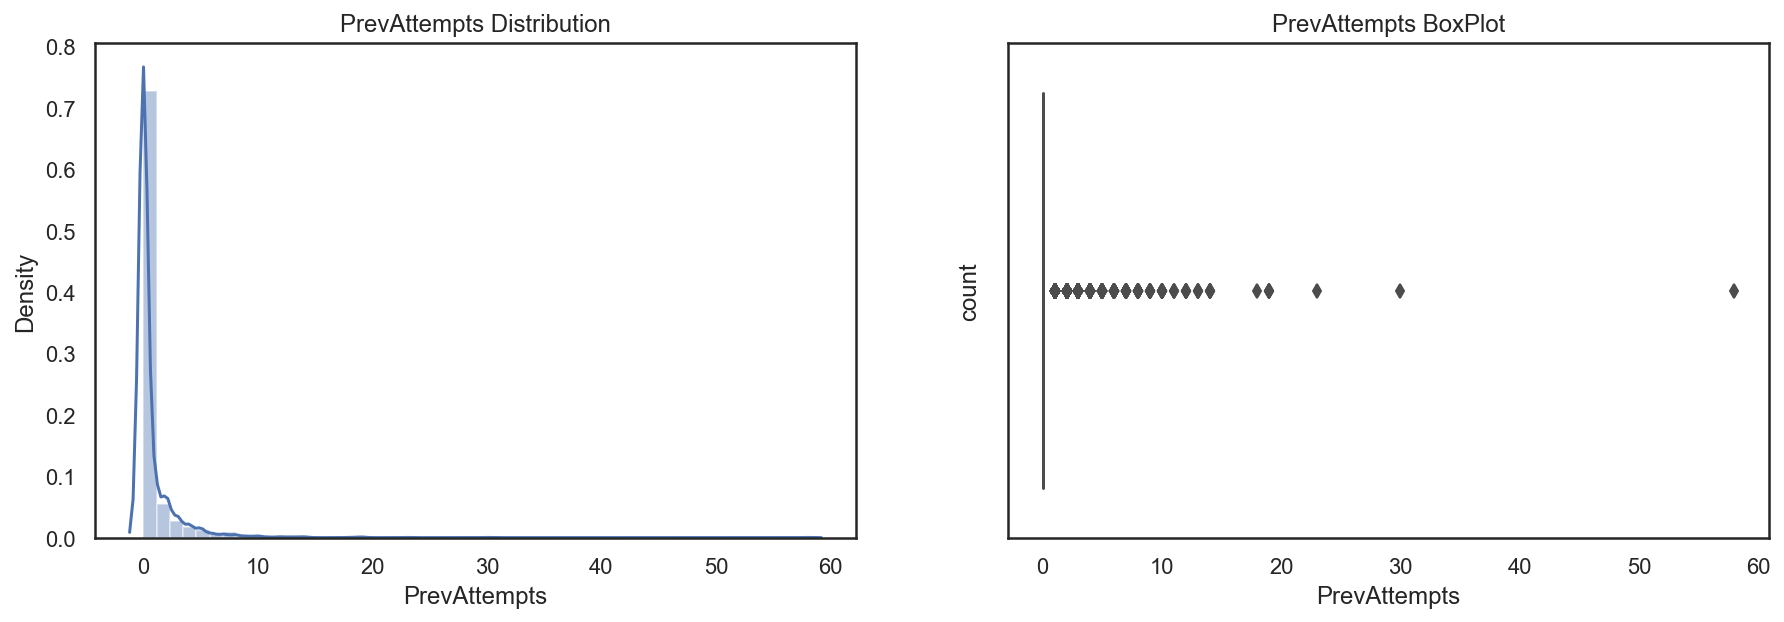

In [101]:
plt.figure(figsize = (15, 10))
with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['PrevAttempts'])
    plt.title('PrevAttempts Distribution')    
    
    plt.subplot(2,2,2)    
    # 1. Boxplot 그리기
    sns.boxplot(train['PrevAttempts'])
    plt.title('PrevAttempts BoxPlot')
    plt.ylabel('count')

In [102]:
# 50회 이상은 너무 극단값이다.

In [103]:
idx = train[train['PrevAttempts'] > 50].index

train = train.drop(idx)

In [104]:
len(idx)

1

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


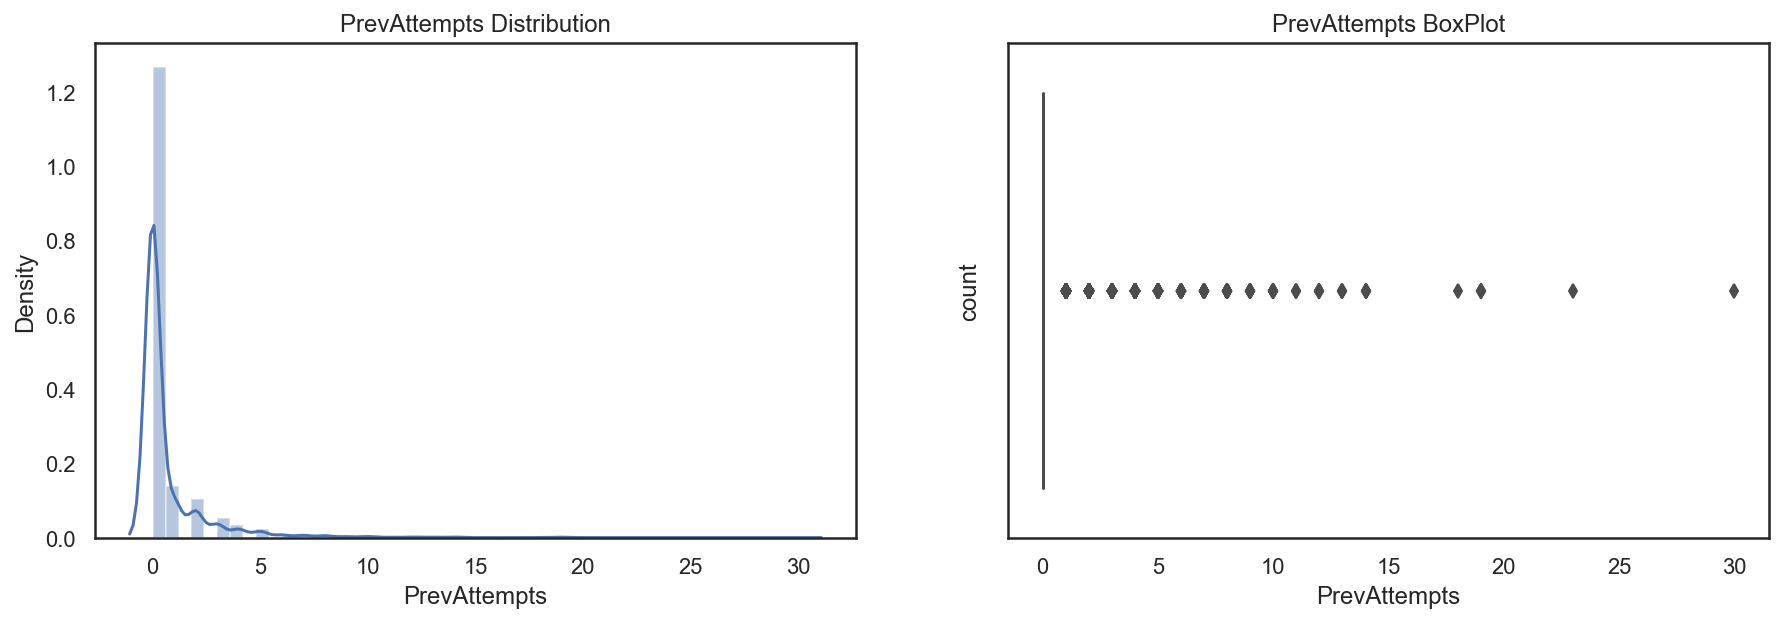

In [105]:
plt.figure(figsize = (15, 10))

with sns.axes_style('white'):
    plt.subplot(2,2,1)
    sns.distplot(train['PrevAttempts'])
    plt.title('PrevAttempts Distribution')    
    
    plt.subplot(2,2,2)    
    # 1. Boxplot 그리기
    sns.boxplot(train['PrevAttempts'])
    plt.title('PrevAttempts BoxPlot')
    plt.ylabel('count')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


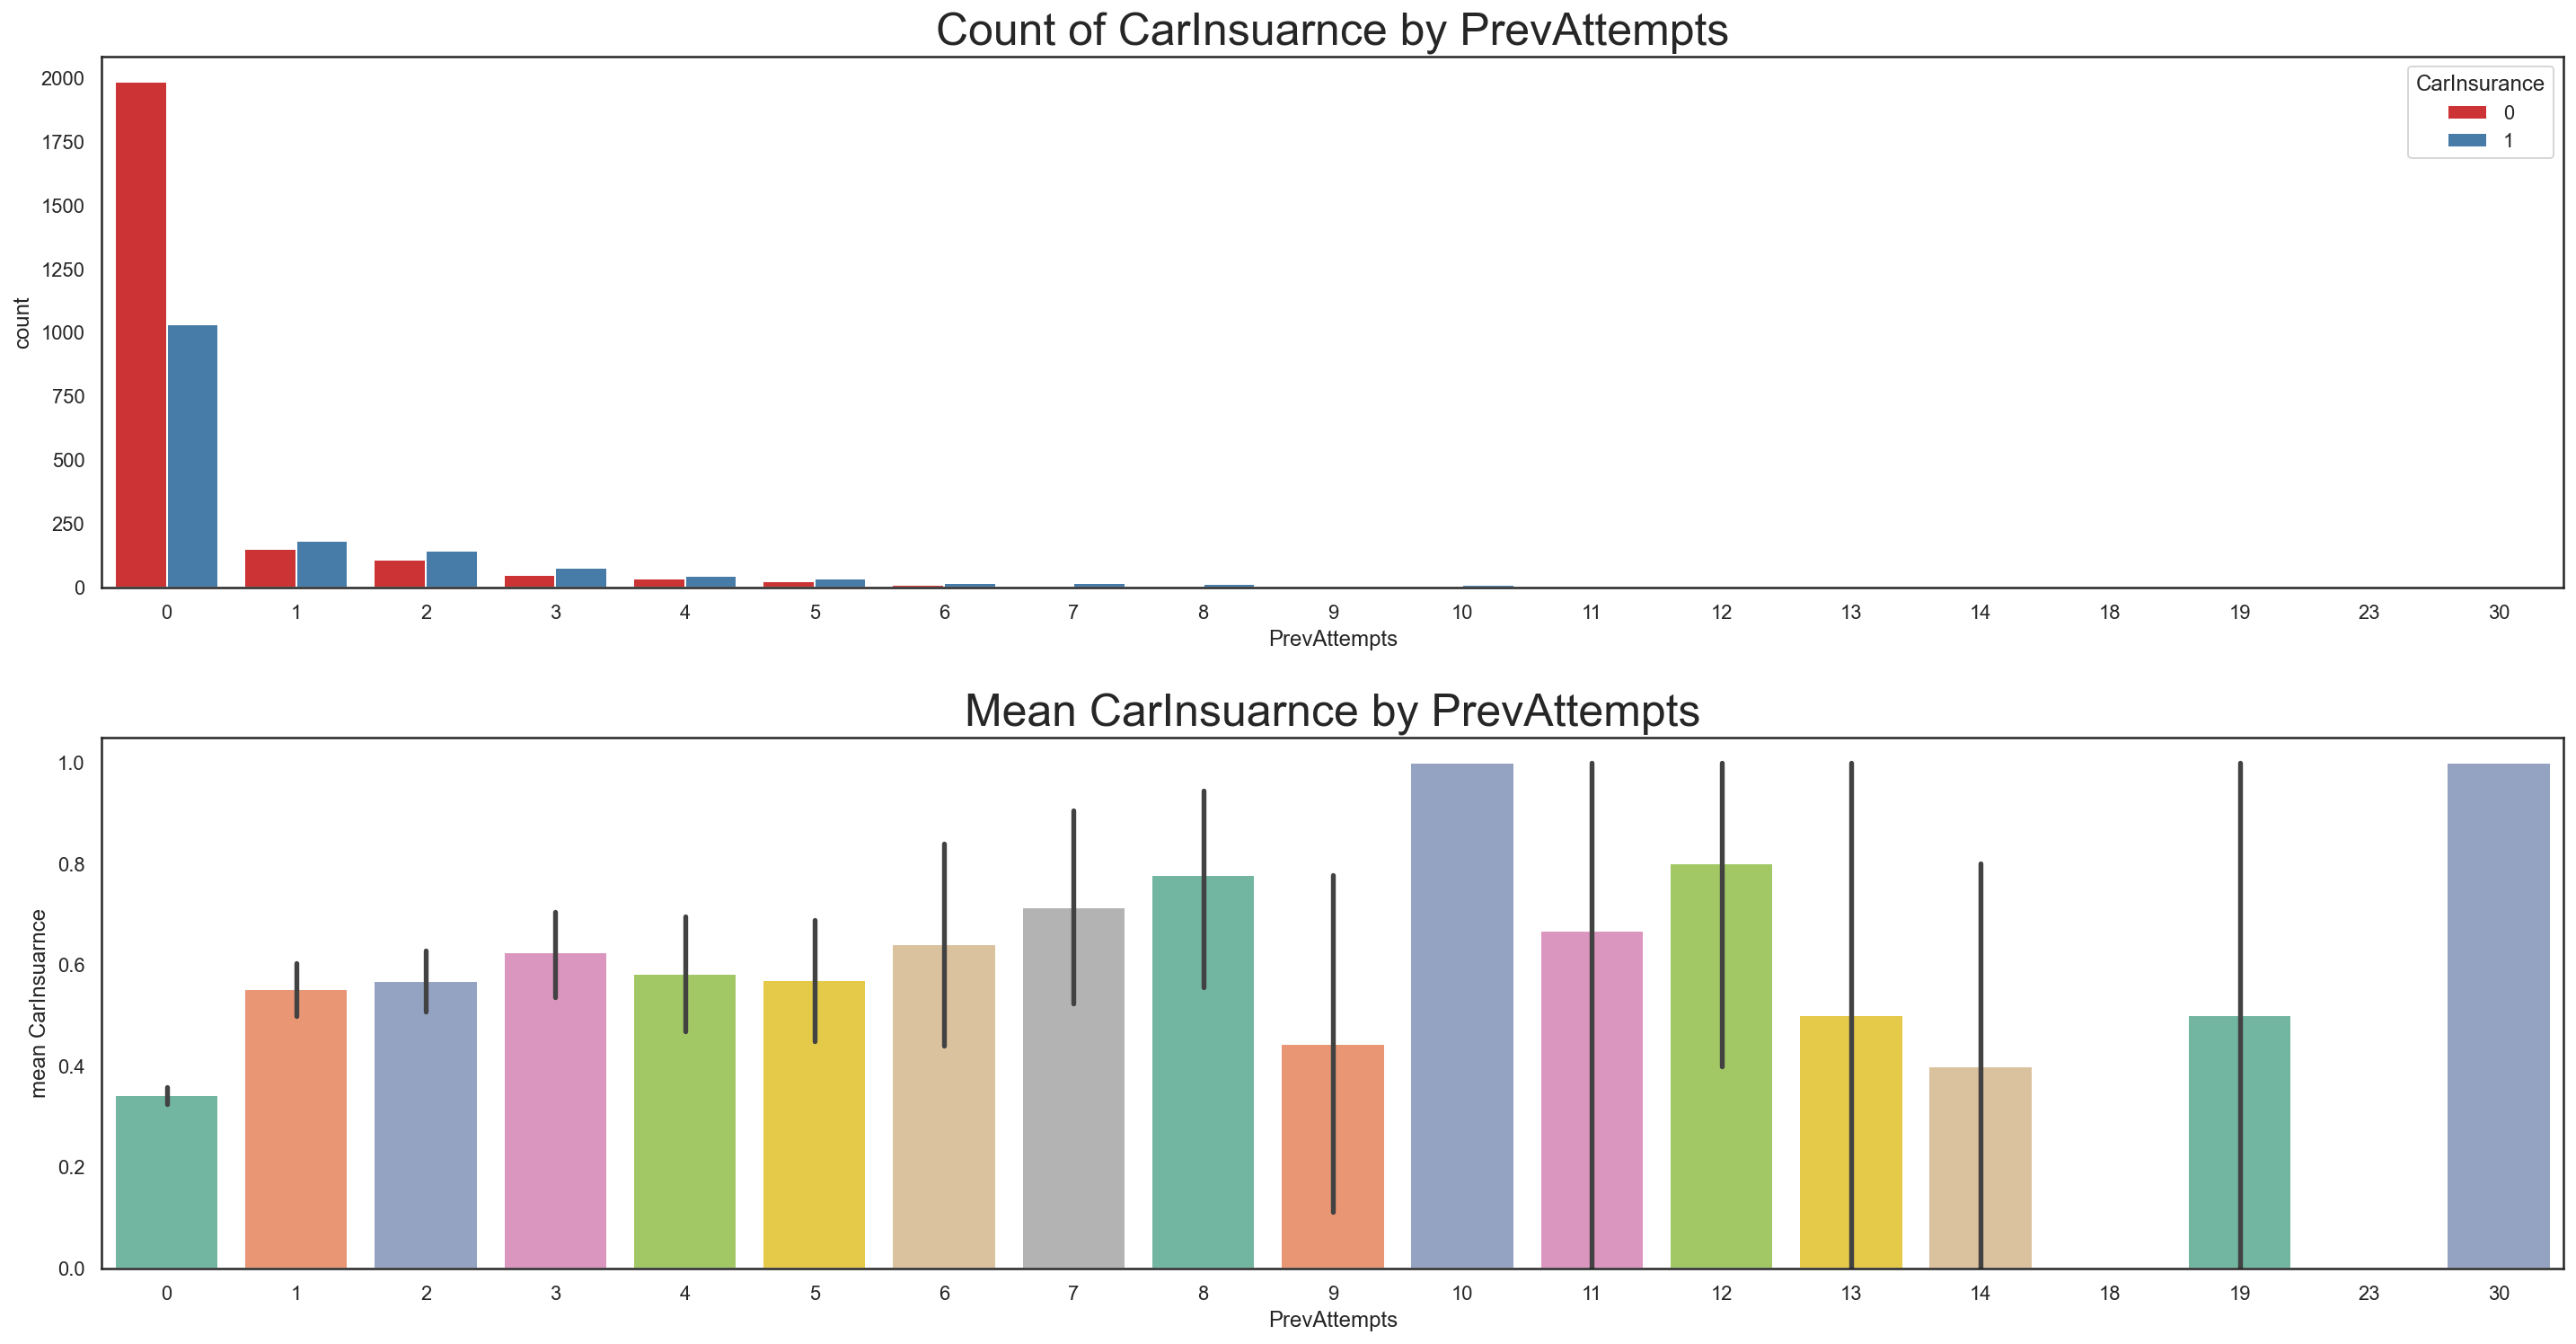

In [106]:
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.countplot(x = 'PrevAttempts', hue = 'CarInsurance', data = train, palette='Set1')
    plt.legend(loc = 'upper right', title = "CarInsurance")
    
    plt.title("Count of CarInsuarnce by PrevAttempts", fontsize = 25)
    
    plt.tight_layout(h_pad=5, w_pad=8)
    
    
    plt.subplot(2,1,2)
    sns.barplot('PrevAttempts','CarInsurance', data=train,palette='Set2')
    plt.title("Mean CarInsuarnce by PrevAttempts", fontsize = 25)
    plt.ylabel('mean CarInsuarnce')

In [107]:
## 접촉의 유무로 변경

<Figure size 1080x432 with 0 Axes>

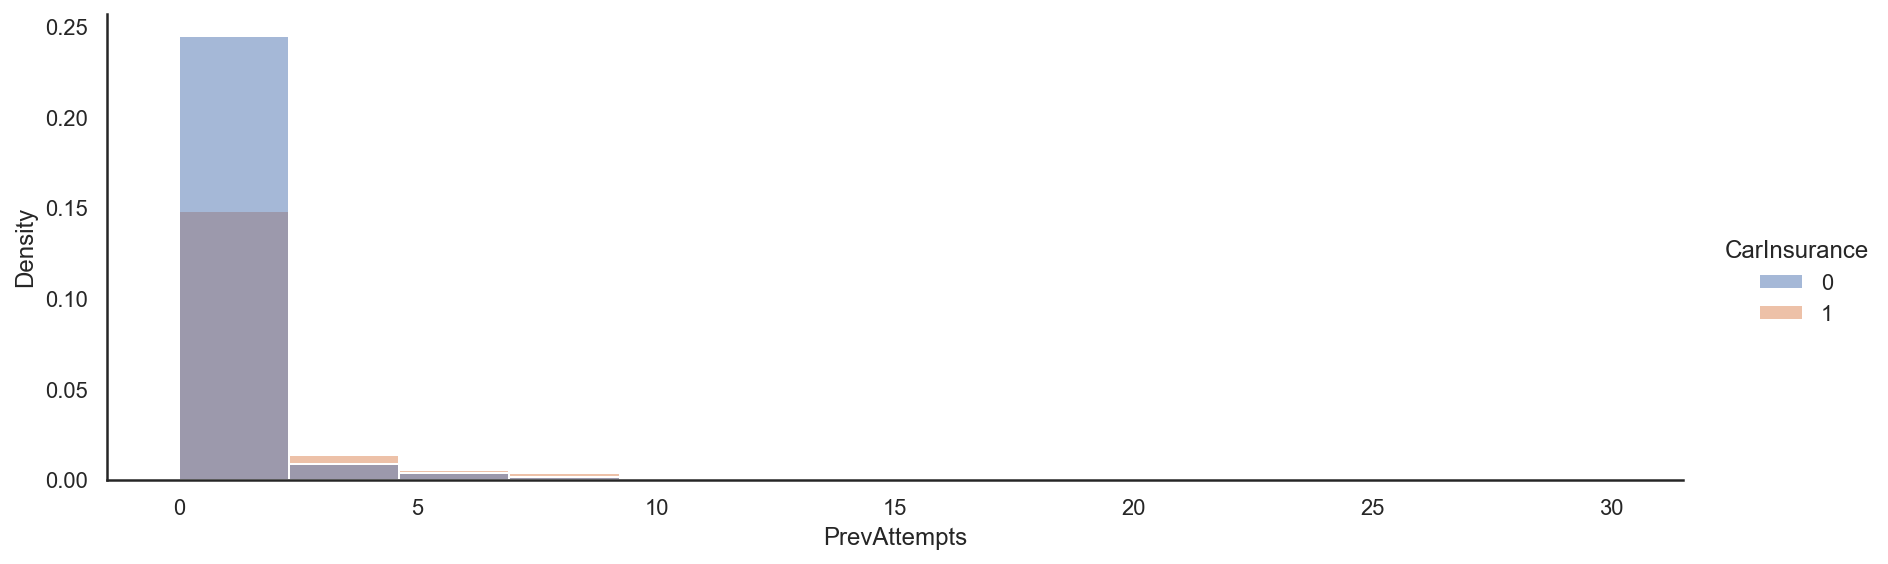

In [108]:
# PrevAttempts
with sns.axes_style('white'):
    plt.figure(figsize=(15,6))
    sns.displot(train, x="PrevAttempts", hue="CarInsurance", stat="density", height = 4, aspect = 3)

In [109]:
# PrevAttempts
train.PrevAttempts.describe()

count    3971.000000
mean        0.704608
std         1.874293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        30.000000
Name: PrevAttempts, dtype: float64

## Outcome Exploration

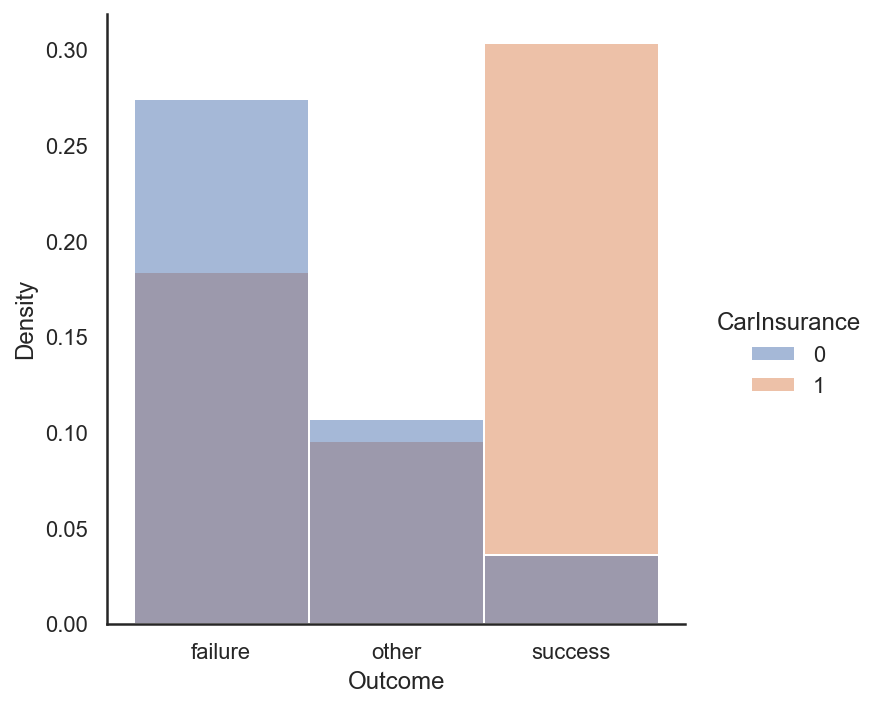

In [110]:
# Outcome
with sns.axes_style('white'):
    sns.displot(train, x="Outcome", hue="CarInsurance", stat="density")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


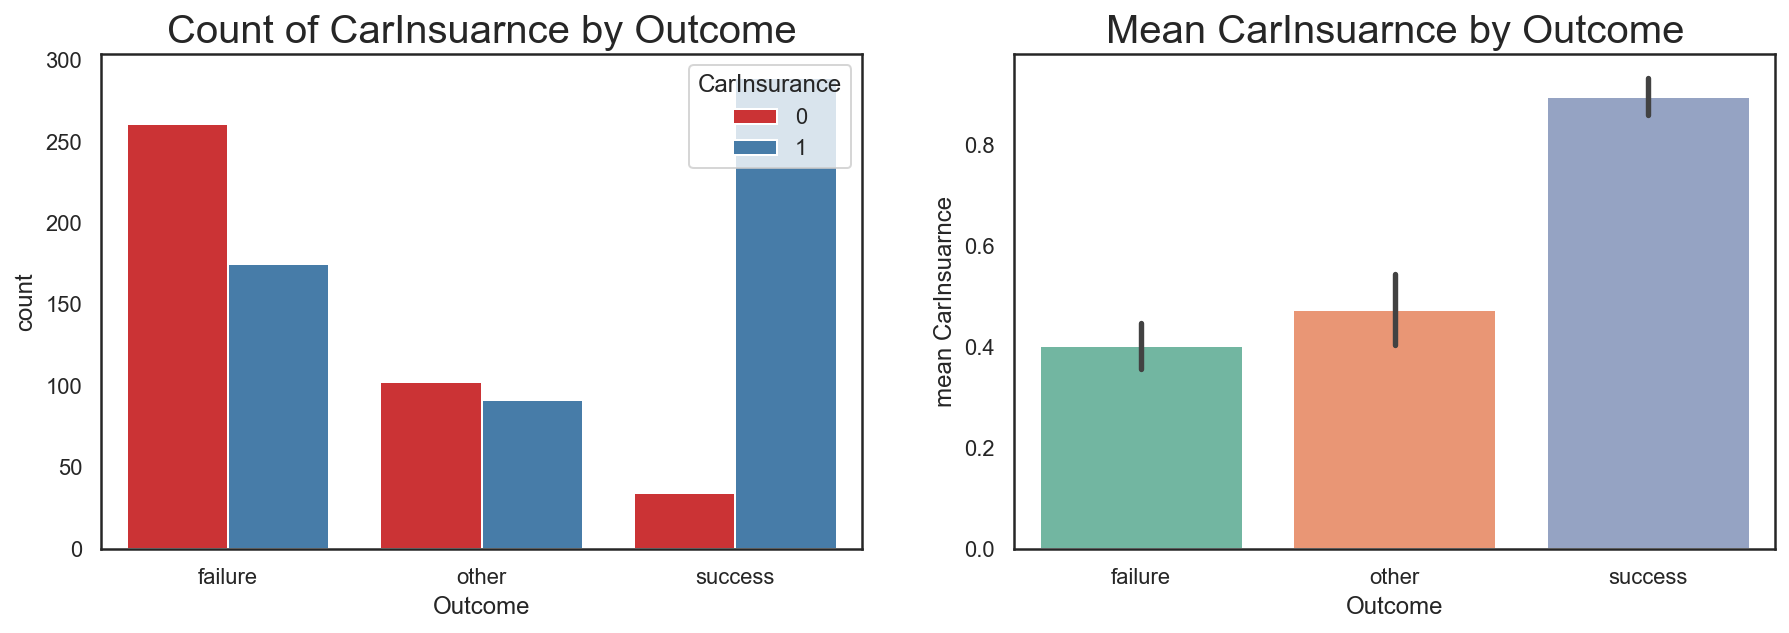

In [111]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = 'Outcome', hue = 'CarInsurance', data = train, palette='Set1')
    plt.legend(loc = 'upper right', title = "CarInsurance")
    plt.title("Count of CarInsuarnce by Outcome", fontsize = 20)
    
    plt.subplot(2,2,2)
    sns.barplot('Outcome','CarInsurance', data=train, palette='Set2')
    plt.title("Mean CarInsuarnce by Outcome", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

In [112]:
# Outcome은 중요한 변수임 데이터간 관계를 통해 분석 해 볼것
# 이전에 성공한 고객은 이번에도 보험 계약을 승낙할 가능성이 높음

In [113]:
###### 여기까지 이상치에 대해 조사했습니다. ########

## Dependent variable : CarInsurance

In [114]:
train['num'] = 1

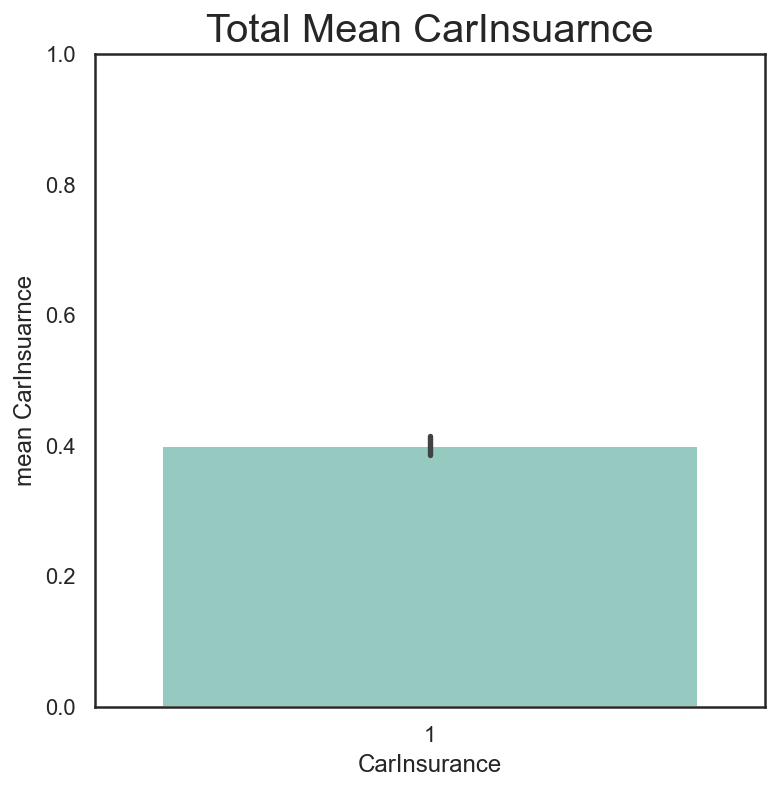

In [115]:
with sns.axes_style('white'):
    plt.figure(figsize=(6, 6))
    sns.barplot(x = 'num', y = 'CarInsurance', data = train, palette='Set3')
    plt.xlabel('CarInsurance')
    plt.ylim(0, 1)
    plt.title("Total Mean CarInsuarnce", fontsize = 20)
    plt.ylabel('mean CarInsuarnce')

In [116]:
# 6 : 4 정도의 비율이므로 굳이 샘플링 기법을 쓸 필요는 없다고 판단함

In [117]:
train.drop(['num'],axis=1, inplace=True)